<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<br>
<strong>Για το εργαστήριο του μαθήματος "<i>Στοχαστικές Διεργασίες & Βελτιστοποίηση στη Μηχανική Μάθηση</i>" έχουμε προσαρμόσει το κείμενο και τον κώδικα από το παραπάνω βιβλίο στις ανάγκες μας.</strong>

# Δέντρα Αποφάσεων (Decision Trees) και Random Forests

Τα Random Forests είναι ένα παράδειγμα ενός συνόλου τεχνικών μάθησης που βασίζεται σε δέντρα αποφάσεων. 

Τα δέντρα αποφάσεων αποτελούν έναν εξαιρετικά διαισθητικό τρόπο ταξινόμησης ή επισήμανσης αντικειμένων: απλώς υποβάλετε μια σειρά ερωτήσεων που έχουν σχεδιαστεί για να οδηγήσουν στην τελική ταξινόμηση. Για παράδειγμα, εάν θέλετε να δημιουργήσετε ένα δέντρο αποφάσεων για να ταξινομήσετε ένα ζώο που συναντάτε ενώ περπατάτε, μπορείτε να δημιουργήσετε αυτό που φαίνεται εδώ:

![alt text](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.08-decision-tree.png)

Ο δυαδικός διαχωρισμός είναι εξαιρετικά αποτελεσματικός: σε ένα καλά κατασκευασμένο δέντρο, κάθε ερώτηση θα μειώσει τον αριθμό των επιλογών κατά περίπου το ήμισυ, μειώνοντας πολύ γρήγορα τις επιλογές ακόμη και σε μεγάλο αριθμό τάξεων.

Το σημαντικό βέβαια σε αυτή τη προσέγγιση είναι να αποφασιστούν ποιες ερωτήσεις πρέπει να υποβληθούν σε κάθε βήμα. Στις εφαρμογές μηχανικής μάθησης των δένδρων αποφάσεων, οι ερωτήσεις γενικά έχουν τη μορφή διαχωρισμών άξονα στα δεδομένα: δηλαδή, κάθε κόμβος στο δέντρο χωρίζει τα δεδομένα σε δύο ομάδες χρησιμοποιώντας μια τιμή αποκοπής σε ένα από τα χαρακτηριστικά.

# Δημιουργία ενός Δέντρου Αποφάσεων


Έστω ότι έχουμε τα ακόλουθα δισδιάστατα δεδομένα, τα οποία είναι ταξινομημένα σε τέσσερις κλάσεις:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

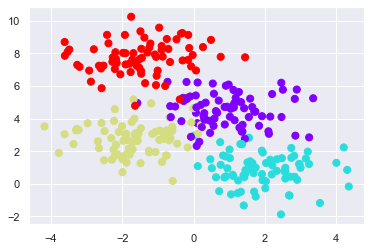

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

Ένα απλό δέντρο αποφάσεων που βασίζεται σε αυτά τα δεδομένα θα διαχωρίσει επαναληπτικά τα δεδομένα κατά μήκος του ενός ή του άλλου άξονα σύμφωνα με κάποιο ποσοτικό κριτήριο, και σε κάθε επίπεδο εκχωρεί την ετικέτα της νέας περιοχής σύμφωνα με την πλειοψηφία των σημείων μέσα σε αυτήν. Παρακάτω παρουσίαζεται μια απεικόνιση των πρώτων τεσσάρων επιπέδων ενός ταξινομητή δέντρων αποφάσεων για τα παραπάνω δεδομένα:

![alt text](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.08-decision-tree-levels.png)


Παρατηρούμε ότι μετά τον πρώτο διαχωρισμό, κάθε σημείο στον άνω κλάδο παραμένει αμετάβλητο, επομένως δεν χρειάζεται να υποδιαιρεθεί περαιτέρω αυτός ο κλάδος. Εκτός από τους κόμβους που περιέχουν ένα και μόνο χρώμα, σε κάθε επίπεδο κάθε περιοχή χωρίζεται ξανά σε ένα από τα δύο χαρακτηριστικά.


Αυτή η διαδικασία προσαρμογής ενός δέντρου αποφάσεων στα δεδομένα μας μπορεί να γίνει στο Scikit-Learn με τον εκτιμητή DecisionTreeClassifier:

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

Παρακάτω παρατίθεται μία συνάρτηση χρησιμότητας για να απεικονίσουμε την έξοδο του ταξινομητή:

In [7]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

C:\Users\User\AppData\Local\Temp\ipykernel_21132\748224724.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


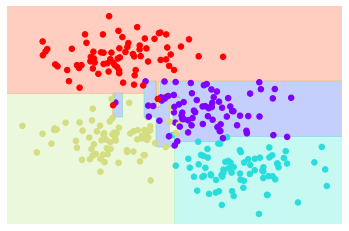

In [8]:
visualize_classifier(DecisionTreeClassifier(), X, y)

Παρακάτω παρατίθεται μία διαδραστική απεικόνιση της διαδικασίας δημιουργίας δέντρων αποφάσεων:

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAd8AAAFRCAYAAAA1uqfwAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzs3XdYVVe6+PHvPhXOofeOFUVFUBQsqIiCCsYWjcaYnsnk%0AZtq9d1qm3js9U+9vapKZTGJMNImJvVcUexcLCnaR3juctn9/kIBHQNqBg7g+z5PnCZt91noPwnn3%0A2nutd0myLMsIgiAIgtBrFPYOQBAEQRAeNyL5CoIgCEIvE8lXEARBEHqZSL6CIAiC0MtE8hUEQRCE%0AXiaSryAIgiD0MlVvdZRXc7C3uhIEQRAEu/PXT2vze2LkKwiCIAi9TCRfQRAEQehlIvkKgiAIQi8T%0AyVcQBEEQeplIvoIgCILQy0TyFQRBEIReJpKvIAiCIPQykXwFQRAEoZeJ5CsIgiAIvUwkX0EQBEHo%0AZb1WXlIQHlRbU0fa9g/RK+9itOjwDJ1B5PhYe4clCILQ40TyFexm//q/8sITWSiVEgCnLqzk6iUn%0Aho8aaefIBEEQepa47SzYRUlROWGB15oSL8D40SZysg7ZMSpBEITeIZKvYBdmixmlQm5xXJJaHhME%0AQehvRPIV7MLH15Mr2QOR5eZkezFTgXfoBDtGJQiC0Dsk+f5Pvx4k9vMVHlReWsGx3StxVmdjkvXo%0AfacxfkqCvcMSBEGwiYft5yuSryAIgiD0gIclX3HbWRAEQRB6mUi+giAIgtDLRPIVBEEQhF4mkq8g%0ACIIg9DKRfAVBEAShl4nkKwiCIAi9TCRfQRAEQehlIvkKgiAIQi8TuxoJwgMqK6o5fWgXFrORiJgE%0AfP197B2SIAj9jEi+gnCfOzducufsX1kyswqlEnYfPkRh7gtERI+3d2iCIPQj4razINwn6+xmlsyu%0ARqWSkCSJWVMMFN3cbu+wBEHoZ0TyFYT7OKrLWh5TltohEkEQ+jORfAXhPjUGHx7ca6Ta6GunaARB%0A6K9E8hUeKbIsc+7kGY7sP4jBYLR5+9HxS3lvvS+FxWaqayys2erK4DGLbd6PIAiPN7GloPDIqCir%0A5MDGP5ASl4OLE2w96E5w5MsMDQ+3aT8Wi4XTx05iqK8jZkocGo3apu0LgvB4EPv5Cv3Crs//ybNJ%0AJ5EkqenY6u0hzFz6EztGJQiC0LqHJV+x1Eh4ZDgqC60SL4BOlW+naGzPYrGQtnMD1KYjSWDWjGL6%0A3CUt3rMgCI8+kXyFR0aD2bWVY+52iMS2zGYze9a/T+71Q7y8TImPlxKAsoocdmyxMGPeMjtHKAiC%0ArYkJV4+50uIy9m/fQdaVzB5pv6SojLMnzlBdVdvttsLHz+fT7U6YTDKyLHPguAq3kNk2iNK+Urd8%0AwuKpxwgfbGhKvADurgrUxotW5xqNJs6fOkf27Xu9HaYgCDYkRr6PsWP7d+JYv5mnJhnIvCmx6cMR%0AzF3+TZRKZfsv7oC9m1YT4HiEcUPrOHnACYNuDpNmJHe5vaDQEFzcfsFnh3ZiMRkYPnYa4SGBNonV%0AnjSWa+h1bV0HW5r+7+qFdPKufEj8uBLu5ajYfCic5Ke/iUol/owF4VEj/mofU7U1daiqtzNruhGQ%0AGDEU/LwvkXpgP3EzErvd/tVLl4kKSmVkmASoSImvZ8+RrZQUTcTTu+u3il1cnUiY27+W/pjlxj9D%0ApRLKK8y4uTZe/FRWyzQoRgKNS6xyMj5leUoFoMLPB0YOvczGnZtImPukvUIXBKGLRPJ9TGVlZBI9%0Aoor7fwU83BQYq2/bpP2cm+lMm249UWjGRAOfHD7KjJQUm/TRX+i9J3Lt9h3mJurZsruG+nqZ6gY3%0ANB5xzJi/HIDCglIGBRQCzT9TR0cFStNdO0UtCEJ3iOT7mAodNJCM0474+zYXqqirsyBpbFPNycHJ%0Al7IKC+6uzbdTr1yH4EFDbNL+/cxmMycPH6K2Ihf/AaMZMXqUzfvoSTFTZ3DqsJIze04iKSyofEeT%0Akmh9e97N3ZlbJU5ATdMxWZZpsLj0crSCINiCmHD1mHL3dKWgIY5LmY3LvMsrLXywJZiJCbaZwBQ7%0AdRqf7gqhtrbxmWVJmYUjGaMICx9mk/a/ZDKZ2PTBb4gb8CHLp6fiZ/4zezassmkfvWF8XDzTn/we%0A8YveIC6x5XNxrVZDg8MUrt5o/Npslvl4mytjJs/r5UgFQbAFUWTjMXf1UgY5N8/j4ORD7NR4m07e%0AMRiMHNu/E9lQiNppABPjp6NQ2PZ679DunSSNWouLc/MksbSTStxH/hIfPy+b9vWg2tp6ThzYicVY%0ASdCQcQwbOaJDrzMaTRgNRnR6x073efHceYrvnsWMjvFTU3B1d+50G4Ig9A5R4Urot1I3r2TZ9CNW%0AxyqrzKRef5kJUyf3WL/lpRUc3fprlicXo9UquHBVIrMkmamzF7T5GlmW2bNhFS7SWRw0DeRVhBCd%0A8Ao+fj49FqetyLJMxoUMDA0NRI6LsvlFlCD0Rw9LvuIvSHikOboNoqDYbHXs2HlHho+K6NF+Tx3c%0AxAsLStBqG/+ERg+X0dSlUl/f0OZr0nZtJXlcGvNn1jJrqpkXnrjFmf3v9mictlBWUs6WD/6XUOUf%0AiXD/G7vX/JDs23fsHZYgPNJE8hUeaTFxcWw+EsXlrMbCG6nHVFQpk3Dz6NmJSGqprEXZx2DfKoqL%0Aytt8jaU2E0936z85f9e71NbU9UiMtnJy38e8siiHwaFKAv2UPD+/hIwTn9g7LEF4pInZzu24dvU6%0ApcXFjImJFrvb9EEKhYJ5K75J1pVM1qRdI3L8BEb49uyzXgCLKoj6+gs4ODQn02vZ3kyJbbtvs6xt%0AcayuQYu6j/9e6dV5LS40nFR5dopGEPoHMfJtQ0ODgU0r38S1+k0mB/+TYxu/z5X08/YOS2hDWPgw%0AZs6di3cvJF6AKbPm88G2YVzKlKmqtrB+lx73QYseWh0sJHwGR85omr4uKZOpYixqdd++Bq43tbyL%0A0GB2s0MkgtB/iAlXbdi76ROWxO1Fo2m+4l+zzYeEpb/sd7vMyLJM+qmzlORn4uY9iLETYvvde7RY%0ALNTXG9DpHGza7rUr1yjKzyMqNqZDbWdlZHD3yj6UUgMK3TCmzprb53/W169epSzr76TE1yFJEodO%0AqajVP0tU7CR7hyYIfZqY7dwFBzf+kadmXLU6dugUeI7+PZ5e/euqf+uafzAj6iwDgiVy8i1sPTqS%0A+c/9V59PCh11ZO9WTGUHcNVVUVztz4DIZQwZPtzeYT1SigqKSD+2GzATFhlPyMAQe4ckCH2e2M+3%0ACwwWV2RZtkpAhWUuDHJzsmNUtpeVcZUJwxoTL0Cgn4I5sRmknzxNVOx4O0fXfRkXLjLUbTMRsV9e%0AY+awesv7DBz6a5ttIPE48Pb1ZuaCZ+wdhiD0G+KZbxuiJs9nzVY3TKbGD+30K4CLbYtQ9AXZNzO/%0A2PygWUigRGnhLTtFZFt5N08RMcz65s7U6EIunb9sp4gEQRDEyLdN3r7exM79GWsPbAe5lqAhMcTF%0AhNs7LJsbOnIMpy5sZ/zo5q3rrlwH/wEj7RiV7VhkLRaLjELRfIFRXKbCzadjjw5qa+s5tnczCrkU%0ASRvMlMTZYsQsCEK3iZHvQzi76Jkxbwkz5j/PsJH9L/EChAwMIatoCsfPKZBlmTMXJU5ciyU8on8k%0A37FxyWzY01yC0WiUOZU5hNBB7T+zNBiM7Pn0VyyJ282yhDPMGb2Orav/X0+G2+saGgzk5xXTS1M/%0ABEH4gphwJQBw724OVy+cY+iICEIHhdo7HJvJyc7lxP6NFOdew9vHFb37UKalLEGr1bT72rRdO5gT%0A+TlO+uZr1MtZMqW679p8gwh7OLhjHdr6NPy9qrmR64Nv2BJGjhlr77AEod8QE66EdgWFBBIUEmjv%0AMGwq4/xZzPn/5rWFjSUf9x01oPSb16HEC2CoL7FKvABDB8D6U3fsmnzPHD1IZd5RlJIRo2o40+cu%0A7nSt5cvpFxjlu5MRQwEUxEQVs3bHRxhGRohiMoLQC8RtZ+GRU5hfyK51/yZ1w184uHMrFoul1fPy%0Ar+9k5mQDkiQhSRIzJxvIv76rw/0EDR7DpUzrY3uOOhA90Xp9q8FgJG3XDvZv+oDzJ0/36C3cs8cO%0AMdBxNcuSbrIkMZuUcbvYs+GDTrdTcPvsF4m3WUJMORfOiEIygtAbxMi3C8pKyjl1cBMaRQWyJoQp%0ASXN7dRa02Wxm74YP0HEJBWYqjGEkLHwFB4eW5Qv7m5LCUq6kvcmzsyuRJInyynTWr80mZdl/tDhX%0Aq6xocUyjaLv28oOGjxpJ6taZZOenMXxgDeeuuqPxeQIX1+blZg0NBnas/hUrUu6h1ym4lZ3G7nWT%0AmbX4pa69wXZU5B4nPKk5ubs6K9DJFzvdjizpMJlkVKrmiWjZ+Uq8fPr+DkuC0B+IkW8nVVfVcnz7%0Ar1kx8xBLZ1zkiegtbPv4L70aQ+rWtSyKO8LiWVUsmlXLilnnSN38fq/GYC9nj2xlyReJF8DNRcFg%0Ar/OUtLKhQbXBv8WxGmPLY22RZRmTsYHqGpljZ02UVTvg7h1gdc7x1J08N7cx8QIMDFYw0OMkhfnF%0AnXlbHSZJphbHFJg6PdqOiU/hk+3uTa+rq7NwKms4Awb3n+f9gtCXiZFvJ508sJ1nUkqbPvz1OgXR%0Ag69w5+bdDs2gtQWNOdPqWaRaLeGkuN4rfdubSqptUXnL37uBguISPL2tlw9FTX2a99b/lYTxjZsA%0A7D/lz/hZyzvc14m0gyREpBHgKwGOQDEfbVnF4GG/aorB0lCMo6P1NeyIwQaO3riOj5/t60wr9BEU%0AldzA27Oxf7NZpsI4pNPVyJxd9IxNfIOP9m5Gq6jArAom+en5No9XEITWieTbSVXl+ajV1h90oQFm%0AjuXk9VrytdByQoxFfjwmyei9RnIv7zRB/s3/BqcyfElYOrDFub7+viQ/9wsunb8EQPJzozqVpOrK%0AMggYa31+5NA8bt/MYeDgIAB0HkPILzqCn3dzAj6WrmdkwuhOva+OmpKUwp4t1agazqKUjFQaBxE/%0A/ytdasvTx5OkRS/aOEJBEDpCJN8Oqq6sYf+GP+MkZXDlmoLwoc3PV1NPuRI7b0yvxeLoGcu127cZ%0AOqDx64JiGYtjzy4Rqatr4ODWD9Arb2O0OODsO4XxU6b3aJ+tiYmbwt5Nd3DLPIGfRw1X7/oRMnq5%0A1Wxfs9nMibSDNFTn4u4zjMiYcV2qU220OLYoMVpU6kDgEFereLZ/cpmI4HOMGGrmwElHLC5PoHfS%0Ade+NtkGSJGbMWwYs65H2BUHoHWKdbwft/Oxtnk06jUIhsW1vDSAT4KshM9sPryGLiYju3TrIpw6n%0AUlN4EgkLCqcI4hJTenQjhK2r/8TzyRlNE3Qyrklkm14mKibW6jyLxcK+TWvQmhtHm7UMR+fij7G+%0AjNBh4xgybEibfZw5dozKgguYZD1j41Lw9HZv89zamjrKyqoICPS2et8Wi4WNK9/kqZk38HRXcOee%0AzL708aQs+2qn33NBXgE3jv2GhYk1AJRVWNh4JIbkpS3bunvrLtm3bhIRPc5qQpYgCI8vsauRDRze%0A8GOenFnQ9HVtrYUPNjiy4NW/dHqN5aOmtqaOzAPfZvZUo9Xxj/eMImHRt6yO7dv8CSnj9uDq3Pgz%0Aqa6xsHV3NcsWunDmItysTGbq7IUt+ti3eQ2Th+4nNEjCYpH5bKcLI6a9gY9f52bfHjt4gLgBH+Ll%0A0fxvcuYimHx/xIDBAzrVFkDuvVwun9yOWlGDwnEIcYlz+v2/tyAItiGKbNiAwewENCdfnU6Bu6fn%0AY/RB3LFrNLXxclPiBXDSK3BwaPw6OgLyUlOprZmNTu/YdE5tbT0uHCc0qHEEq1BIPDWnktX7tpK4%0AsHNLdmor7lklXoCoETKfHrnSIvmWl1Zw8sBmNMoK0IQyJSm5Rd3mgKAAAoJe6VQMgiAI7RHJt4N8%0ABydx+PS7xI1rHP2dvazAJTDBzlH1Dp3ekZzyIZjNV1AqGxPk1RsK3ANiWpwr0/LW9/33VoaFVpCT%0AXcDQ4QOajpWXVeLrUcP9K98kSUItVXU6Vq+AEdzKTmVgcHNbaSfVjB5n/VigprqWY9t+xXPzSlEo%0AJKqqz/HJxzeZt+JbDzbZ55UUlXF6/4fo1fcwWFzwCJlBVMxEe4clCMJDiOT7EDcys7h5YROOyhLq%0AzD44+axgzb4rgIWgoZOJHjnC3iH2moQFr/Phtg9wUt7CZHFE5xNH7LSWH/CyYxSFxbn4eDUm4eIS%0AE/fXH7l43ZNxc63XyvoHeLMvzZfxkUVNxyqrZdAO6nSco6PHsGNtLMVlZxgzwsyhU2qKzImM8LVe%0A9nPiiyVjX+525OykYOygS9y9lU3IwOBO92tPx3b8hZcWZH/x7LuM4+dWcSPTi8HDhrb7WkEQ7EMk%0A3zZUVdaQe+EfrJhd88WREj7clMf0pb9BrX78fmw6vSNznnqt3fOmzVlI6k4JqTYd2SJzKaOU5xcp%0AMJtldh/WovZOaVFbWZIkgiOWs2brKmIjCskt1JKVH0HyspROxylJEslLX+XurbusO3GVUWOjGeHj%0A2eI82VzVtGRMlmUuZxqoqjRTJee0SL6yLHM0dR/GqkwMZh1Rk1I6/Sy6p9y8dpuY8DtIUvPt8glj%0ATKzee9Duybe2tp6TafuRJInYaQmPRQU2QegoMeGqDfu3bWTxxK1Wa3qrayzsuvwMcTMej9vNJUWl%0AnDm0BbWiCpVuKHGJSV2aUX3p/EUKcu4SPXEKbh4ubZ5nNpvJzLiOl7dnjxSouF/66bMMUP8DL3cL%0AW/fUMHGcA0qlxIEzAYyd+Q38A5srYe1a9z6zxh7G16tx28X1u50ZOvkNfP19ezTGjrh1/S660p8x%0AOtz6OffqvROYufBlO0UFN7OyuHvubRbMqMBigQ373Bga+3VCBrVcj91TSovLOHVwPY6KUuplbybO%0AWIyzmIku9CIx4aoLGtd3Wh+TJNos4t/flBaXcX7vr1iRUoEkSZSWn2PT2tutLrNpz6ioCEZFRbR7%0AnlKpZERE+7sFWSwW9m/5FK35MrIsYXaIJD75yU5dGESOG0vq1kRy9mzmv191bnrtoNAiVm1fjf/S%0A7wCN5UR9HE7j69WY3CRJYlFSFR/t3UbSop6p39wZA4eEsGVVKBHD7za9hyNnVAwa1ftrsO93M30D%0AzyRX8eVz/OVzK1m9cz0hg77dK/0bDEaObv0tLy0qRpIkLJZM/rXuBvNe+NljNElS6MtE8m3DuMkz%0A2bL/AAuTapuObdznztTFbV/J9CdnD2/j6eSKpg90DzcFAz3OcSn9CkW5dxgRNRZf/96/9Xrvbi4H%0At6/l5XkXm2ZVF5Xksn+HgvjkRZ1qa/rcpaTVn0eSrOswO6nzmv6/rLQCP886oPm2riRJqBU19BVx%0AKd9k1Y6PcFLfw2BxxmtAIqOHdv55uS05KFvWtnZU9Uy969acOLifpbOLkKTG3xGFQmLh9ByOHzlG%0A7JTJvRaHILRFJN82uLo74zXiq3y8azMaRSn1Zh+Gxi56bPY6VVLTNBnpS0G+dZw8/yZPPaHm2LmN%0AXDoV/0W1pe4xm82cOHSIuspCBo+MaXU9rsFgZOenfyZyQCYB+kpcnZtvX3t7KpDq0oHOJV8AE+6A%0AdVJoMDdXsAoK8WPfUX+iRhY2HSsutaDWh3W6L1sxm81WS6LcPd2YvfTrdounNfVmL6C8lWO9o6G2%0AEr3O+vfXw01BdUZpr8UgCA8jku9DhIWPICz88ZnRfD+dZzg5+ScJ9LuvZvHpBpYvckKplJgy3syJ%0A8/vJvj2Z4AFdnx1cX9/AjtW/YUliNp7uCk6c38uh68lMmbXA6ryD29fx3JwraLUKcvNsd9swcHgy%0Auw69TVJcPZIkcfi0Co/QxKbvS5JEaNQKPtyyisgheeSX6MirHsusxUk2i+FB2bfvkZdzj4ixY3B0%0AbJ6klHX5EtmX16FX5VNncsclMInoyfE9Fkd3DBy9kLU7/sGCGdVYLDIb9rkyZHzL4io9JSJmGvuP%0A7mfG5OZdoHakOTI+3r634wXhSyL5Cq2KiZvCng238Ll2kkCfGo6c1jBxjKZpnS9ATKSFNQdPdyv5%0AHt2zhZcW3EOjaUyosVEyxQf2UVOdZFUfWSPfRattPEeWoaragrNT49fFpTIWh/afKbdm2KhR5Lr9%0AiDX79wIWhkRMI+qBkffQ8HCGDP81d2/nMXCYC5E9NGnHYrGw7eO/ERl6kckhZg5sc0Ef/BRRsZNo%0AaDCQc+k9lid/ufa5iEOnPiH79uBu/fx7yuBhYfgH/YYNaftAkpgwbwY6nUOv9e/r78O9W8v4dMd2%0AvF3LKKzwwn3AE6L0p9BniOQrtEqSJKLjnuBoqiP3ap0IinDHw/1dq3OybkLggO7dfpUshWg01rcH%0AwwdWkX0nl+Ejm+tAG8zNt5nnz9azeVcNZRVK9O6hWByiiE95sssxBAT5ExD07MPjlCRCBwY89Bxo%0AnKjX0GBAq9V0emb44T27WByfjpuLAlCyaFYNn+1ch3FsDKePHCNlagX3FyKJG2diTeohggd0fJvE%0A3qTTOxI/Z67d+o+eNA2LZQo11XWMcNb1aO1zQegskXyFVp1M24u2Zj0vzTaQXwSbDoZwMyOMp2Zm%0A4eulICffwsGLkcx/dmT3OlIHUlt7Bp2uOalcvOZK5Gzr0Vx4zFzW777KwsRqFAqJYUOdyCiaS1xS%0A39mD9kr6eXKvrsddV0hlvTtO/kmMi+v4bU5z3a0vEm+zqLBibl2/i5OrK2UV4HzfwM1kAoVSrJ19%0AGIVCgbOL3t5hCEILYs690ILBYMRQtIOkOCMKhUSAr8TLC+7i7hPKgWtL+eVbHmw+4IfO2ZPamrpu%0A9RWXmMKqbUO4c0/GYpHZe0QFbsnU1dRxKf0KBkNjOc+gkCCGTfkJa/bH8/H+WHLk1/tU4q2trac4%0AayXLk/OYE29m6exinBvWkpOd2+E2TLIbZrP1svubOc74BfgwemwkO44GY7E0f//z3S6MnzrbZu9B%0AEITeI4psCC3cuZWLY/GPiBhufWPk030RlJcW88qiXJRKCZNJ5t31Qcx/8aedWjtZVlLO6bStqKQq%0AtK7DmDAtnovn0inOyyYyZjJnDm0myOkkQ0LqOHnZA+fgxUTFTrL127SpA7t2M3/sp02bSEDjLeg1%0AqTOZOb9jM8KrKqpJ2/gLVswtQaORuHFH5viN6cyc/0zT94/u/RRHRQEGixvhMfMIDA7qkfcjCEL3%0AiSIbdvbl9c2j8szJL8CLM+fciBhe3XTMZJK5eaeGry7KQalsTDAqlcSihLucOHqMmLjW105WVVRz%0A4sAWlFSg1g0kPGo8Z3f/huVzy1AoJAqKT7Nz3U1mL3kFGMPpo0eZPuowwQEKQE1IUBXrdn1GQ9S4%0AFmUp+xJnF3dKyiHQr/mYwSCj0ujaftGDbbg6MX3x/7L+wA5kUwWeAaOZOT/a6vuznrRf1SpBEGxH%0AJN8eVF/fwP4N7+KiysSCglpGkbjoxRbb1vU1Wq0GyS2Jw6c3MTnaRFmFzGd7AvENGIi76w2rc708%0AFFReKmy1ndqaOtI2/oLn55egVEqUlp/iL+/s4KffqG5aQ+zrpSDY5QylJUvw8HSlqugKwRHNo0eT%0ASSYmoozL6ZcYEzO25950N42dMI7NK4N4ZVFO03tbu9OduEWdW5Kk0zsyPaXz65UFQXi0iOTbg1I3%0Av8+KWeea6kPX1h5j/WZHEhc+02N9fll6UW26ggUVDu4xTEyY3XghsOk9XFTXMVtUmB3GMn3uU22O%0AxicmzCEnO5I1qUfQuXrzxPNTKC4s4cDxg0yf2Lx2cu9RDVGxU1tt4/j+bayYW9K0PMnDTUGgVwEK%0AhfVyj5CAOnILivDwdEVWuGI0yiiVsG5bNRq1hMUikVu1jUFDh+Dq3nZtaHuSJImERd/loz1rcVQW%0AUmd2I2rGwl5dXiMIwqNDJN8e5KS8YbUxg06nwFR9noyLYwkfNbxHbkPv2fABiyYfxknfOHq8nZ3N%0AsVQl5QVZrEhqvhAoLN7Dwd06ps56os22AoMDCAxe0vS1r78Pd7IWsW73TkL9yrmd546DbzJerewa%0ABCBZKlssI/J2l8kvMuPn3Tz6P53hzdTFjQX3Y6cn8+G603g43mH2dH3TWl5ZvsPKbe+S/PR/d+Gn%0A0jucXZ2Ytbj36j0X5BVwPu1j9Op8GsyuBITNITwyqtf6FwSh60Ty7UEWuWUpSqUpmxDp9+z4MJBx%0ASd+w+dZ0OvlSU+IFGBAMx6+cxllZYHUh4OMlYTl3EWg7+bYmZloiRuN0igpLmRjrgUrV9q+Qm+8o%0AbmcfZUBwc79GyZdtJ0cy0P0cwf51nLnijU/Y00234vVOOqYt+im7Vn8PZ6eGptdJkoSr+hYlReW4%0AeTj3+Vv3PU2WZU7v/gsvLfryln8Juw//izyvn+B//4NnQRD6JJF8e5CsiyavcAf+Po3J5/otA8EB%0ASgaHKhkcms+q7R8xa6mNR3Jyy12XJMmCpZVVZbLctQSmVqsICGz/omHMhBj2bLhK1p3jDAmu5cwV%0AT1wGPMnUmEmUllSQV1DE1MUDWyRSJ2cdbl6hQJbV8cryUsoufZfLJe7o/OZ0ag1tf3PhbDozY/O4%0Af8OHxMkNrN63F/+FK+wXmCAIHSKSbw+KT36SI3t1GNPTKc65wujhZuInNc9+1avzbd5ntTwMg+F0%0A0+3egiITt6/fxGhSUTnZgssXOwFduw1OvjGdajv3XiEWs5mgUP/2T/5C4sLnqChfSHZOPhMXDESt%0AbvyV8/B0xcPTtc3XeYVO5VzGDcaMMAOQX2jCw83C5HEAZew9spbC/Ige3/e3z2pjgeAjMqFeEB57%0AYp1vL9n/+Zs8Pct6pvDHu0JJWPxjm/ZjMBjZt/F99IprlBUVEOBrJGWmHlmGv71fh7t3CGoHJ3Re%0AE4idNqNDbVZX1rB/w5+JHHQTldLC2esDmDTn63h6e9g09gddPHOaotuHKC64y7DgAhKnNZcIlGWZ%0Ajw/OYcYTXS8r+SiTZZkdH/6YFxc2zzTfc0SD16gfExDU8YsjQRB6zsPW+Yrk20uupJ/HnP8vEiY2%0AIEkSaSfJoo65AAAgAElEQVTVGNxeICK6c6PPjsrMyMLP+FvCBlnfbl69bzIzF7zQqbZ2rH2b52ad%0AblpCI8syq7aPYvay/7RVuA914tAhJgavxNuz+b2UVVhIzXqGyQkJvRJDX5Sfm0f6oS8nXLnhP3Q2%0AI6Kal2NVVdZQX9eAt2/PXiQJgtA6UWSjDwiPjOKe2w9Ys38/smwhLDKBYYNCHvqa6soa0ra9i4v6%0AFmZZg8VxHPEpSzo0S1qSFFalCLvDWX3Pam9fSZJw1tyzSdsdMX7yZNav3MNXnsxFoZCoqjbzh3+q%0AGDG+jIqyKlzdnbvdh8ViYd+mj9CYLqDATJVpCAkLX8HBoe/WTvYL8MevlTkDZrOZnZ+9Q6DLJZwc%0ADZzZG8zoaV8hIKj9jSEEQegdIvn2oqDQIIJCn+vw+Wnb3uH55IwvEl8N+UW7ObLXmbjEOe2+dujw%0AwWxdFcywwTlNyTr1uIawyM6PFA3mloXpDebe25pNoVAwc/H3Wb13HZUlN3CUsvmfb1lQKHawZf9B%0AvIa/StjIUd3q48C2dcyNOdi0sYHReI6PNr1H8tL/sMVb6FUHtq1n6fQz6HUKQGIy9/hgy0oClv/Q%0A3qEJgvAFsbFCH2UymfBwuGE14vTzljBVXezQ6yVJYlLyt1i1YzSf7/Zkzc6ByF4vEzLw4aPt1ngP%0AnMmxc83Lps5lKHAJ7N5MY1mW2b9lLQc//xFpn/+AXes+wGw2t3m+k4uepEXP4ebmwktLlWg0EiqV%0AxMKkOrIzNncrFgCV8YrVjkJqtYSL6nq327UHlenmF4m3mac+m4YGg50iEgThQWLk20cpFArM5pZL%0AgSydWB7k6e3B7KXf7HYsEdHjuZHpxpp9B0E2Ezg0juhR3dtK8MD2DSSO3o2XR+PFRU1tGus3QdKi%0A5x/6OgdVactjypbHOssst/xTMFsezbXERtmxxbF6o2PTTHNBEOxP/DX2UQqFgip5NDW1x5pGMZcy%0AFXgEtb6BQU8bPGwog4cNtVl7ivoLTYkXQK9T4GC53O7r6kxegHUt6Tqzd7fj0XnFcu32LYYOaPy6%0ApEzGqHk0q0WFjkgk9XgW0yc0Fim5lydjcpjQqZ2nBEHoWSL59mGJi15k41YnNOYszLIWt8A4xkyY%0AYO+wWijIyyf96GYclBU0yAFMmbO43YlKstzapLH2k4PPoOn87f1TvPCUI0oFfLalhnrH7ld0ip02%0Ag5NpEmevnQRMSLpRzJjXd/YL7oyh4eHcUv0Xa/bsRaIBvddops+Nt3dYgiDcRyTfPkypVHZ4L1h7%0AqSyv4tKB3/Ps3EoAjMZM3v/kLvNf+MFDX6dwHkN+UTZ+3o1JuKLKgkHV/qSpgtsnefUZHWnH6zCb%0AZZ6ap2fLwctYLJZuj+xipiYA/WPp0sChgxk4dLC9wxAEoQ0i+QrdciptB0/NrgAak6haLREXcYOs%0AK1mEhYe1+bopSU9waLcF+dw5JCwY1SNJmPdUu/05KCrQaCRmTm2uFObhVE5tTT1Ozh3fO/d+sixz%0AeM8uTLXXMZj1jI2bi7dv929lC4IgtEUkX6FbZEsdKpX1LWRfLwvXsx8+CUqSJKbOWgAs6FR/9bIf%0AJlOmVZ8FFb6MdGo5yaijdn72L56YcAJPdwWyLPPZzouMjP8hXj6PaelKQRB6nJiBIXRLyLAJnLts%0AnXz3HHdjTEx0j/Q3Zc5TvLdxANduyVRUmvl0uzOB4Yu7vD1jWWklIa7n8HRv/FOQJIklsys5e3ib%0ALcMWBEGwIka+QreEhQ/j6L4FXNu5Hy+XSvLKfAga+RQaTcvtFG3B0VHL/Bd/zJWLGVy6VsLEBbFo%0AtZout1daXIafVx3QHK8kSagVNTaIVhAEoXUi+QrdNmlGMmbzLGqq6xjhou/yKLQzwiNG2KSdgUOC%0A2f+pHyPCSpqO5RXKOLgNt0n7giAIrRHJV7AJpVKJi2vvlZy0FYVCQcjoFazeuppRg/LJK9ZR1DCe%0AxIWP717BgiD0PLGrkSDQOOM5+04+Hp6uXZ41LQiCcD+xq5EgtEOSJEIGiH1wBUHoHSL5PiLMZjMn%0ADh2ivqaK6EnxNtlGT7ANg8GIyWhCp+/6cidBEB4vIvk+AspKyjm06XcsTirAWS+xI2032oAVRI6P%0AtXdojzVZlvnLj9dyZvNtjNVmgqPd+M//W0JAsG0LdJw7dpW1/3eQkrvVeA924dk3EhkeMaDDr6+p%0ArqW8vJqAQO9emQwnCEL7xDPfR8Dude+yIvG41QfnJzt8iV/yC/Fhep/C/GLu3blD+OhRODo+vLa0%0ALax5axdbv5+BSm5epuQ3W8HvPnvdZn2Ul1XxrWl/R77VPJlNM6qOvx/4VrtLrGRZ5s8/+pTTn9+m%0AodSC7xgdr/32CUaNFWUnHwU11bW8/fON3LtYhrO3Awtem8zYSWIW/qPkYc98ey35Bod2v/j942p+%0Akpm//MLd6tjqddX84LdmkXxpTDIjhhj5xks6xkdp+GRjLSs/M1FS3rM3dtRFLgyuj7Q6li/dJdfn%0AWof/XWoqawHQu7Q+yUuqVhFZNcWqPbNsIt01Dam9eWG1CkZUxKKVmm+HX1ddpNKzkNqquof22xaL%0ASUZbo0dr1lGvrMbgVItCKWr19ASHUheGN0Q3/dvnS9nkeGahUIm/+UdFcW5Jm98Tt50fATdvW5Bl%0A2eoDOOOaiS/rKT/unHUm3vmdK6FBjSPQb77iAlTyh3dkJEXP/YyMkrHlMYzIRjV0MPka6ho3uNc5%0AurZ+gkVCRka6799aRkY2q8D48D4c6/VWiRfAyxhAWUNJ+/22QpZl3Mo9GWwZ2fR1liGdatfKbl8E%0AWswWMAIqUKhEMjebzPg3DLD6ufrJwRRV5WJ0MtgxMsFWxG3nR0BJUSnHtv2Op2YVoddJ7D6sRfJ6%0AhqjYSfYOrU9I3fRvliUctzpWWGzidMHXiJ4wrt3X37uTw9XzaSjVOmKnJXV44tRnuw7x3pKdeMuN%0As6RNkpGRS4ex4tUXOxz7wmUzANjwyb5Wv19TU82vXvsZyhyHpmPSEBM//cfPUakeXkVs5d//xY11%0Ad62OGb1q+cnKn7PipXkP7bc12zdt5vD/O4ZSar5mN0oG5v1vCpOmTO1wOy3a3bCZtDUHURRrMDsb%0AGJ4Uxgtfe/Wxvqtz40YWb/3H2zia9FbHBy0K5sWvv2qnqITOmhDf9mMCMfJ9BHh6ezDrmV+y+2Aq%0ADfXVRMVMw9PHw95h9Rmy0o2GBgtabfOIKeu2lqDhoe2+9vThVJwbPmX5dBMGg8xnGw8zOuE7+Pr7%0Atvmaxpnnh6mvyuGOaxZFtbnET5jJ4DFDmDPvCZu8py/p9U688OOX2fHxVirzK3ELdGP+c4vaTbwA%0ASQvm8Pfjf0GR0/j82yQZCY8fjl6nb+eVraurrkWB0uqY0qKiory8022dOHKEC8fSMWHk5pFbOFQ4%0AgwTKahVXN1/n9PgTjI/te3tX95ZBg4biFu5Mw0VL0zGjvp6Y+Mf3Z9LfiOT7iFCrVcTNTLR3GH3S%0AhIQUPvz0LM8+kY9WqyC3QOZ60VjmTH/4rGNZlqnO3U3KHDMgodVKrJhXzkd7NpG4qPXRRUlhCce2%0A/5GFMwpIHgXSNxX8fWUl3/jf/+6Bd9YobNhwwv638xNtAgKD+Nqb32T3xh3UV9UzKGIQicnJXY4j%0ALjGeUxtOoS5tfk4sBxiYNnNGp9rZ/Nl6jv77OGqDlhI5H3e8rZ6gaEwOXLuQ+VgnX0mSeOn7X2Ht%0AO2sovFGE3l1HwhNJjBw12t6hCTYikq/wyNPpHJix9CdsOLAdjGXoPYcxe8nkdl/X0GDAVVfW4rhW%0Aans7xNNpn/HSokIkqXGU/e3XXLh7r2UbfUVAYBAvfO0rNmnL18ePuV+fR+pn+6jMq8QtyI3ZzyxB%0A59jxkbQsy5zedQq1oXE0rsOZaipxoXlCoUk24h3kY5OYH2UBAUH858++Z+8whB4iku9joLamjvy8%0AEoJD/VCr++c/uU7nwPTkRZ16jVarobTGB8hrOmaxyNTLbd9y1quKWjyLHD5U2cbZ/U9c/DQmT5uK%0AyWREpVJ3+rmsxWKhvqIeLY1LpxwlPRVyKRoccMARk2zEJcaR6UniLo/Qv/XPT2KhyYHtn6M3pTEo%0AsIJjG71wDl7ImAlx9g6rT5AkiYDhi/hs5wc8EV9JSTlsPRTEzMVPtfmaOpMHYD2J6fotM9GPUb0T%0ASZJQq7u2jaNSqcRniDcVJXVNx7zxx326ngDfILyDfEiYlYRKKT6ahP5N/Ib3Y1cvXWaEz24ihsmA%0AhhFhlWza+yk11WPRO4nNAwDCI6MYEBbO5kOHcHFzZ/6LYx86mhs1cREfbrrFklllaDQSqz6rZute%0AmaXLejHoR9yy11ewqv49Si6Xo3BQEDIhiP/43jc6NInscfbgcsOuunv3Nvfu3GXs+PE4OIiSqPYi%0Akm8/lnPjLNMSrFeSJU6qZfvx40yZmWCnqPoeR0ct05Jmduhc/0B/3J78FZsO7iW7PJ83f70TySL+%0AjDojKDiEH/zpf8gvyMXBwRF3t7Zn7h87fJj0w+dQqBRMSoxjVGRkm+f2VyWlxXz4l/fIzyxAq9cS%0AOT2SRc8s7XQ7FouFt//wV26n3UVRo2Jr4BZSXnmCyfFdXyYmdJ341OjHlBo36uosODo2L8G5dU/C%0ALzDYjlE9+hwdtcTPTuFCaQ7Sj3eDpf3XCNYkScLfL/Ch5+zYtIWDbx1qmpy1+shqFn2vjvETH69Z%0A0O//8Z+UH61FLemwACfvnsXdx4PpiZ17Lr5nxw6yd+ahRdc4uzwXdn6wnZjJE7r8GEHoOlFKph+b%0AMD2JNdt9MJsbR7+1tRaOXB7O0PChdo5MENp3ZvfppsQLoKrQcnh7mh0j6n3V1VUUXLKe5Kc2acg4%0AcbnTbd3LzEaF9a392tsN3Lp9o9txCp0nRr79mIODlmkLf8QnqZtRSaXI6mBSlqfYOyxB6JC6qnoU%0AWI/IGqoamv4/6+pVUjfvpb6qnuARwcx/ajFKZf+aea5Sq1FqFVD1wHFN5z+6nb2cscgWFFLzmEvt%0ApcDf/+F3IISeIZJvP+fs6sTMBcvtHYYgdJp/mC/52aVNoz6LbCEgPACAWzdvsPJ/3kNZ1DgyLjhc%0AQnFeMa/+99fsFm9PcNA6MGjCIG5vuddU1tPk2sDkWVM63Vbyk/PJOHEZQ4YZpaTEoK5jzJwonJ1c%0AbB220AEi+QqC0GlGo4HDBw+gVKqYNHVqjywNWvG1F3i37m0KLhYhqSRCxgWz7MVnAUjdsrcp8QIo%0AJRU3jt6k+tUqnJycbR6LPb38rddY5/0J2Zey0eg1TEmZ1qWJZ056J97440/YtWUblSWVjIgeRfT4%0AmB6IWOgIkXwFQeiUWzdv8P5v/oXxugTI7Bu2h6/8+HWCgmw7kc/N3YPv/OqHVFSUoVSqrJKqoa7l%0AjlKmWjN19XV9NvlmXr3Cjo+3UlVQhXuQGwueX0xQcEi7r1MqlTz17DM2icHBwZH5SxbbpC2he8SE%0AK0EQOmXTB+uRb6hRSSpUkhpLlopNq9b1WH+uru4tEmr4uHCMKuut9bzC3fH26ptlKauqKvngl+9R%0AcqgSQ5ZMwf4y/vnLtzCZWl5ECI+HXhv5Rg0XV1tC/1NeWIpG69D+ib2orq6WD996n7wreWj0GsYl%0AjicxZY7N2i+7VwYP7G5Umt12PeyeMG3mDApzC0jfl05DlQHvMC+Wf/25Xo2hM/Zu34mUo7HaQMKY%0AJXP44EHiZ3RsjbnQv/Ra8pUQ68iE/sVoMtutb5PJyL6duykrLGV0TBQjRkU0fe+ff/gHRfvLkSQJ%0AE0b2Zabi5OLExCmdn6TTGhcfF8pv1Vgdc/Xt/Uk7S55bzqJnlmI0GXHoYxdAD5ItMhIPVqeSsJjF%0AIvHHVa8l349P7u+trgShV1y8m8+vFz2D0WDq1X7rG+r5wxu/oua8CZWk4uxn6Yx7eixPPbecurpa%0Acs/nopGadxpSN2g5l3bWZsk3adkc1tz+EGW+AzIycqCBWcvsM6NeqVQ+EsuLZqTM4tSWU6jym8s5%0AqobITJkeb7+gBLsSE64EoY/JvJrBqYMn0Og0zJqfgquLG7Isc+nybszGCxzck0vdeR2qL5aeaBsc%0AObv1LHMWzUWtUkMr9X8lRfdrAn8pIjKSN94OYe/2XSgUCmYmz8bZuedHvscPH+HcoTNISIxLiGFc%0A7KOzm4Wrixsr3niO3Z/upDy/HI9gD+Y9t1BUlnqMieQrCH3Iri3bSP1nKuoaR2RZ5sK+C7z2y6+T%0Am7uJhUm7CPSTyD4vUSxZb6puLpLJzr7DiPAIgscGkbenuKmYgsmxgej48TaN09XVnSef7r3dJPZu%0A28m+v+9HVd+4vOjOkXXU/lcNU2d0rUa5yWRk/+49VJSUMylhCoG9UHJ15OjRjBw9uv0Te0hdXS0a%0AjbZH7hRs+HgtF9MuYmowERwRxLOvv9znHwXYm0i+Qp9hNpu5fD4dnV7PkOHD7B1Or1EpjZw6tRpv%0AnyiObT6Cuqbx1qQkSXBXw7oPPkE2HWHf+8446M24BJRhko2opOZSgdogFYMGNZYN/cp3XmeN80py%0AruSi1WuJmRVPzMSJdnlvtnJqz8mmxAugqtVyYtfxLiXfysoK/u9Hv6P+khklKk6vO8PMr8y06aS0%0AviQr8yrr//kZJTdLcHR3ZHxyDE8sXmiz9ndt2cbJ986gMmsAFbdv5fK+8R3+43vfslkf/ZFIvkKf%0AcOvGTVbt+5yKwXrIN+J3cBtfW/4qemcne4fWo0aENfCL7+uYEP0p6ZfX4uQLFTesR0cZZy7jXTYK%0ASZKoBQovVuEcfZGyi0PQGJww+9ST9MysppGGVqPlxW981Q7vpuc01DTw4MrIxmOdt/mT9RgvSU0X%0AL5pKHWmfH2T6rJn9bltDi8XCmv9bhTlLiQPOyBVw+N9HCR4UQtTYaJv0kXHi8heJt5FCUnD3fLbN%0AtkDsr0TyFfqEdYe2Uxvr21T2vThA5vNt63l+Wd9dPtJdt+9e4tc/0DN+TOOILnKkzA9+auQ7C8tQ%0A1bkDYJJNaOodrD7EVEZn/Ly0jP76cNTKYCZNmdorz1w7oriokK1rN1FdUo3PQB8WLF2CRtP955r+%0Aw/zIvl5gVWoycHhQl9qqKKhokRTqChooryjDy7NvrhPuqqzMK9Rca8CB5v27NQ0OnDtyxmbJV6Fo%0AWS5CUoqk2x5RZEPoE4rM1pXjJYVEwQPH+pvCgrNNifdLY0ar0Q4vwCA3UC1XUKC90+pfaXaeNylz%0AX2NW8tw+k3hramv48w//xPXP71BwoJT09zL46y//aJO2V7z+Il7TXWhwrcHgXoP/TE+efvX5LrXl%0AGeyJRbZe4uMUpMPdzdMWofYpzq6u4GC9p7csy2gcbDfRa+z0aEwOzQVPzLKJoTFDxKi3HWLkK/QJ%0Azgrtgxu34KLQtnpuf+HtFcn5S6uJGtX8Pq9eh4YaD2qpQo2GQMNgcoy3cJY9UEqNE2WMjvWkLHmu%0Az3247d68Dct1JYov4lJICgpPlpCVdZWwsOHdaluvc+I/f/o9amprkCTQOeqtvl9SXMS+HbsBmDEn%0ACU8v7zbbWrBsMbcyfkf52RpUZjVmn3pmLZ/3SCxZ6qzAgCCCYv0pTC1D8cXvjxxoIGmh7Z5vT5k+%0AHZPRxJl9pzE2GBkYGcaS58RmLu0RyVfoE6YMGcvWG2dRDPZElmWU6YUkTl6ILMtknExHtlgYOWFM%0An0s43TFwYCQ/+FkNv/8pjArXknlD5pPNIzBlmXCTmm8T+ltCMYZV4+zgidpRTUzidCbETbZpLLIs%0As33jJjJPZiIpJMbEjyU+sXOVl2ora622qwOQGpQUFRR0O/l+Sa/Ttzh2KT2d1W82rjsGOLf9HM+8%0A8Wybmw84ODjyxm9/yukTxyksKGBKwnRcnF1tEl9f9PoPvsX60LXkXc9D76YnafEcvL18bdrH9KRE%0Apicl2rTN/k4kX6FPmDYlnqCsAI5fOINKoWBm8ovIRgu/f/In1JyuA2Db2HW8+Lev4xPk3+n2b924%0Ayfbje6mw1OGpcmLBtGR8Azrfjq1duKJl3vN1fOeby3F3H0V0dCCp+t/BfQWkJCSiYsay/OWu3Wbt%0AiHWrP+XMynOoLI23I3ee2Y3FbCFhdlKH2xgbN54Lmy6hqbuvkEQojI/t+kxrWZbZum4jV45nABA+%0AIZy5Ty60ugjb89kuVAWOTaUbVQWO7F6786E7/0iSxPgJj/YM8I5SqzUsfX6FvcMQHiCe+Qp9xuCw%0AMJ5Z/DRLFy3F09ubjW9+jPG4jNbsiNbsiPmUxMbffNzpdmurq3k3dS13R2mpGO3GzREq3tr0AWZT%0A71amakuDQc24cc8zeHA0vr5+DJgcjFm+L7ZQI7MWpPRoDBmHLjUlXgC1QcvZ1DOdaiN8xEimvhwH%0AIUbqHKtRh8Oiry3u1oSrzWvXc+Tt41SdrafqbD1H3j7Bpk8/tzqnsrCyxeuqivr3fAHh0SdGvkKf%0AVZJV3OI2c0lWcafb2XdgH4YxPlZXmtWj3Tl25DBx0+K7F2QP+Op3v8HWgRvIycxB565jzuK5eHp6%0A2aRto9HA1vUb0VToMCjqqa5u3P/WZDTz4MeBqQtlM1MWLWDWvBSqqqtwc3Xv9mOCy0cuob7/osCi%0A4fLRyyxYtqTpmGeIBwXXy6xe5xHi0a1+BaGnieQr9Dl1NTVcPbYVrU8BVbInSqn511Tv2/l1vyaL%0AGenB5RAqJYbavrmdm0qpYsHSJe2f2AV//eWfKE6rJEyKQpZl/vjGm/zgT/9DcEQQt2/lNj2zNWNi%0A0JjwLvWhUqlxd7NN8rOY5ZbHTNYzlRe8sIR3c9+i/mrjRhcOw5UsfKFnfn6CYCsi+Qp9Su71S5iz%0A3uT1xHJemyLz17fusOuvw1DUuWD0rWfqS/M63Wb85HhObPsXcqRf0zHHC8XEPWfbNcT19XWsfucD%0AcjNzcdA7EDt7glUFpqtXLnM9M4vYyZPw9rbthJeOyLh8kYLjJWikxolJkiTRcNnM3h07ee5rr7DS%0A/E/unL+LQqVgWOxQFq/onfKRNTXVaDSaVuscDxo7kEsZV5suwMyyicHR1pO3goKC+clff8HJ40cB%0AiJkwqV/OXBb6F5F8hT6l4upHvPZEBY2zZyS++19aykzlVBqjiVs2A/+Bna/B6+7pwdORs9idfohy%0ASx2eCj1PTFuIRmvbovbv/P7vTVv5Gahj+9Ud6F2cGBM9jn/87v+RfSAPdYOWQ6sOE7c8zqYl/lpj%0AsVgoLinE1dUdrUZLTvY9VAbrPWWVkorKkgq0Gi1f/c43ejQegBvXr5G6ZS+GGgNuQW7cvXSHkmtl%0AaJzVRCREsPTFFU23qmtqqtE6aGGkAXO1CbVKzdDxQ1j6QsvJQ0qlkomTu7ZrU8blixzfdxQJiYmJ%0AkxkePrJb71EQOkIkX6FPcdUUtDg2arQjgUkvdKvdyMgoIiOjutXGw1RXV5FzLhft/Vv51Thwev9J%0AqiuruLenAI3sABJoynUcXXuEqUnTeyye0ydOsPW9zVTdqcHBS8P4lPEkzk9m/wf7UBQ0z0Y2ONYx%0AdvK4HovjfjeuZfHvn7yLsvCLzRHkHMopxkcKhCpI//gSPoF7SJiVRPbdO7zz038g31GhwJFyZTHO%0AQ3RMTphi01Ht4QMH2fp/W1FXNd4NyNq/kgXfXUjs5Ek260MQWiOSr9CnVBj8AOtJVeUGXwLtE06H%0AycjQxr7od7Juo5atR9lykZLL6Rds1n/GrctsuZVGmaoO9zoNJatuoM1zQocz5MKxVScYMjKMlK8+%0AwZ6PdlFxo5JKZTkLXlhI2LCuPdvtrP1b9jYlXgCNpEUhK7DIZhSSEpVZQ9a5TMbEjmP1P1fCHXVT%0AwQ53izcFmfdY+eZ7/PTtn7e7Fd+OTVs4t/8sxjojQaOCWPHai2g1LYu2HNlyqCnxAqgqHTi8JU0k%0AX6HHieQrdMidmzc5cvYECoWChEnx+Pj1zDNLl+HPsGrrb1maWIrFAp/s9sIzsu/Xd3Z2csE/yo+S%0Ag5VNt01Njg2MmRpNWUkpV+RrVrsQyW4mwsKHU1lVQX19PQuXzehy3xaLBd3CCLwXjgP0FB6/jXeu%0A2ur2sqbBkf/5wfexOBuRZZlCqQAHjQPzlnzU5X47q6G65UYISlSYMaNAiSzLZGVe5Tcv/BJzhYUq%0AytHLLjhJjQUwFCgw3YRDqQdISGp7/fGBPXtJe+tw4y12JG5ey+b9+nd47XvfbHFuXWUdD664rK2o%0A7db7FISOEMlXaNex40fYcO840lAvZFkmfc8HvDB+HsOG26Zq0f0Ch4yiPuCfvH14G0gKRiSloHF4%0ANMpMfuW7r7PaeSV5V/NwcHIgZtYUYiZOxGQycv7IWcpOVqOWNTRo64iaOxovL9sU8be4a/GaN7bp%0Aa5W/M/WOxWju24LPIlswK0yNT9Ilqem/3jRw9CByDhagkpsvQuqoxV1qLAVZ5JyD+x0f1DQ+l9bh%0ATIGcjV52QZIkLFhAklCqH37bOf3w+S8SbyOFpOD2uTuYzCZUSuuPPJ/BPuReL2r6WciyjM+Q3p8M%0AJzx+RPIV2nXg6mmkMY3rTCVJwjLalz1n0nok+QI46ByJSljcI233JCe9E1/99tdbHFep1Hz3Vz/i%0A8IED5N/NI2J8JOEjRwHg4uyKi7MrGz7Z1+V+NxzZzD65pGmg6xDqSWl0JvrDZpRS44hSMcTM6j9v%0AairP2J2Rdlclz59HcW4hV9MyMdaY8BrmwdRhU6jMqcLB2QGXEkcqj9dZvcYRJ2qopEauQo8LmmES%0Ak6dOe2g/Eq1cVEhSq8eXf/VZ3in7O0XppSCBb5QXy1/t+3dahEefSL5Cu6qob3GsWm55TGibQqFg%0AakLnN37viKQxMzh8/G8YJzWXy/SbFMrY8IEU3S5E76Fn7lMLWq2L3F3FJUWsf38txXeLcfZ2ZtZT%0AyYQNa/2iTJIknn/9K9S/XE99fR1uru5W31/11r+pOHbLekTuZEEVpCBICsQr2JsFzz3ZYvT6oKhp%0AYyBdVnsAACAASURBVNh+YidqQ+PI3yKbGRgd2upELTd3D77/25+Ql5+DJEl4eXpz/XoWPr5+uLi4%0AttuXIHSV+M0S2uUjOZN339eyLOOlcLZbPII1vU7PV4csZPPRVMpVdXiYdDwZtZxQ/9Ae7VeWZd76%0A+V9ouNC4aXodZay8+m+++7cf4O7edpENB60DDlqHFsfnLJ5L1sk/Id9WI0kSRqWB2PmxLH+lczWt%0ApyYkYKg3NO6yU28keFQoy195+GjW3y+Qk0eP8bc3/kze7VyUCiUarYZB0YN47psv4eXdv/b5FexP%0AJF+hXU9On8v7Oz+lfJAjGM143zXx1NJX7B2WcJ+wkDC+ExLW9HVtXQ1b1q3HZDQxfXYibm7uD3l1%0A15w9fZLqSw1oJC1m2UQphci5Mu/9422+/aMfdro9b29f/usP32XXhm3UVdYRNmYYU6Z3bTnWzOTZ%0AzEye3eHzjUYDW97dROntMjzxQys7QD2UHq5mpfldvvPrzr8fQXgYkXyFdgWHhPDjV77NpfPpaDUa%0AwmaP6Fdb+/U3d27d5F8/fwf5tgoJiRObTrLs208TNS66xbmyLPP5hx9z+dAlTAYzQaOCeOEbr+Dg%0A4NhKy9YaGhqQZAmTbKKQHPwIQiEpyd9fyode7/HsV1/qdOyenl6dHunaQlbWVepvGfn/7L1nfFTn%0Atbd97TJNGvUuhCQ6QnSJXkTvYGMMBtu4xXYc27FPnHpSnjxJzsl7zklOksctcbdxAxcw2PQq0Tui%0ASAgJVFDvbTR99vthsMQgCRVGSMBcv58+aGvv+15TtNe+173Wf9mxoRGaVuWCIFCSXoahwdAlYXsP%0A9y6erkYe2oUoigwfPYpBQ+M9jreHs/nzTQi5akRBRBAEVCU6dqzb1uK5W77ZyKmPzmK/LCFcVXN1%0ASzEfvPp2u+YZO2EimgEiVZQSTu/GZu1aRcf57Reoqq5022vqasLDIxD8mutIA0haCVn2rFM8uBeP%0A8/Xg4S6jpqR5O73a4uZt9wAyjmW4lP6Igkhe6lUUpWVHdD2yJPPEL59GE6FqbMjwPY4qKMi/2kHL%0Au4+goBAGzRiIGg01SkXjcRtWBkzs36JAhwcPt4LH+XrwcJcR0Mu/2TH/qObHAES5+S1AUkntjm70%0A6duP+59YhlWwuBxX95YZOPD2KGe5i6d+/EMe+PUDRE4Mw9ynFp9ELWOfGc2TLzzb3aZ5uAvxxFI8%0AeLjLuH/1Mv6V/Trmiw4ERMQYO4tWt9yhyDfShwvieUS781YQSAhx4we2eG5rTJs9i8xzGWTty0ao%0Al5B6wYInF6JWu7dxRVcjCALTZ89m+uzZbZ578vgxju85iuJQGJ2UwLiJk256vqHBAODZN/bQiMf5%0AevDgZvKv5nHq+HGGDBtG/wEdc2TuIDwikt++/kcOJidjNplImjWrxbCpw6SQueUK4Y5oEMCm2BCG%0AWHj02Sc7NJ8gCDz70xcpXJXP1bxcRoxKaLGUqC327tjJkc2HMNaaCBsQysPPPU5AoHv6An+Poigc%0APrCf/CtX6T90IKNGJ3Y4h+HAnn1s/vsWZMO1BhEHNlL3Yh2z5jfPrjaZjLz9lzfIP1UIQK9RETz7%0A8xfQ6bzaNdfVvFxStu9FEAVmLpxDWHhE2xd5uCPwOF8PHtxEVl4mb7//DpajRvQmPw7qDtN/Th+e%0A+bcXbrstsiSTNOPmKlZaszeyuckpy4KMvdrWrv3eloiMjCIyMqpT1545fZLtr+5A1aAFZIpyKnin%0A9p/84r9+06nxWkJRFP7xp/+hJLkClaLhpHyGUwtP8PTLP+rQOIe3H2p0vAAqo4bj24+16Hw/eetD%0ASvdUN3a7Kttbwyc+H/LMT55vc55jBw+z/m/rUVVpURSFczvP8+ivVxM/fHiH7PXQM/Hs+XrocVSW%0AlVNe3Ly1YE/mVOZp/pr+GcaTRnzM/giCgNqkI2tLDmdOnuxu81pEVJr/+9utdhSllfZMN2A0NrB3%0A904yMzNu2ZYTe49dc7xOBEGgNLWc0jL3fQ+OHDjQ6HgB1DYtmdsvcznrUofGaalBREvHAAovFrqs%0ArAVBoDC9sF3z7NuwB1WVtvE6uVTLrq93dMhWDz2X27byXTW2a6T1PNw9OBwOxMGh+E2PQ5Qlqvel%0AYz9XjCj2zNImq81OdWkZAP/59V/R9+1NcL2fazchm5Y//v5XKPqWHVppWQlabcdDtO6gQV2PzW5F%0AtjuznRVFIXJYJLKsauNKOJScwrdvfYtQJGPTWug1MZwXfv2TTssxtvgZSwqyG3v3Xr1ytdHxfo/K%0AqCX9/AX69W//9kDk4Egup+U1ZngrikLE4PAWz9V4abDi6pi1+vZ93nXldYCqhWMe7gY8K18PPQYh%0A2p/er8zHL7EvPiNjiHp5LmL/oO42q1VUsoRaq0XWaMBPi2ZoKHVerjdHo2LAIJlocFhb/IHOhXjd%0AgaBTSHh8JHVBlZTKBVxVZXLu+Bl+9+wvWfvBxzgcLT8w2Ow2tn60BblYiyTIaMxelOypZOs3mzpt%0Ay8Q5U7D5NTkpRVGITAgnMDC402PeyMChg7CoXDXJrb5GRo8d06FxHn72ccJnBmL2N2DyqycoyZdH%0AftTyPvn4+ROw6ppel01nZuy8ce2aJzjW9buvKArBse57Pzx0L7dt5fv5sT23ayoPXYDFbEEQQNWF%0AGaz/seYf1ElNz4OCIDBg3nj++MTPumxOd/Hh2jWkxdipnp2HtNWAt9Ubk2gkYkkEf3x9f4tJPefy%0AivnDoodQu3F11xEEQSA0IhRdnR4fmzOxSalTKKq7ij1LBD5l5ZOrASguKUSlUhEUGEJRUT6GHBPe%0A163KJEGm6HJRS9O0i8FD4ln2y2Xs/3YfDTVGIgZGsOoZ59xnTpxk26ebqSyswj/Cnzmr5pE4rn0O%0A7HpGJiRwcuExLm2/jKpBi9XXSMIDozu8T63VaPnxb3+KwVCPoijo9a3rnCfNmomX3puT+46DAqOn%0AJTJ2woR2zbPs6ZW8X/4WhnQziqjgN8ybFT94uEO2eui5eBKuPNwUo8HAe1+uIY8aBKCfFMRTK59A%0AVrUdmuwoOkHFjUE1L8H983QFK5cs55+fv4ttRhTlseUYz1ez6L4FTF82v13ZtA6Hgx2bN5OXlofO%0AX8f8BxcTHBTS5XafP3LOpfetIAhoFGeCT+bxTMoWlfDuf/+L8vNVCLJAZEI4T/7kGTRhKrhuO1ZR%0AFHxDfG/JlsTx40gc7+pUDYZ61v1tLXKxFg16jGU2vir+kgFvD8LPt+Xa5Zvxg5d+xJWFmaSdO0/C%0AuLFERPTqtL3e3vp2nTdm/HjGjB/f4fGjonrz21f/yLnU00gqmfj44R51ubsIj/P1cFPWbPiMvBE6%0ABNFZGpFpsfHFN1/y8HL3PIHbrFa27thKSUMlUo0ZW3oDcpyzg4ySV82EviPcMk9Xo/XS8ZMf/JiK%0AklKs4y2E9+7Yaurdv79J9uZ8ZFQoisKlY3/lp//7S/z93VtqcyOS3HzVreBAQEAQBD5/82MMJ614%0ACT5ggYqUWjaFfc2YxWM4+slx1CYtdsWOeggsWn6/2+3bs2MnYpHaZR9dLtGyd9tO7l+xvFNj9u03%0AgL79BrjJwq5FFEVGjGquye3hzsfjfO8ByktKuJqXx5Chw9DoOpbck2+tRhCb2qmJaplcU7nbbHvt%0Aw39SOMILUaNC6ReAek8O/ZRgBEkgcWASI0aOdNtct4OgsI63nrPb7WSlXEGDsxxFEASUKyq2bdjc%0AGPZtCYvFwrspn3BFKkdCYIgQxeqpDyGK7U/lGD97ImsPrUWucyYi2RU7ViwoosLAsQNJ3ZWKKDQl%0AKYmCSNGlYh7/xzMMGjaYM0dO4Rvox+xF8ztV29sW3t7eOLAjXpee4sCOzrt9dbIePPRUPM63B2Kz%0AWvn62/XkmyrQKDJJw8YxbHjHV4CKorBm3cecE0pwhHmjXbeH+f0nMGXy1HaPoRZkLM2OuWeP8nxq%0AKvkxArLGGVoWJBHrpF70qe/FzNlz3DLHnYDiUFDqXMOJgiDQUNNw0+ve3/8paeMFRNmZaXvMUIfu%0A0DesmPwAAPWGej5+432KLhah0WtInDWGuUsWuowxYvRoLL+ycGBLCgVX8mmwGogOjSFuXBzLHl3J%0ApWOXMBe4Jl7p/Jwdj+KHDSd+WNfWnE6dMZ2Ub/ZhS1caQ67yQKVdKlQePPRkPM63B/LuZx9weYiE%0AqHauhD65tJun1BoGDR7coXGOHD7I2dA65KBQJMAe4M2W04cZmzC23SvghPCB7CnLQQpx7m8pBTWM%0A7zu6Q3a0Rn5BPlK4676Z5KWhsqTGLePfKUiyhK6fGuVy0zGrbGZQws0/7ytSBaLctNKWvLVk2Jtq%0ASN/5yxtUJNchCDIm7Oy9lIzeT8+kpCSXccZMGM+YCS3vSY5fMIFdObtRGZ3fF1uAmaT7OtdjtzPI%0AsooX/vAy33z8NdVF1fiH+7P4kaV3nHSlBw834nG+PYz62jouy9WI6rCmgwOC2J96pMPON6soF7m/%0Aq3Mz9/HlfGoqCePbly26YN5C9Mn7OJuWiSgIJPYZy9hxHU8eaYmJEyax97u3YXjTa7VnV5Iw9OY6%0AuXcbgiCw7EfL2fD219RdNqAKlBk+ZxiTpiTd9Dq5hUpB+ZpwhqHBQGFqMVqh6fNXWTSkHjzD+MmT%0Asdvt7QpPz1o4j+DwEE6mHEeURabMm3ZLkplHDx5kzxe7qCmtJah3EIsev4+4+PibXhMSEsYzr7St%0ACAXOBK3tmzZjMpgYM3U8AwYO6rStHjx0JR7n28OwWa3Y5eYF2PZ2qg5dj5/aG4elAlHd9DGLpQai%0AJsd0aJypSdOYyrQOz98WvgH+LIgdy85Tx6gLlfGusDMlNI6+/fu7fa6ezojRoxn25kiKigvw9w9s%0AlwD/ULE3h+qqEH2cq1JHcR2Jvs5OQqIgILQgXFFsL+M3yX8n6OezMGaWsPXkDuYn3DzEPzIhgZEJ%0Arkk/iqJgMhnRanXtzsAtKSliw9/Xo6r0QoUXtSVGPitfw+/+9Se3rGSLi4t4/Tf/QLkiIwoiqRvP%0AMePZ6cxdvLDti9tBeUUpRqORqF7RnqxjD7fMHel8z589S1FhARMnTcHbp33p/ncK/kGBRNRruD6l%0AyV5ax9DeHU88mjNzLqkfvUptYjCiWsZWaSDeGkRYRMtqPLeK3WZjy7bNFBgq8BG1LJw5D/82hPGT%0Apkxj4riJFF8tICQiHK2XrktsuxMQRZFekb3bff6qKQ+iO/IdaearSIpAon8cs0Y7leR0Oi9iEntT%0AuKO8UYnJ5FVP/cRAVBND8QF8hkezOf0cQwoHERPZ/geyA/uS2bNuF3XF9fhG+jDn4XmMmzSxzeuS%0At+9BrtC5ZC7bs0UOJO9jhhv2+Ld8sQkhW833flFt0HFo40FmLZiHdAu11CaziX/+1/+j8FgxigUC%0Ah/nz5M+eJiKy82VKHjzcUc7XarHw2of/pCBWRAzxZvf6N1gycBITJ0zubtPcypOLV/Hp1q8otNeg%0AFWQSwwczaVLHX6PWS8fPH3+J7bu3U2Mx0Dd0KJNWTekCi528ueYtcuM1SL1VKIqFS1++w68efRGd%0A981XcSq1mt79+nSZXd1BSWER36Zso8ZhJFDSc/+sRQQEubdsSBAElk5YzNJW/v7MT1/gc7+PKEgv%0AROOtQTU4mEvjnLW4DpudhnOFyMF6DmUdb7fzrSgv47vXN6Gq9EKLHkuNwobX1xM3PB5fH7+bXqvS%0AqFBQEK7zvg7Rjlcb34/2Ulde3+xYQ5kRk8nY7prclvjig08p31fbGMI3nrGx9l+f8JM//rLTY3rw%0AcEc53++2fUfRKD3ytTCqMjKcbacOM27MeCT5jnopNyU4NJSXH2/fHldbaL103LfY/fWXN5Jz+Qo5%0AQRZkrfMGJQgCDQkh7Niz87bM35MwG0288e0azOPDAW9KFAf5X7zDr5/92S2twDqKWq3m8eefafz9%0AZNoJLlYdw5xfi+PtbIJzfDDpSjgzKJflk+5vly5zyq69zVavUrGG5F17WLy0tccAJ3MWLeDk1pOQ%0A5wwxK4qC91ANY8e3T/GpJc6ePs3xfUcRJRHZR8ChOBpX+gC+0T543WIP3eKsEpcxAUqyym5pTA8e%0A7iiPVWqqdtm/BKgJECgrKu6wqIEH91JSXAxBriFjUSVRbzG6dR6b1crGzd9wtaESL1HFzMQp9Ovf%0AswQT9uzbg3FUUOO+vSAIVA/14+ihQ0yc0nWRh7YYHZfAlu+Syd6cQ6/cUBBAY9JhP2Pn26/Ws/Sh%0AFW2OoffzwY4N+TppSYdgx8//5qtecCpCPfN/n2Prum+pLa0jICqABx9f2aG65OvZu2Mn21/bgcrg%0A3PM2+xlQxUmYsxREq4QcA/c9ufKW92d1vlrqcP0ee/ndu9sjHtzDHeV8/SQvFIfJJZFEX+MgMKTr%0AZfg6w/FjRzmalYoNB3HBMcyZPe+uTdQYlZDApk9TsCU23ZRs+dWM6D/NrfO8/dn7ZA+REdXOG272%0AsY28oH6IqOj275V2NSarCUHl+q8l6tTUtxAWvZ0IgsBTCSv4y+v/7XJcEiQKL7Wvzd20WTM5+O3+%0AxrpbRVHQDZeZNPXmmdnfExPbh+d++VKHbW+Jw1sONTpeAE2NN4FDfZj34gIqyssZO36iWxK5Ziyd%0AxSfnP0Yud85l1ZmZvKB9r9eDh9a4o7oaLZq9EP2REuwmp+yD/UoFE8PiUWs1bVx5+zly5DBflh7l%0AaryGongd26XL/O1v/8PF8+e727QuQa3V8MDIWehOlmHOLkM6U8IUJYahI9wnD1ldUcllTY1L9MMR%0AH8Keo8lum8MdTJ0wBS6UuhxTnS1lSjsdVFcSEhyGd6irOpSiKOiD2rcnqlKpeek/fkr/ZTEETfSl%0A//IYXv7T7Q2nf09DdXMREmO1kbghQ5k8dZrbaoHjhw3nh//9I/otiyZ2cS8e+uMKt2VQe7h3uaNW%0AvnpfH3711E/Yu3cXNcZ6EoYupt+AnhVy/J7Dl05Say1HKSjFWl2P5K2lcHwf3snfQ/jBHfx49Y/u%0AuszehIRERo0aTWlhEQFBQR2WsmwLo6EBm1Zs9qW1YnfrPAClxSUcPHoAHy89SUnTW+zmdPjgAS4W%0AXsFL1DB3+hz8AwMACAoJYdmAqew8eZAKq4FgyZvFY+ah8+p+SUS1Wk3igkSS39mPD/4oioLQ18qC%0A5YvbPUZgYBBPvPhM2yd2MWH9QinJrWqMJimKQtiAsDau6hyxffryxAt9u2RsD/cmd9TKF0CtUTN3%0A3gJWLF3RYx2voihkXLqEPr43fuP6I2jUBE6JQ9ZrkSP8KBsTwPrNG7rFtqqKCj798jPe+eIDdu7c%0A3mrP1s4iiiLhUb3c7ngBwnv3IrTcNWxvL6llaO/Oiz60xP4DKfx1z0ccjqljmz6XP7/7N6orK13O%0AWbt+LV+ZUrk4UOFkXyP/+/VbVFZUNP69wdRAg2jDEetLrdZBVt4Vt9p4KyxdtYIrfudJ0x1n+FNx%0A/PwfvyYkpGucVley6ker0SeqaVDXYdTWEzDZm4efeYyamioajIbuNo/z51L56tPPOXXyOIrSfX2b%0APfRM7qiV753C8SNH8Jo+EEmnxm6yovJ3XfEIkkip9cbmeV1PdWUVf/v6HcxjwxEEkYy6bPI++4Af%0APPqDTo3XUF/P1l1bqbEa6e0fxsyZszudPNMeBEFg9axlrNu7iRLRgM4uMSZsEONuIVs24+JFdp1M%0AwaBYCJV9eHDBUnZnHkMY7XRGkpcGw8RwNu3awmMrHgWcr/u0IQ+5n/McQRQwjwln49aNyGo1RcZK%0AMnMvo5/YH22IL4TDwdxchqalM3BI3K2/EW5A0og4NFZWrH6ku03pNMHBofzqL/+HwqJ8QGD9mnW8%0AsuzH2Mw2HGoHidPH8MxPn29XFre7ee/Vf3FpSxZqi47j8ikOzzzI8794+a7N+fDQcTzOtwsoKC1C%0AjnHuoYkaGXvDja0JwFdy/8qwLbbv24F5THjjDUDy0ZGuKqWitIyg0I4lrZkajPzl4zcwjAtFkETS%0A6rK5/PG7PPf4s11heiPRsbH8/MmXsJgtyCr5lpx9SVExHx7fhGN4GKCh3KHw2idvURfgcPnHEASB%0AGnvT/mJ1RRVmX4kbMw1OZp3H677hCKIfgSNHU7k/HT9vDZKXBjkmkDMZ53qM8+0odfW1qGQVWm3P%0A2yqJjIjig9feomhbOcFCJAA2k5XTW0+zPnwdKx67vQ8YmZcyyNiWicbifOhW27Rc3V3I6ZknGJ04%0A5rba4qHn4nG+XcCYkYkcPP4l0oBgBEFA9tFSn16APq4Xit2B+lQJC+Y/dtvtanBYmkkO2gPUlHfC%0A+e7cu4P6xGBEyen8JB8dWT4V5OfmERUTfcu2njl9ir3nj2BQLITLvjy08EEEQOfthSTLqDW3nkyz%0A59Be7MNCG0tWBVGgNEpGnVEFQ5rOUxwKAVJT9CK8dy8CdjpoiG06p+5sLtqJsS7vr/+EgdSevIL/%0AuAHYDWYC9V2jLNYWVquF4pJCQkLCO9z2r7yslA/+9i6laWWIapH+E/vy1EvPdUuC1c3ISc1FvK7b%0AliyoEBSBqxeu3nZb0s6eQ2NyjXapbBquXMzyOF8PjXicbxtcuZSJ3e6g/+CB7Q4ZRcVEM/V8fw6e%0Ay8DayxtftAw2BaG7rEUjq5jz0PJukcUcFN6HCxWpSNdltvrkmek/o+N7pjUmQ7OaayXUi/yrrs7X%0A4XCwbv060uvysaMQowrk8WWP3nRPODsri8+z9sHwIMCb4islnHzjj3j1CcHLJDKxVzzz5yzosM0A%0AJ08c59Tl8wiCQG1JOUL/Gx46NBJjoodw/EwuyrBQ7HUmAtPquP+RHzWeIooiS8fM5qvjO6iL1iBV%0AWQjLsVE/8IY6Z1lCcSg4rHYCUquZ9vSTnbL5Vth9Zh/bqo5TEynhc8VOkjaeJWPb/96tee0Dao40%0ANKo7ZW/KZ0PoFzz4yKquMrlTSLJIS9kLav3t7340PGEUh7yOYDDUY8UCCNhEC0vj2p/U5uHux+N8%0AW6G6spJ/ffUBJZESSALBKd/yzH2PEhrevtXLkoX3MaOmlsuZmfS7byB6X58utrhtJkyaRO7XeZwp%0AKsDkIxJY7uC+xNmdUgeLjx3I6ZLDyGG+jcc0WTWMXOEqwP/Z2k84HWNEHuBsfZdld7Bm/Wc888hT%0ALY5bXVnFe1+ugQX9AKcMormgisCFwwCwAHvyMom9cKHNbjg3sjd5D1vqzyEO9gfALgk0pGTgM7Wp%0A801grpllzzzE3Jpa9h9MIcA/gHE/nNgsvD18xEji44eSeTEDXV8t5iEm1hz9FuuYiMZzTOcLGSKE%0AElsYwPwnHkZWqbidVFdXsdF4DCaEowWsMbAj4yIjCoa0eS04H5xKMkpQC00KUZIgk3sut4ss7jxD%0AJsVz/NJp1Nc2A0xKA4IXJC28fe0Pv6dPn374jvDCeshGgOB8uLM77Jzcf4LRCWNvuz0eeiYe59sK%0AX2xdT+XYINTXVru1kfDlrk288Gj79zT1fr6MSExo+8TbhCAIrHrwYZbU1VNdXkFETO9O75mOSkgk%0AY/1lTpflYg7W4FNoZv7gSS7lU5ezMtlfcA7/+KFNNkgiuZaSFscsKSzitS0fUeJn5XsVZMOlInyG%0AuYaxxWh/Tl0822HneyTnHOJI/8bfpf7BBOQb8DpdSZ3DTKjkw/J5DyEIAj7+fixYePOViiTLnL54%0AlqO1WSjheurz8tGXVaGK8MPXoWHBgAkkTZnWIRtvFUODgV0Hk5EkCYvYgDIm9HolSMRBwRw+dqJd%0AYwmCgNpbDTcoKWr1tz9foS2WPboSlUbN0e2Hqa+pwy/Sj6ee+ylxQzr2HXEXetkXk9CU4SwJEleO%0AX8HhcHRpUuLNKC0tITPjIiNGjUav7/7FwL2Ox/m2Qqm9DkFwFcIvsdV2kzXuxdtH75aw98oHHmJR%0ATS1F+QXETu/XrBZ25/EUlBbCflIrFW5b9+/EOiYCbY6MIasY7/7hqHx1WKvqXTLGFbsDndzxcKLR%0AYW12TBfgy28e+7d2Xa8oCkcOHySvtJDo0EhEQeSYbxmqmEhqU3ORevlTdbWcFSGTWLhg8W3PbL1w%0AKZ13du7BHBCDotiwXz2Fqm84cmjTjdZmMBGki2zXeIIgMHLmSI5/dBqVzfl+2wPMTFnY/WIhNyII%0AAvetWMZ9K5Z1tykALZYWKY7uKzda86/3uLAtDaFG5tvQb0l6OIn593nC4N2Jx/m2greg4cZiIL3Y%0A85S0uhu9ny8D/Hxb/JtBMSP7aDEVVqGNdApQWGsbSPBvWQqyXjEDarxiQ6hLy6fyYAaCzY5cYsQR%0AFYSocibUaE6VMvvBBzpsa6TsxxVFaRJlsDuIUge0+/o3P/gXV/ooyH28OVZ5FiU5G3nBICr2pRE4%0ANQ5Jq8IUE8zGHZtZtHBJh+3rKPX1dXz31TfUl9cTNag3J8uLsQT3RQAEJITYCZi37EZ8OB5RLaPY%0AHQQdrmb6/Gm8yf/XrjmWPbKSwNAg0o+lIWtkJs9PYsh1kQwPLTN0wjB2H9mLfO2hxaE4iBkV3S2r%0A3jOnTnJhQzpqq5ezIUYZJH+8j4nTJuPn1/7vvwf34nG+rTBj+EQ+S98Fcc49GyWzgqRBbfcs9dBE%0AmOxLSX8d9ekFGHPKQAB9sZXlv3+uxfMjdYHkWpzNM3yGOBtl+Jyo4Oe/e4FNWzdRbK5CL2hZsOAx%0AfNoh5H8jDy9ewbtff0S+txHBAdEmPStXtrz3fCNnT5/hSpQNOdD5oCEHemMZH0XJ1tOELRjdmHym%0AjQjAOiySirJygkKCO2xjezEaG/jLz/+M/aKEIAhc3pJHUUw1XvOaeswKgkCYMIDRZwModtQQhJ77%0AZ67ocN3r9NmzmT57trtfQrdRU1vN0TMn6B/dl76xXaNaNWv+PIwGI6n7zmAz2YgZFsWjz93+hDuA%0AtFPnUVtdkwGlCi1HDx5izoKOyWRaLBbWvv8xRZeK0PpoSVo8nZE9aGvtTsLjfFthxIiRBPoHRZEp%0AWgAAIABJREFUknL8IAoKk0beR5/+/brbrNvC8RPH2J9+AqNioZc6gJVLVnRKCvPBRcso+extbCFe%0AEOKLX46Zxx9b1mo4dsmCJRR8/DY5/iYc/hqEYwXYff34z7WvESR5s2TiXPr06/zN0tffj1d+8BLV%0AFZWIoohvgH/bF10j+2o2cozrCl8d4Y+tqElrWlEUas/kYKtr4J/r3mXuuBmMGdM1CTbbNn6H7aKI%0AeO29lJHxK5AxVJej9m9y+sF6HQ9Ovnmrv3uJ7fv38u3ZDGwBveBiCkO8U3hx1WNdsiJd/OBSFj/Y%0A/e99aK8wzinpyEJTwp9NZ2ZA3OAOj/XWX16jeFcloiBSj5l159ai/Q8tg7tpb/1ORlBuk+7Z3qKM%0A2zGNh1sk7cJ5PszYidDPud+t2B30OmPg5ade7PSYeVeyMdTXM2hofLtucldzcrmak8OmnMMoo5qy%0Ah9XHivg/j7/Sos5yV3MlK4vXz21E1bfJsdlzKhlWpid1gBWVvzfVx7Kc+9SBzv105WoNDwQnMn58%0AyxGTc3nF/GHRQ6gliQ1rd3fInjVvvkfmVzkuxyyKmYqJEnL8RHA40Ffn8eP77yMmqnnd9cyFiZhM%0AJkLvQFnJ9qI0COhN/kiKhEFVi9m7Ae/4aQTGjW88x9pQR/GO95AVWzda2rUoioK62ot+lmHIgoxJ%0AMXJFdx6Hb/MciJvhcDiIqOhLiOKaM5CuPYHdt7mQkAcoKi5o9W93nLazh67lyIWTjY4XnNnJeV4N%0AVFdU3uSqmxPdtw9xw4c1Ot629KR7x8ZQWlt5TXmqCePwIA7sT+m0HR3hanYORw4cwGw0AaDVajGk%0AXqX+YgGK3UFdegHCqWIe+8HTxOWpsV2pwGG2NTpeAKG3H0eyUrvEviGJQ7GoTC7H5Cj431/8gkVh%0AKu7v7c2fn/1hi473XsBhUuhbF08fWxzR9oEMNiagrvPGJ9Z1haby8kHU3937noIgYPFvIM3nKOm6%0A42T4ncTu03FnqSgKktI8WCoqPUtw5U7BE3b24IIDBXANCysiOOy33jmoIP8q63ZtpNhei05QMT6q%0AdbEM8VqvWBdL7EqXJ6zY7Xbe+vgdLvs3QLAXm9Yd5L64JDLysvBfOgpLWS01J6+g6xOKEidTW1nN%0AM6uf5syJU/zz8tpm41m6oOMSQOLYcWQ9dIkz21Kxltnw6qNl0ZNL8PMLYNHMeW1e7+vjh6+PX4dX%0A3HcKb/zp7xTvbXpgFASBPt4Dqa8rA11T9rfDZuHJFY9x/+zOibbca/zPr/6D2qOmxq0jm9bMz373%0Aa8ZO8OTDdBSP873LaKivJ/dKNrH9+3WqhV1C/2FcKjiI0MuZ0KQoCpG1GgI7ID957txZtp9KoVpp%0AIEjUs2j8TPoPGMiHW7+gdmwwAj6YgN1FWYSdOMHoxMRmY8xImsmRr97EntAkamJKyWLks8s7/Jo6%0Awo4d27gySET2CgLAPkrH5pP76e0VDIioQ3xRhzj3fs0GC/W1tVjtVr5K3Yld5Swn+V5i0m6y0Ne7%0A68K6K59azaIV91NSWkRMdB9k+faKePRkhBYe0iRZYkxEIMeqK5B8grBbTIQbCliwvGv1yO8mnvr5%0AD/nsjY8ovlSCzlfHxLlTPI63k3ic713Ed9u+40BZGqZwLbozW0mKGMa82fM7NMao0QlUJ9dw5Mw5%0AGhwWImU/Vj2wut3X11ZV89nJrThGhQM+FAMfJW/gB45llIXi0oxAivDjzKW0Fp2v3teHB4fN4J/f%0AfoYQ4o1iteE9Oop/fvkBv3z2J11WQ1tQX44U6VpSVhMmkWj0JaO0COm6mtngcoiMjebzrz/HkhCG%0AvzGAyuQ0JC81DpONRJ8+LH2s4yVRHUGv92mXYILNbmPXlq0UXSkiuHeIM6rQxXXIdrsdi8WMTnf7%0A+xgnzhjD+kPfoDI6P0uH4iBmdDQ/eHAVCedTOXvlMiERfsyeuMjz0NIBgoNCeOn//Ky7zbgr8Djf%0Au4SrObnsM2QgDQ9DAzhC/dh18TyjikYRFtExQf/pSTOYnjSjU3bs3b8P+3BXVSXziGDOnk9FaiF0%0ALV9LO7ickcGV7GzGjRvfmIWclZ9DwMIRLs0KSh3VZFxIY/DQrsmu9JG0KPYGBKlp5aSttDFr6Vwc%0A+3Zx4tQljLKDUJuOh6YvRRAETIoNQRCQvDQETY93SmIWVjF38Mwe0YBAURRe/dNfKUuuRhZUZCrZ%0AqNQ6rP7GLptz/c6tHMrMxuAQCNdJPDJzJv1jb1+1wNgJEzG9YuLojiNYDBZ6D41l5VPOh8iRQ0cw%0AcuiI22aLBw8t4XG+dwknUk8g9XetKxUHhXDs+BEWL7n/ttkhS85mAtc1mEGxOfALDCA2V0+e1d4o%0AliFcKCNpwjLe+OCfZIdYECJ82PndW8yNSmDm9FnYFXuzLkxoZBoaGugqFsycT/pnb2JIDEFUy9iK%0Aapjg2wcvvZ77F93PYrsdi9nsEtIfGB5LWsW5xoYVoiwRVGwnemHbZVE2wQF2SC1uWXKzPYwIv3lo%0AO/X0KUoOVaAWnLKQkiDTxzKEi+b2yUx2lGOpJ9iZV4kQ1AcBKAHe27aNP//w+duq+jV15gymzuzc%0AQ6QHD12Np9TIjTTU17M3ZS+SKDE9acZNO/e4m0MHDrDefg7pOhlGW3k9j/iNva1tzIwGA//5+Wsu%0ADQa0h4v43Q9+isOhsP679RSYq/ASVMwYNZn8gqts1VxG8mmqIxbPlPD75T+muKiIN05vQBzQ9FCh%0AO1bC7576aZeuKI0NDezcvYNai5FhfQYxYvToNq9Zu34dZwy5mL1FAqsEHpwwr0VdYYfDwboN67hY%0Am49DUTj/5R5qz+YSEBbaaXttdgeWegOiIODr01x8xFBhYKxtVjPHd0TZiTrY/d9R0S+c3rMfdzlm%0ArCyhaOd7XfK5KYqCIqkRZDV2Yy2CJCM47N2moezBw/dUlBW3+jeP83UT6WkX+PjIt1hHhIJDQXum%0AjGdmPUR0nz63ZX6Hw8Ff3/o7ZQl+iBoVdpOFiDMGXnn2ZbetNhRFIfXUKbILcokfMISBrRTpZ1++%0AwtYju6lyNBAoeXPf1PlERvVq8dwPv/qE9AGu4WhLZT1P+k5keMIo9h9IITnzJHWYCRH0PDB5Hn37%0A93fL63E3pgYjddU1BEeEtfqer9+0nkPBZUjeTqfnsNjI+PVavGs6nxVttdmpLi0DhGZ1uxa7neqK%0AcuKVMYQJUY3HK5VSLmpP4RPYcaWwtnBo/Og15wcu70Ht1QxqTmx0u/N1OBxIYQMITZhHbf4lJLUG%0A75Bo6vLSqcs6hmQ1uHU+Dx46QnFBfqt/8zhfN/G3NW9QMsK1WUHMeQvPP/LMbbPBYrawY9c2yhqq%0ACfMOZM7suW5rY6coCm9+8C+ye9uRQn2w5VUx0hjM6hWP3tK4327eSEpouUtvYOVCKb+Z9zR+gXdf%0A/eV/ffwaVcNdlbJK1h3hwz//s9Nj3kysI7W4hN//9BGoF4jTj8Je6EAMExi9ahxLnu6anrwlRUX8%0A7f2vsfo5a4wdNit95QpeetH9WcVr1nzG6RpvTFXFgIAusCm/QanK59c/XEZI6N0rJOKhZzMtvvU8%0AB8+er5uocjQArs63Sum6vcmWUGvUXSbof/zIEa7EOpCDnJm1cnQAqZdLmZaTS+/YmE6PO3fmPM59%0A8CqVI/yQvDXY8qsZq4u+Kx0vgEQLK2I31FC3xMGUFPZuP4Sm0gujrp6fb/gTl9MziB3QHx8/9694%0AvycsIoLnH1nE9l0pGMw2ekX68cDSrtE1rjJYEAQ9ltoK/GJvaPjg34ujR46xaImne4+HnofH+bqJ%0AANGLG1NmAoTbX2LRVeSU5CP3cX24EPsGcv7CuVtyvmqthl88/W/s27eXitIqhvabQfywYbdqbo9l%0ARMRAdpRlIoU430trtQHj2dYl6DrLrs3b2PX6HlRmDQMZQZ25muO7DpJ031y3z9USMbGxPPt0bJfP%0AE+SjJafKgajWYjPWI+uavqMOQwX9+4+/ydUePHQfHufrJhaOmcGaQxuxDA9BcSjoUstZNLdrwnrd%0AQd+IaI6Wn0AOvu7mdrmC4WNm3vLYskrFrNlzbnmcO4E5s+Yg7obUc5nYUTixZjNilantC4GykhJ2%0AH9iLTXEwflgC/QcNavXcE7uOozI31Sv74M+pbw/fNud7u1h6/0KyX3sXW0Ao1TnnCeg3EkmtxW6q%0AZ4CPjcFDhnS3iR56CMn7krlwKQeVLDJ1QiKD4uK61R6P83UTg+Li+G1MDPuS9yJLMkmPrUat7Z7+%0AvxfOneN4+mlEQSQpcRIxbkj6Shg7lhMfnSHTWoMc4Yc9p5IEJYJe0S335vXQOrNmzmEWzoeNVa+u%0Ah3YkxGVlXuK9w984a6gFgdQLm1lSVsKUyVNbPN/S0Fy711J/94nfe+t9+M0vX+bIocOU99eDIFBd%0AbyQmKpIpU1t+b+5mFEVh/dffkJ5TAijE943k/qVLbmuJV09kw4ZNJGfVIuoCwAIZ36TwmMXK8BHD%0Au80mj/N1IzovL+bP71h/THezL2Uvm6tTEQcFAHbSjq3nkbpZDBt+a6ICgiDw3BM/JO38ebKysxge%0AP5nYTrRYzMvOZuPBHVQ6DPgLOhaMm8GAga2v4Dw42XEsGceIsMYdY7FfEMmnT7bqfCOHRJJ9KR9R%0AuNbMQnEQOeLubLIgiiITJ0/qbjN6BF9/vYH9eRYkrbPzUHJ2A8r6TTyw7L5utqx7OZGeg+gb2/i7%0AwyeClCOnPM7Xg/s4mH0GcWRTVyJlcDB7zx7utPPNzrrM7hMpmBQrMb7hLJy/iCFDh7Z9YQtYzBbe%0A3bkO87gIQEsD8MH+DbyoeYQth3ZRbq/HR9Awd9x0+vcf0Kk57lbqFTPg2kqx3mFu9fxHn3uSdw1v%0AcuVkHjXVldRoy/nlK3/qYis7j9lkYt2X6ymsqMdbq2L21PEMHtK9YcE7kbTsYiRdU0mZqPEiLbuQ%0ArhU57dkoioLJ0jyp0Wju3jaSnir0uwyD0jy02KB0rG/n9+Tl5PD2sQ1kxolcHaIhJaCYDz//qNO2%0AHUhJpmFEkMsxy4gQ/vrJ61yKE6ga5kveUA3v719/Sy0M70ZCZR8Uh2tVYKikb+Vs0Gq0vPjrV3j4%0A769QHlaALcCCWtM92yDt4Y23PuB0lY5SOZxsWxDvrd/L1dzc7jbrpjQY6rFYWn8A6g5aqhx1diq7%0AdxEEgchA1+RXh9VCTHj3VlR4Vr53GeGCL9fnzip2B+Eq31bPvxl7jqbgiG/qZiR6a7ioFGOoq8fb%0Ap/Ubf2soioMb2xU2ZBajGdfbZU/KNiKUPQf28sB9yzpl9/ecOXOa3ecOUaeYCBb1LJ22kF5RUW1f%0A2ANZvnAZb3z+NsWRIopWxv+KkQdnP9jmdSq1psfv95UUFZJTC3JAkwCH3T+KPSmHeHx15zPpu4qS%0A4mI++nwDhbVWVCIMjQnmsdWresT7PCg6lCOFJkS1U8TFbjYSF+Opc3585VLe/+QrCuocyIJCXISe%0AZR1oGNMVeJzvXcZDc5by/nefUhoGWBV6V6l56OGnOzWWGRvgqkhk1YoYDYZOOd8pSdPZt+ZvWMY2%0ASU+SUYHY23U1jChgtd9aSKi0uITPL+yC4aGAnqvAu1s+43dP/6yZ7ODV7BwsZjN9Bw3sETfQlvD2%0A0fOLZ1/hckYGxgYjQ2YMv2vkE80mMw6huRiM3dEzV2xrPt9AsaoXYhDYgVPlRoK+28Kixd2b7wGw%0AYsUy+GI9F/OuAjAkNpxly25d211RFLZt20H65XxEQWDMiEFMuoP22YNDQ/nFK89TU12FWq1G5+Xd%0A3SZ5nO/dRlhEOL96+hXys3NQqTWER0V2eqxBoTFkVl1CCmgK2YRWSwS3IeTfGmqNmqdmrODbwzuo%0AsBsIEL14/MGnWHd4M6axTdrOwsVypk6+tTKtfYeTUeJDXNbZtQP1nD5+nIRx4wAw1NXz5tp3KQqx%0Ao6gkglO+4wcLVxHeq/PvWVfT7yblRXcqvWNjCVM1UHXdMUddGYmTE7rNptYwGY0U1FgQr+thIql1%0AZOQUsqj7zGpEFEVWrmw7ItJR1q/fSEp2A5I2BBTIPXgJu93B1KQpbp+rK/Hz7zniPfe08z1/7iw7%0AzxygVjERIupZNmMxYZERbV/YwxEEgd59b728KGnaDEq+KSc1JwezSiHUrGXVrFtL3ejTry8v9XvO%0A5dgTOi++ObiNMkcdvmiZGT+FiFa0oNtP8xWsw+HAam7aE//iu68oS/RHda1zUm0UrNv1DS8//vwt%0Azu2hIwiCwFOPPMDa9VsoqjSg16mYlDCY4SNHdrdpzVCpVGgkuDGLIu1iFhfT0xnczbWjXUVq5lUk%0AfdMWgOAdxLGzGXec8+1J3LPOt6ykhE/ObEMZHgZ4kwu8teljfvts87DkvYogCDy09CEesFgwm8zo%0Afdtu2t4Z+vTry0/6udfhjY4bwe7kNfiPb8qarj2dQ0HfplV7ib0WQXSVWSxR6txqh4f20Ssqip++%0A5H7tZ3cjyTLD+4VztLAeWevceqkvzkYd1o/Nuw7ctc7XanO065iH9nPPOt+9h1JwDHNt+l49SM+Z%0AEycZPfb2teC7E1Cp1ajUrmUuySn7OJufAQiMjhnCpEmTOzRmRloaqZcuEOwTQFLSNCTZvV9Fs9mE%0AoFFReeAioizhsNrwHd2HuoomNSlvQeMS6gTQCz03I9hDz+DhVSs48spvqBa9QVHQ+IeiCwynsjav%0Au03rMmJCfckwORCuLUzsVjP9o4LbuMrDzbhnnS+0/NTmzMj1cDO279rOTiUTKd65Es4tOo1ln5np%0A01ylJk0NRtZv3kCJtRYfScv8iTPp1bs3X238isNiPnKfAGyGSo68c5qfPfmSWxXBBsYNJviUDuvk%0A2MZj9ioDfUOaFLlmjJzEx6nbUK5ldDtyqpjcd1S757CYzFSVV6CgEH7LYfK7G7vdzpGDh6ipqyMp%0AaQre+q6JotwOBEFg4MD+ZNtdnU+gz9374PbE6pW8/9HnZJfWIgkwODqEZcvuHvnc7uCedb7TJkzj%0A1O41KEObmpj7Xapj1DOeVW9LZF7M4GT6GXw13pwszEAa03TjkSJ8OX42jem4Ot/XP3mL0kQ/BElH%0AMZCz8zN+NH0lx+uvIA91hn9lby1ViTLbd21l8aJbz8r8HpVazaK4KXx3IgVDrDdSuZF4RwhTViY1%0AnhMfP5QXffzYd2w/DhyMGzKHQe3QAi4rKeH99Z+QUZyNblAEkkqmV7Wap5euJijYsxq4kZrqav7x%0A5gdUasIRZS37Tr3PQ/Mnk5DY8xKq2suS+TN4++MNGPS9QRTR1uayaPn87jarGTarlc/XfcWVoipU%0AkkjCkH7MnTe7w+NodTqef+6pxjrinloVcCdxzzrf0PAwHh46m11nD1LrcNaBPrDwUc9+bwt8t+07%0A9pkzkfoG4jDXUX3iKr71emS9tvEci+KqIJOVkUFhL1BJTe+nZWQoG7dtwjLQy0WrSVTLlJvcv9c6%0AfvwERo9KIONCGpHDehEUGtLsnKjo3jwa/XCHxl2zeR1ZtjKC70tAuPb6KhSFtVu/5oXVP3SL7XcT%0AGzZuodqnL9K1G7YtoA9vf/oNITsPE+yrZenCWcTExnavkR0kJjaW3//iefbtTcbhsDNt+nNodbq2%0AL7zNfPTx55yr9Ua8pnq19WwxKvVeZsyY3qnxPE7Xfdyzzhdg+IiRDB/R8zIqexIWk5nDJWlII50r%0AVVGjImDxSKoOXiRwijO5xGG1E6NxXfHVVNeA3nWfWJBE9AH+6PKLsAc3hR1tBhO9fLtGTEGtUTNs%0AtPs+Y6PBQJG6AcEiNTpecN6Uimw1bpvnbqK8zogguNaF29U+1HtF0qDIvPPJBv7vL19EVjWv9e3J%0AqDUa5szrud24FEXhUkElYoB/4zHRy48zaZc77Xw9uI972vl6aJvK8nIMfiLX72YJooC+ToDTRQgK%0ADFAFs3LFCpfrRiaMZuOH+zCPaSpmt2dXMmHkAiKLrrLj7EmID8VeXEtssczMxzseCusOZJUKlU1A%0AsTfPDfAW7949v1sh0FtDQb3ismpyWM0IolPApc6rF4cOHGDg4MHs2LUPk8XO4P69mZqU1NqQ9wx2%0Au52U5GTyi8qJjghhyrSkm0bnFEVhw4ZNnMvKx2Z3UFNTh9eNpa2d0C5RFMWz6nUzHufr4aaERITj%0AVwWm68qGHRYbU+PHsGTBEoAWM5UlWeaRSYvZcHQH5UIDeoeayTHDGTB4EAMGD2JMZQJHjh4iNmYc%0AgxbcOT1XVWo1cbpIjshW6tML0Mc5E61s2RVM7Du6m63rmSxZOJfstz+mzjsaQVZRl38JlZdf481c%0AUBSqKiv5+3tfYvGLQRAELhy7SkHRV6zqAsGIOwVFUXj19bfIsQYgab05UVTM6fNv8/KPf9iqI/zu%0A280kZzcgeTkTC41FZWjtNkTJ+T/qMNYyfGRsu204eOAQuw+fodpgJthHy31zpxI/NP6WX5sHj/P1%0A0AoOh4Njhw9TX1/HrH6JbDl9FNuQIBzlBqIKBBY9vrpFp3vy5AkOpJ/AhJUoTSCvrPoRACq1yuWG%0A4RcYwNxubr/YWVaveJSgrd9xOus81ZcvEhEcytwJMxl6i20beyqbNn3HibRsTFYHUUHePP7wg/j5%0A+7d94TWCQ0P43S9eYN+efVRUVHK0yIYY3qTU5WMqpKwmCKt/bGPpn6Tz5XRWDsvM5h7dEKI9mIxG%0A9ienoNVpmTh5MpIkNfv7R59+QV5JLSpZZHRcDEuWLOLk8RPkmH2QrkkhSlpvsg1Wzp4+w4jRLWfl%0Ap10pRNKEN/4e0G8khoxDREb3QZZFRg+JZdbsWe2yu6SwkK/3nQb/3qCDcuCTDTv5w4D+d/xn0hPw%0AON97CEVR2J+8j+zyAvzV3sydNQ+tV/MkkZqqal5b+zZVQ3wQA9WozpbxQPw06mrqiIyOZPCClp98%0A086fZ13ufoRhgYCOcquZmrXv8/zjz7V4/p2KIAgsXLCYhSzublO6nOS9+9h9sapR3SjbrvDeR2t5%0A5eWOfaZqtYY58+YCMCo9na17DlJTbyHIV8sDjy9nw+Zdza4xOWQM9fV39I3+wvkLfLxhJyaf3ij2%0AKnYe+H+89Mxqgq9L/nvvw8/IsgYh+AVgBHZn1OC1cxe1tfVIXq4iMJK3P9m5ua063xsXxKIkExYV%0Awx9+9UKHbU8+cBjFL8pFC8Goj+JAyn5mtNOBe2gdj/O9h3jv0/dJ721BHuCFw1rF2Y9e5RdPvIxG%0Ap3U575sdm6idEIp87T/ZnhjBrtNH+Pcn/u2m4x+6cAJhcFMvYVElkS3XUF9b12XqWB66lnOXcpC8%0Amj5TQRDIq7bQYKjHy7vjzTUABsfFNVOCio0IJiurobEbD0CI1oF/YOCNl7uVrt7L/G7nfiwBfZ29%0AW2UVdep+rN+0lWeffgxw7uleKa1DCGpyxpLOh3OX8rh/XhLJF3cj+TWtZB3VRSQumdfqfCMGxVJ4%0ArhRR5+xkZreYGBzdPMu/PWjVKhSHDUFqchOKzYxPJ5qqeGiOp67mHqEov4CLumpkf2eTBFElUZsY%0AzK69O5udW+EwNLshVToacDhuLkBib0GgxC4L2K3d27T6VrFZrRw5cIDzqakt9ku9m5FbSO6RBJAk%0A9z63L1i0gHjfBqjKw1xVhG9dDivvn9NljnHz5m387s+v8bM//J2//uNf5Ofnd8k85XUml98FQaDi%0AumOCICC18BIlUaBPv35MHhgM1fnYLSaovsrkwaFERbdeGTB33hzmDgkmxFJEoKmQiZECq1Yt75Tt%0As+fMxKu2qaeyoigE2UpJvNaYxMOt4Vn53iPk5eaihLm20RLVMlXG5vW1foKOkmbHtG3WQI+MiSOz%0A+ARSuPOpW1EUetVr8QsKwNRg5GJaGtGxsQQGB910nJ5E5qUMPk7eiCHOF0ptBL+1ixdXPYOPX+d6%0AJN9pTBgznMxtJ1D0TjEah81CXLgPGq22jSs7hiiKPPP0E9TWVFNXU0Nk72i3Ol6Hw8H+5GTyCsqw%0ANNRwtkJEulbeVgh88OkGfvuLF93u7AO81ZTfcMzfu6kETxRFBvYK4HydBVF2HlcMlSRMHgjA8uUP%0AMKOsnPS0NIYMnUFgUNsiLvMXzsMd6RQ6L2+ef3I5W7btoarBQoivlmWrn/RkPbsJj/O9Rxg+aiTf%0AfLEfx6imPV5bWR2DeiU2O3fR1Lm8/t1HmEaFIKgkSCtjZtzENucYN2ECVTurOX46HaNiJVLy45H7%0AH2Vvyh52XDmOOUaPtGsPI6VePLK8Y8IW36MoChfOnqWsrIwJEye1uGftTr45tB3z2DDnP4oPVAXr%0A+XrrNzyx8rEunbenMGLkSFZabBw4norZaic2LIDly7uuCbmvnz++fu1P5movr7/5DpdNPkhaPTaz%0Ag5qC8wQOCkYQBBSHncv5pbz77vtMnTyBQXGdy76vr6tl46atVNWbCPbz4v77FjE3aRyfbz2E3b83%0AisOBV20Oi59wXYk++fgjfPHlei4XFqKRJcaNH8ykSU29coNCgpmcNPWWXn9niYqKagyR90QUReGr%0ArzZwIbsIxQEDegezauWDzZLaeiIe53uPoPPyYkG/8Ww9dQRjrB65pIFRYgSJM5uHkMIiI/jNoy+z%0AZ99ujBYTU2bMJ7SdPXznzZ7PPJpk9gx19WzPPo4yKhwVQKCeUyUVDDl5glEJzR3/zTAbTby65k2K%0A+6gQ/XXsWHuCB0fMIqGD43SEMkc9Ak1JL4IoUO6o77L5eiJjxiYyZmzXvcddzbnUVLLqNch6516l%0ArPHCt/dgDCU5eAVHUZV1Cv8+w0k36zi/4TCTz19k+fKOtc60Wa389dV3qfHtiyDouFxq58qrb/Hv%0Av3iZvn1j2bs3BY1aw8xZP2qmhCXJMqtWrWhl5K6lvKyUnVu30W9Af8aMn9CuVa3JaCT9wnmiY/t0%0Au5zqNxs2cSDP3FhadbzUDJ9/yaOPruxWu9qDx/neQ0yZksTYxHFkpKUTNSz6puFfrZfQyf63AAAe%0A5klEQVSOBQtuvT346ZMnsA0K5PrnUDnMl/TLmR12vhu3baI00R9Zdo7mSIhg88lkRo9O6LJQmK+g%0A5cbAvI+n81G7MTYYEASxW6UXs7NzkbxdlSZU3r40lOVRV5BJQP/RiLJTXUvyDeHIxTzmVlfj24Fy%0AquR9+6jSRSEJzq0ZQZQokUI4fvQIY8dP4IFlS933gtzEv/71DkfOXUEfPYSDBZf4fP02fverl24a%0A2t63N5mtB1Jp0AQhm48zKtafx1Z3LorlDtKyi5A0kY2/SyoNl/LvjO5SnoSrewyNTsvwhFG3bd81%0AJrYPFLm6L7vJSsANJRTtocxSiyi7hpOq9Q5qK6tvycabkTQgEUdGGQCK3YF0spj542d02Xx3C4b6%0AOv7x6lv8+i/v8ev/eYc3/vkeFou5W2xJHJMANYUux6zVRfQLUuPlMDQ63u+xqP3Izcnu0BzVNXWI%0AKteHMlHtTVlZhcuxBkM9yXv2kH35cofGdzcX0y5w5HwOgXETUHv7ofYJhOgEPv70q1avMTYY2Hwg%0AFWtALCovH4SAKE4U2jhx7NhttNwVsYVnboE7Y0/a43w9dCm9Y2MYWOeDrcYIONWx/E9VMXN6x+sE%0AfQRts2xjvQH0fl1XxjRl8lR+POZBRl3WMi7Ph18t/SHRffq0fWEPwm53YFVEqior2j7ZTXz82Vfk%0ACmEIQbEQFEumJYC1a7++bfNfT2SvXkyN7wVVV69lDRcwqX8Qv/73n7F49hTsZqPL+TpLFf0HDmpl%0AtJaZMGEcVBe4HJOqrzJlSlOf65Tk/fz+f99nfWoF/1i3l9feeBu73X7jULeF1HPpSFrXBExBEMgt%0AqWz1mlMnTmLxct1+kr39uZiZ0xUmtouhA3rjMDVtAznMRuJi27dF1t14ws4eupxnVj9NSvI+crIK%0ACNT6M+eJR1Br1G1feAOLZs4n68u3MSaEIqpl7JfLmRw9okWlLXcS3SeW6D6xXTpHV7F1x2b8xyzG%0AO7wf//HGWqYOi+a++7teHCSvrA7Brym6IkoyuWW1XT5vayxduoRp0ypJO3eewXEzCApxhlZnzp5J%0AeuY7XKk3IHoFItRcZfa4If9/e3ceFtWdJnr8e86phQIKKDZlEwRFxT0qIijGLW4xms09JpnOnult%0Anrndc5e+d+4zc+8807fTM3kmT2emuyedpWOSNkmnE2Nco7iLJopxjaKCigqyb7WdOvcPErUEVLCo%0AQn0/f4XDWd7qfuSt3+/8fu+LLTy8S/dPTklhTt4gthQfoUE3EWPyMnPK6CtT1263izXbvkaP7d/2%0ACsacyElnKxvXb2Dm7M737faUvolx6B5Pu+OOyM5fD2T074+y7ShYr57j87iJjQ7dvt8HH5wDxhoO%0AnjiLYcCg9EQefTRwrUl7kiRf0eMURWHy/VO43TL5sXFx/LcVP2HTlo00uVrIHbGA/gOyAhLj3ajk%0AyEFOuc3YUwcDYDjSKDp0lvz8SyQk9uzoIMxiwnn9MXNoV6A6HLEUFPqvGtY0jR//8AWOHj7MmdNl%0A5BUsw+GIxeV0Un7mNKn9+mELj+jkjv5mzJjG1CmTqautISY2zm/FbdmpUzSqUX4NSjSrjbMXgzcb%0Aca2JhYV8vvZLas+fJDI5CzBoPXuY557ufKFZSloaOYkWDtU1YrLZ8Xk9OJxnmf7AS8EL/DqKojDv%0AoTuz1pwkX3FHCQu3MXfOnfhPLfgOnSrFZPdfPGNEp7C3eC9zHuz6Yjrd62Vr0Vbq6xuYOKmA+ITO%0AKyflDh/A2oMXUL9vqdN0mfxJHZclrbp0EYvVSnTM9e13gmfI0KEMGdoW37p1G/iy+ChNmp1wfQOF%0AI7OY99CtbZzVTCbiEhLbHU9KScWmN+Pj6myAoevE3GCk2RHDMFi16mMOnqzAo/tIT7Dz9IrFXR6p%0Aa5rG//nHX7Dqgw/YvmszTo+PqIQk1m7aQUxMNH2Tkju87tlnnmJb0VZOlVfgiI5k1swXsVhkAWJ3%0ASPIV4i6VEp+AfvkCmu3qtKDRVEX2oK7vGW2or+fXr/0ntWEpqJYwtv77BywoHEnh5Ekdnj9r1gNE%0ARe7g68MnUBWF8dNHMGas/+r2Sxcv8sY7H1LRqqGhkxVn5YXnnsRs7vorie64XFnJ7t17SO+XxvBR%0AbT2fL1dVsa74W3BkYAV04th08CwjR5yhX0ZGt58VabczLjuJnaeq0exx+DxuHK1nmTv3+S7dZ83q%0AL9hZ7kb9rkDICbePN956j5df/EGXYzKbLYwcOYq95S7Cotq+MJQDv3/7I/57JwVHFEWh8P7JhGbX%0A8d1Fkq8Qd6nC3HzW7HuVWiUNc1gE3tYGcmJVBgzM7vK9Pvn0c+qjstC+/4Ps6MeGnQeYOKmg08pn%0A+RMLyJ9Y0OHvAN5d9SlVtn6Yvxv8lXq9rFr1Z5YuXdTl+LrqizVrWf9VKcSk4jtaQkbRTn708nPs%0A3LkLI8a/mYAak0zx3q9vK/kCLFr0KDklJRw8/C2O6AimT3+py00jjp6uQA27OrJWVJUzlQ3drlFd%0A/PUhlCj/kfolTxjlZ06T3j+zy/cTt06SrxB3KVVVWfLIIn7xs79CDYvkb372c8bnT+jWvWoaXSiK%0A/8KaBo9KU2NDtytSVdS0cM0sLKpm4mxV56ttu2PL5iJKjpaCAqNzBlA4uZDWlma+/OoEiqNt9KhF%0AODjjtrFx4yZSU5LwHTuKFnH1M+muZhITOp6G7arhI0cyfGT3W0+aNBWuKy+uad3ftNLxVh39ju4k%0AdauKdxezYfs+6lrcJNhtzJ89mUGDBwft+bLVSIi7mKpqmAwvamsdeQX53S5GEh9lw7iucUa0xSDS%0A3v0a1+GW9t/9wy2B+5O0bu16PtlbTpkvnjI9no/3nGb9+g18e/w4Tov/+2XNEsb5yhpGjxlLqqkB%0An9cNgE/30sd7iYmFHU+vB0JrSzMrV/6JV19/k7feXkltTedfQEYN6U9D6de46tsqRvvcTnLSE7v9%0A/+v9hRNQG65ukTJ8PtIidJKSU7p1vztF5aWLfLChmOqwVPTYTC6ak3jrw7VB3YsuyVcIcVML5s/B%0A0XQa3dWM4fOh1pQxc+LomzbbuJHxIwbga6m98rPaUMGUieMCES4A+w6fQr2mmIsa7mDfoVIyM7Ow%0AuP0Ls/g8bhIdUSiKwk9+9BzTM8MYEtHE/Wkaf/uTF2/rc96IYRi88m+/Y+9lC2V6LAfqI/iX19/s%0AMAlsLdrG5zu+IaLfUHweJy3HtjEpzcTyZd2fpk/PyODJByeSrl0mzn2B4VFN/PXzT9/OR7ojbCna%0AgS8mze9Yc0QKO7ZtD1oMMu0sAmr3nt3sOXkALzqZ9iTmP7igx/5wieCJtEfxP37+Y3Zu305tbT2F%0AK5bf9urkuXNnkRC3hwOHT6BpCpNnTmPAwIEBihjcXh2umz31eH3Yo6PJz0lj2/FLqFF90J1N9PVV%0AMXPWi0DbQqQHH7r90qq34qviYqrUeLTv/o0oikJ9eBqbN2322//rdrv4Ytt+dEcGGmCLT8UbGcu+%0Ar/YzZ+6sLq92vtbwEcMZPmL47X6UO4rFbAKfD67ZDmboHsKDWAZVkq8ImOLi3XxcVYwyrG20cbH5%0AMs0frmT5wuUhjkwEgqqqTCwM7DrX3Lzx5Ob1TH/Y9MRovrpQQ2v1eUAhPDGN9KS2d7mPPjqf0SdP%0A8NX+b+ibmErBpMWcLS9nT/FXREdFMnXalKCsuq6urkG1XNfq02ShoanF79iZ0pM0XLdP2BQWziV3%0AGG/98QNeeO7uH60G0owZU9nzL7/H5WirE2AYBnHuS4zLC15DBhmSiIDZc/IgSto103wRVo40nb/n%0AGtCL3iFnUBa+xiqiM4YRnZ6D93IZuWOuLnbKHDCQxx9/hEmTC1m/biP/+u5adleaWXO0gX/85Ws0%0ANNy4IldTYyPNTe37YXfFxMKJmBquawRQd56CfP8vJMkpaYTp/t20DF1HURVOXwpd5bA7VUSknRee%0AeJgB5hoSPBfJsdXzw+efCOosnYx8RcDo+Do85vP57oj+muLusnl3CbaU72o0Kwrh6SPYtHUPOUP9%0Ai314PG6KvjqGEpMBtHXGaYjKZPXqLzrc9tTc1Mhv31hJWa0bRYH+sVaef2YF1rCwG8Zz7MgRdhTv%0AB2DC2JHkDBtGRKSdx2dM4PMte6hzq9hNPqYWDCM5xX/BU2RUFLnZfdl6ohJrTCI+r5va0hJiMkdg%0Adl7s5v9C97b0jAxeev6pkD1fkq8ImEGx/ThXX44W3fbexPAZ9NMcknhFl7mcTv7w9nuculiPpioM%0ASU9g+bLFXRqZNLS44bqZ47oWd7vz6qqraTIsXNvbSFFUaps6Xvn6zsoPKVf6oMa1xXLap7Py/Q95%0A+qnOX6/s2rWLVVsOgb2trOfhz3bxWH0j+QUTyM3LZWzuWJoaG4iItHf672XRosfQ33mHjcV7UWyR%0AOLJGge5heGZgtkGJ4JLkKwJm1szZNH6yikOlZ/AYPtJMDp58RN73iq57648fcKzFTlPzZQzdQ2Vd%0AC1bLxyxa9NhNr91atI0PP11HbZMTc20jimYiKq1t/2ZiVPvRaWxCItGam2vfshq6Th9Hxw0DzlU3%0AodivblBWVI3yqhtPP28r/gbsfa8esPdha/FB8gva9l2rqnpL+6WXPvEEGZk72XPgGLqvliFZycx5%0AcPZNrxO9jyRfETCKorDw4YUsDHUgoldzu128u3IVZZX1WDSNscOyeGDmDL9zTl2so/bit8RkjkSz%0AhOF1tbCpaBcLFz56wz2tx48d452PN2BNyiahf1sy87Q2UVe6n4zEGB5dvKzdNZqmMbtwLH/+ch96%0ATBp6axMpWh0PPfRch88Is5houe6YzXLj2Z1mpweu68/Q7GrfVehW5Bfkk1+Q3+HvWpqbKNqylYiI%0ACAomTbwyim5taebYkaP0z8okxhHbreeKwJLkK4ToNsMw2PLlZk6UXcBmMTF75tQbNlzweNz83396%0AhbqYwajhbQU61pRcICxsK4WTr66kbqmtIiptCJqlbaRqsoZjThnKwQMHGDl6dKf33128H91kwRJ5%0AdRRptkUSbjL4xd/9qNNp64KJ+YwcOZztW7fRp28/Rt13X6dJPm/EIFZ/VY4a2ZbEjMYqCjppGvG9%0AJEc4Da6rJSANwyDZcWvdkm5Vyf4DvPvZFtzR/TC8DWza8So/fmEFe/ftZ2PxUZzWOMxf7CF3YB8W%0AL775DILoWbLaWQjRbW+/8x6ffH2RYy12vq4N45X/WMnlysoOzz129Cj/659eo7zBQNWufu9Xw2PY%0Af+Sk37lxUWGYI/yrZ1mi4igrO3vDeFRVwfC1X13f6vbhcbd/33utSLudWXPnMHrMmBuOrqfPmMqS%0A+wczwFpHtrWeJ2aMouAGNawBli5+lGTveby15/HUVNDXc45liztv39cdn3+5C29sJqpmQrOG0xCV%0AxbvvfcS6PcfQHRmYw+3gSGP36XqOHDoc0GeLrpORrxCiW5oaGykpq0b7rkayoig4ozP4Yv0mnli+%0ApN35n6wtojUmE6XhSPubXZcvly9dyK9XbsQal3r1YH0FYx956IYxTbu/gHXrt+BNzcb0XdN3n9eD%0AT9Eo2lLEA7Nmdu1DdmJ8Xh7j8/Ju+fyoqCj+y09fourSRTAMEvomdfvZO7Zt56tDJwAYN2IwEwom%0AYBgGlxudfkVFFEWh9HQZSnquf6MIewLfHD5KzrAbj9ZFz5LkK4TolvraGlxY/Ao/KIpCi8vb4flV%0A9a0o8Sq6x41P914Z/fpa6hg9foDfuVkDs7k/5xC7j53FEx6HueUyk4ent9uCc73k1DQmF4xh59Hj%0AKJoKKBi6TnT6EKB79Y8DKaFP35ufdAPr121gTUkFanjbgq9T24/T6nQyddoUHBFWaq87PykhlgvN%0A1Sj2q68CdFcrCXHxiNCS5CuE6Jak1DTiTS6uXefrc7WQmd1xgomOsFIHxGSOoP7MYRRVw6a4eWhG%0Agd/73u89/vgjTK+p5ttjxxmcM7NdOUuX04nb5cIeHe13fPkTSyl95be4v6teBBBWW8r9UxZ0+7N2%0ApL6ult07d9E/M5PsIHXD2XuoFDX86tYiNSKW4oPfMnXaFGZOGsuf1u9Bd6RheL1ENJfz1DPL+NNH%0An3HS2YJmDcfnceM+s4+1Tcls2nOYof37sGTJwm43ZhDdJ8lXiB7idrrYXPQlLreLwvxCYuLurlWm%0AqqqycN40Pvh0I9V6OFbDxch+MUyfMb3D86dNGMlHW0pQolOI6T8Ma/0ZXl6xjLT09E6f4YiNY3y+%0A/8pen8/Hm2+9y5GztXgMlaRIlaeWLqBvUltSsoVH8INFc/l8wzZqm1zERlqZt3R+QNvkbdiwkbW7%0AjuKLScMo2UGWvYiXXnymx/e0uzqoV+3y6ADk5uUyMDuLLVu2YbNFMnXqy1isVl5+8Rk2b9rM2QtV%0AHD9yGCMzF6/ZihfYc7EV2yef8vDD83s0btGeJF8hesCF8xW8vvodWkfHoZg0dqz+HQuHT2PMfWND%0AHVpADR02lL/PGULF2XKiYxztRqHXKphYQP+MdLZt343FYmLG088Qabd3+ZmfffY5B2utqLFtTQYq%0Agbff/ws/++mLV84ZmJ3NT7Kzu/GJbq61pYUNe45gxGagAIo9gRPOFn75z6/QRBge3SAjwc5TTywk%0APKLjvcLdlRYfyZFmHUVtS/KGrtMv8erCNEdsHA8/4j/CV1WVaTOmAfB3//Aqmvlq9tYsNr4tkwpZ%0AoSCrnYXoAau3rsWV1xfVam579ziqLxsO7gh1WD1CVVVS0zNumHi/l5yayqLFj/HwIwu6lXgBTp2v%0AQrX4F8u4UO/B5XR2635d9e3x47Sa/afAWyrLuGBJpTUqA6+jPyfcsfzh7Q8C/uwVyxYxwFyDUn0a%0Atfo0A601LFvy+C1fb9LaTy+bNEkDoSAjXyF6QK3eAvgnl1rf9aUZRHfYzCa4rvKjVTMwmYLz5yyj%0AfwYW9w6MiKtfNnSvG1PY1VGuoqqcqWzAMIyAvk+1hoXx8os/uNLv12Lp2lT60Mwkdle0oFnaWhD6%0AmmsYlzcoYPGJWydfeYToAXGm9tONsWpgiyrcq+6fOA6tseLKz7qziZEDU9CClHyjYxzkZiehN1a1%0APd/VisXb/ouVpqk9tpDJYrF2OfECLF70GFOzIuirXyLVqOTRvCwKJ0/qgQjFzcjIV4geMH/qHF77%0A6A0aRzpQLWZMByuZM1Zq8AbC4CFDeFZRKdpZjMujMzg7hWmdLPLqKYsWPcrwQ4c5ePgo8bFx2MbN%0A4cNdJ1Ei2rYA+VytDM1IDGpMt0JRFObPnxfqMASSfIXoEfGJifzi2b9lx/ZttNS3MnnRImwRMvIN%0AlOzBg8geHNrp0pxhQ/0LVagqew4cxeP1kd2/D/MXSJITnZPkK0QP0UwmCu+fEuowRJAUTCy4aZlJ%0AIb4nyVcIIcQ9y+vxsG7tei5criMuKoI5c2dhDWvfejLQZMGVEEKIe5JhGLz62m9Zf7KFI812is75%0A+NWr/46u6z3+bEm+QggRAF6Ph9rqanw+X6hDEbfom5ISyt2RVwqPqJqJSlNfthUV9fizZdpZCCFu%0A09ov1rP162M06SYcZp150ycwdtzdVc3sbnTu7DnUcP/iMJo1nKrquh5/tox8hRDiNpSePMG6/WU4%0AozMwxabSaE9n1drtOFtbQx2auIkJBRNQ6s75HfPVX2Ts6BE9/mxJvkIIcRuK95WgRPXxO+aKTGXX%0Ajp0hikjcKkdsHLPzBmOuPYOroRqtrpwpQ5PoP2DAzS++TTLtLIQQtyHSFoZPd1/pTwzgczbSp6+U%0AbbwTzJgxncJJEyk/c5qUtLSAN8PojCRfIUTAeD0e3nx7JScr2tq6D0yJ46kVS4JS+vHShQrCbLZ2%0AfX+74vTJkxw6fIQRI4aT3r//LV0z44Fp7HnldZqjs1AUBUPXSbU0kzNseLfjEMFlDQtj4OAhQX2m%0AJF8hRMC8+94qDjXZUR1tCfCbBjfvvf8hy5cv7rFnnjt3jjdXfsJFpwkTXgbGh/H8s09iMpu7dJ8/%0AvPkOJRVO1Kg+bDq0gbHpdpYvX3LT68JsNv7mxRWsXrOBuhY3fRMiWLDg2e5+HHGPkOQrhAiY0xdq%0AUSPSrvysmiyUVlwK+HPcLhcHS0pISUnhvQ9XUxPej+8a9XDC7eHjj//CwkWP3fL9jh05zIELHrTv%0A3t2q0X3ZW3aJ/JMnyBww8KbXx8bFs+KJmydqIb4nyVcIETBaB71hTZoW0Gfs2rWLv2wspjksAbV1%0AH62NtUSmJ1/5vWoyU15Z2aV7Hjn6LZo93u+YFt2Hb745ckvJV4iuktXOQoiAGT0oHV9rw5Wf9ZZ6%0A7huS0aV7XKyoYNWqj1nz+RpcTqff7zweN59tKsbt6I/ZFonqSMHjbV+NKNzStXFFVv8M9OZav2N6%0A02UGDer5Va/i3iTJVwgRMA/Om8OcEX1INipJMSqZNzqZ2XNm3fL1W4u28cv//ISdFzXWn2jhH371%0AGy5XVl35/ZnSUurVqCs/K4qCZrbibrh85Zip/jzTJud1Ke4Ro0eRbXfjba4HQG+uJSdWYXDO0Jtc%0A2XvU1VTT1NBw8xNFryDTzkKIgHpg5gwemNn16wzDYNOuEnD0QwEUk4WWmAF8umY9f/XUMgD6JiVj%0A1ZuBuCvX2VOzSXGeIspmxmzSmDJnJhmZmV16tqIovPTiM3y9bx+nzpxlYNZwRt13X9c/RAjU1tTw%0A+u//SHm9jqF7Mbde5ocvPMmgITmhDk3cgCRfIUSv4HI6qXf5UK/bZlnX5Lry3/boaMZkJVB8tg4t%0AIgaf7iWq6Qwv/OhZIu1R3A5FURgzbhxjxo3j+LFjrFr1MSlJfZhQkI+iKLd17570zvsfUWVLJzy8%0ALUZDH8D/+7c/8M//++fEJcTf5GoRKjLtLIToFaxhYcTa/BdnGYaPhBib37FlSxexfPIgRsW0MjlN%0A47/+9IXbTrzXeu+9Vfzm4x3sumTig11l/OrXrwWly013nblY5/flQNE0fLYYNm7aHMKoxM1I8hVC%0A9AqKojB3ah6mmtP4dC96ayOxzad5eP7cdueOyxvPiuWLePiR+djCwwMWQ1XlJYpLL6NFJQCg2SI5%0ARyKbv+y9icxER12UDDy6dFfqzWTaWQjRa4wZO4acnCFsK9pKjCOZceOXBnXK9+iRo/gi4rl2/K1Z%0AbVysrAlaDF01JW8kq78+hzUmEYCWyrNYVMgff2e8s75XychXCNGr2MLDeWD2LHLz8oL+rnX4yBFo%0ATf57hL3OJtJT+wY1jq6YPWcWM4cm4Cotpv7IduzeGpbMLZT9yb2cjHyFEOI7Dkcsk4f3Y8s3ZyEm%0ABV9TDdlRHgomTQx1aDf00MPzeejh+aEOQ3SBJF8hhLjG/AXzyMutoHjvPrKycskZdufs9RV3Dkm+%0AQghxnT7Jycyb/1CowxB3MXnnK4QQQgSZjHyFEEL0OF3X2bFtGw0NjUyeXIg9OjrUIYWUJF8hhBA9%0Aqq62lldff5MaazKq2cKWA2+xaNYExuWOC3VoISPTzkIIIXrUn//yOXX2TDSrDUXV8MVm8MXmPRiG%0AEerQQkaSrxBCiB5V0+Rut2e7plXH43GHKKLQk2lnIcRdxdnaysr3P+J8dSM2i4nC3JHk5uWGOqx7%0AmiPSwrlGwy8BO2waZrMlhFGFlox8hRB3ldd/9xbfNEZSG5ZChdqH9zeXcOTQ4VCHdU9bMG8W9oZS%0AdLcTw/Ch1pbxwKQxvbpbVE+Tka8Q4q5RX1vDmVovWtw14wp7H3YU75diGSEUGxfP//zZDynasoXG%0ApmYKly4hNu7ebncoyVcIcdfQdR+G0n5C7x5e19NrmMxmps2YEeoweg2ZdhZC3DVi4+NJjTT8VtEa%0AzdWMGzUkhFEJ0Z4kXyHEXeW5p5cywHwZW0MZsc5zzBubwegxY0IdlhB+ZNpZCHFXiXE4ePmFH4Q6%0ADCFuSEa+QgghRJBJ8hVCCCGCTJKvEEIIEWSSfIUQQoggk+QrhBBCBJkkXyGE6KUqzp/j0MESdF0P%0AdSgiwGSrkRBC9DJej4ff/McblNaBTwsj+rPNLFvwAEOG5oQ6NBEgMvIVQohe5tNPV3PKG48Wk4TZ%0A7qAlOpMPP//ynu5/e7eR5CuEEL3Muap6VJPZ79jlVmiorwtRRCLQJPkKIUQvExnW/o1guOYjIiIy%0ABNGIniDJVwghepnZM6ZiqTuNYfgA0JuqyRueiclsvsmV4k4hC66EEKKXSUpJ5ucvLWfdui9p9XgZ%0ANWGENIe4y0jyFUKIXsgRG8fiJY+HOgzRQ2TaWQghhAgySb5CCCFEkEnyFUIIIYJMkq8QQggRZJJ8%0AhRBCiCCT5CuEEEIEmSRfIYQQIsgk+QohhBBBJslXCCGECDJJvkIIIUSQKYY0iBRCCCGCSka+Qggh%0ARJBJ8hVCCCGCTJKvEEIIEWSSfIUQQoggk+QrhBBCBJkkXyGEECLIJPkKIYQQQSbJVwghhAgySb5C%0ACCFEkEnyFUIIIYJMkq8QQggRZJJ8hRBCiCCT5CuEEEIEmSRfIYQQIsgk+QohhBBBJslXCCGECDJJ%0AvkIIIUSQSfIVQgghgkySrxBCCBFkknyFEEKIIJPkK4QQQgSZJF8hhBAiyP4/4Wv2MpBRy3AAAAAA%0ASUVORK5CYII=)

Αυτό που προκύπτει είναι ότι καθώς αυξάνεται το βάθος του δέντρου, έχουμε την τάση να έχουμε πολύ παράξενα διαμορφωμένες περιοχές ταξινόμησης. Για παράδειγμα, σε βάθος πέντε, υπάρχει μια μικρή μωβ περιοχή μεταξύ των κίτρινων και των μπλε περιοχών. Αυτό είναι λιγότερο αποτέλεσμα της πραγματικής, εγγενούς διανομής δεδομένων και περισσότερο αποτέλεσμα των συγκεκριμένων ιδιοτήτων δειγματοληψίας ή θορύβου των δεδομένων.

Στο παραπάνω τμήμα κώδικα, ως κριτήριο επιλογής της σειράς των features στους κόμβους του Δέντρου Απόφασης χρησιμοποιήθηκε το Gini Index. 
<ul>
<li><b>Ερώτηση 1:</b> Να περιγράψετε πώς πραγματοποιείται η κατασκευή ενός Decision Tree με τη βοήθεια του Gini Index.</li>
</ul>

Επιπρόσθετα, ένα άλλο κριτήριο που χρησιμοποιείται για την κατασκευή Δέντρων Αποφάσεων είναι το Entropy.
<ul>
<li><b>Ερώτηση 2:</b> Να αναφέρετε τις διαφορές ανάμεσα στο Gini Index και στο κριτήριο Entropy.</li>
<li><b>Ερώτηση 3:</b> Ποια είναι τα πλεονεκτήματα του Gini Index έναντι του κριτηρίου Entropy;</li>
</ul>

<b>Ερώτηση 1:</b> Να περιγράψετε πώς πραγματοποιείται η κατασκευή ενός Decision Tree με τη βοήθεια του Gini Index.

Τα decision tress κατασκευάζονται διαχωρίζοντας (split) τα δειγματικά στοιχεία εκπαίδευσης σε κάθε binary node αναδρομικά από πάνω προς τα κάτω ώσπου να διαχωριστούν πλήρως στις κλάσεις τους. Το βέλτιστο split για έναν node (κόμβο) μπορεί να βρεθεί ως εξής:

1. Για κάθε κόμβο (ξεκινώντας από τον root node του tree), υπολογισμός του βέλτιστου decision attribute ως εξής:
    - Εύρεση πιθανών splits από τον node
    - Υπολογισμός των gini impurity indexes για του δύο nodes που προκύπτουν από κάθε split
    - Υπολογισμός του gini impurity index για κάθε split ως weighted average των δύο gini indexes των splitted nodes
    - Κρατάμε το βέλτιστο gini impurity index, δηλαδή το ελάχιστο gini index για τα πιθανά splits του node
2. Ανάθεση του προηγούμενου βέλτιστου decision attribute στο node
3. Για κάθε value του προηγούμενου node, δημιουργούνται νέοι child leaf nodes
4. Κατανομή των training examples στα leaf nodes που δημιουργήθηκαν με βάση τα attribute values των branches του split
5. Αν όλα τα training examples ταξινομούνται τέλεια (δηλαδή έχουν ίδια target attributes σε ένα leaf node) τότε σταματάμε, αλλιώς επαναλαμβάνουμε την ίδια διαδικασία στα νέα child leaf nodes

<b>Ερώτηση 2:</b> Να αναφέρετε τις διαφορές ανάμεσα στο Gini Index και στο κριτήριο Entropy.

Αρχικά, το **gini index** είναι ένα μέτρο του πόσο συχνά ένα τυχαία επιλεγμένο στοιχείο ενός κόμβου γίνεται misclassified/mislabeled.

Κατ' αναλογία, η **entropy** είναι ένα άλλο μέτρο που μετρά τη μη καθαρότητα (impurity) ενός κόμβου.

Δύο βασικές διαφορές τους είναι οι εξής:
- Το gini index λαμβάνει τιμές στο $[0, 0.5]$ ενώ η entropy στο $[0, 1]$
- Υπολογιστικά η entropy είναι πιο πολύπλοκη στον υπολογισμό της γιατί περιέχει λογαρίθμους, κάτι που οδηγεί σε μεγαλύτερο χρόνο εκπαίδευσης για την entropy

<b>Ερώτηση 3:</b> Ποια είναι τα πλεονεκτήματα του Gini Index έναντι του κριτηρίου Entropy;

Το κύριο πλεονέκτημα του gini index έγκειτα στην υπολογιστική πολυπλοκότητά του που είναι μικρότερη απ' ό,τι της entropy, και άρα η εκπαίδευση με gini index γίνεται πιο γρήγορα.

## Δέντρα Αποφάσεων και over-fitting

Η υπερβολική προσαρμογή που φάνηκε παραπάνω, φαίνεται ότι αποτελεί γενική ιδιότητα των δέντρων αποφάσεων: είναι εύκολο με την αύξηση του βάθους του δέντρου να εξετάζονται περισσότερο οι λεπτομέρειες που έχει κάθε ζέυγος δεδομένων, παρά οι ιδιότητες των κατανομών από τις οποίες προέρχονται. Ένας αλλος τρόπος για να φανεί το over-fitting είναι να εξεταστούν μοντέλα που έχουν εκπαιδευτεί σε διαφορετικά υποσύνολα των δεδομένων - για παράδειγμα, στο παρακάτω σχήμα εκπαιδεύονται δύο διαφορετικά δέντρα, το καθένα στα μισά από τα αρχικά δεδομένα:

![alt text](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.08-decision-tree-overfitting.png)

Είναι σαφές ότι σε ορισμένα μέρη, τα δύο δέντρα παράγουν κοινά αποτελέσματα (π.χ. στις τέσσερις γωνίες), ενώ σε άλλα μέρη, τα δύο δέντρα δίνουν πολύ διαφορετικές ταξινομήσεις (π.χ. στις περιοχές μεταξύ οποιονδήποτε δύο συστάδων). Η βασική παρατήρηση είναι ότι οι ασυνέπειες τείνουν να συμβαίνουν όταν η ταξινόμηση είναι λιγότερο βέβαιη και, συνεπώς, χρησιμοποιώντας πληροφορίες και από τα δύο αυτά δέντρα, μπορεί να καταλήξουμε σε ένα καλύτερο αποτέλεσμα!

Παρακάτω φαίνονται προσαρμογές των δέντρων που έχουν εκπαιδευτεί σε ένα τυχαίο υποσύνολο των δεδομένων:

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAd8AAAFRCAYAAAA1uqfwAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzs3XdA1fe9+P/n5+wDyN4oKCKoOFBw771X1AzNMmnSNmm6%0A0nvbX27b22+b3tt729uRrjTNHqaJccS4F8uBA3CACqKIgMjeHM78/P4gAU8ARcY5jPfjv/Pm83m/%0AXwePvM77/XkPSZZlGUEQBEEQHEbh7AAEQRAEYaARyVcQBEEQHEwkX0EQBEFwMJF8BUEQBMHBRPIV%0ABEEQBAcTyVcQBEEQHEzliEaK6hMd0YzQS+Rk3cCj9teMiWr5bifLMh8dnc2idU86MTJBEATHCXKd%0A0+7PRM9X6HYRUeGczBiGzdayhHxvggvjpi51YlSCIAi9h+SITTZEz3fgqa9tIPnAVlyUtzFa3Rk+%0AfjnhkZHODksQBMFh7tXzFclXEARBEHqAGHYWBEEQhF5EJF9BEARBcDCRfAVBEATBwUTyFQRBEAQH%0AE8lXEARBEBxMJF9BEARBcDCRfAVBEATBwUTyFQRBEAQHE8lXEARBEBxMJF9hwLNYLDhgozdBEIRm%0ADjnVSBB6ozu3izif+C5eulsYLS5YXaYwb8XDzg5LEIQBQCRfYcBKP/ZPnl6T/+WrGgqKDnE6yZ8p%0As+c6MyxBEAYAMewsDEjlpVUMD7plVzY4SKK+7IKTIhIEYSARyVcYkLQ6DQ1GTatyGa0TohEEYaAR%0AyVcYkNwGuVBYM4b6BltzWeIZLUOjFzgxKkEQBgpxnq8wYFmtVuL3bEdtvY7Z5kLo6IVEjo52dliC%0AIPQT9zrPVyRfQRAEQegB90q+YthZEARBEBxMLDUShF7gVMJRGisvYZM1hI6az4hRI50dkiAIPUgk%0AX0Fwsvg9nzIr6hAhsRIAyecuk2X7FlHRY5wcmSAIPUUMOwuCE8myjKrxNCGBUnPZrDgjBVePOjEq%0AQRB6muj59iOZ6WncyTmIVlVHnSmIqYuewNPbo9vbKS0uJT3pM/TqcgxmHybM3oBfgF+3tzMQWK1W%0ANMqGVuVqhcHu9a3cPLLTvkCjqMJgDWDawkdx9xzkqDAFQehmIvn2Ezev56KqeJNNS80AyHIxb+6s%0AYPVTP+/WdsxmC2cP/o4t6yq+LMnjnZ15LHrsVdRq8XF6UCqVisrGMOB6c1l9gw2zMrz5dVVFDTfP%0A/ZHNS+sAsNlu8uaOQlY//Z9IkvT1KgVB6APEsHM/kXMpgdmTzc2vJUliyqg8cnPyurWd04kJbFxc%0AZle2YVEppxMTurWdgWTC3C2883koSacl9idq+CQ+jrkr1jf/PPX4AR5aVNv8WqGQWDwln4zzl5wR%0AriAI3UB0VfoJidbLtZUKGYvF2q3tmIz16LT2vS29TsJkrO/WdgaSgKAAlj/+MyoratBq1Ux01dv9%0AXJZNKJX2v3OPQTL1ZXWODFMQhG4ker79xNBRs0hJVza/lmWZlMtDiIga1q3txE6fz75E++SwL1FP%0A7PT53drO1+Xm3ODorjc5tvMfZJzvn4cfeHm74/K1xAsQOW42x88p7cr2H/chdtpkR4UmCEI3Eztc%0A9SPnT5+kIv8IWkUNdebBxM7bjK9/90+Eykg7R0nOF+hVZRgsvvhHrGLMxLhub+crVy9egNI3mDPZ%0ABMClLAU36zcwec6iHmuzt0k7lUhNwWE0ikoM1iDCxm0gYqRYCywIvZnYXlLoEbIsO2TCz9HPfsum%0AJdl2ZZ8cCGDuxld7vO27VZRVkn7yKJJCInbGYjy8xGxjQRDad6/kK575Cp3mqJm2GmXr58kahWOf%0Ad169dJGaG//k0bkGbDbYfTSZoHEvEB4Zed97jx/6HEtVCmpFPTXmMKYsegZvXy8HRN0zqipr0bto%0A0WpbH8koCELHiOQr9HoN1iFYrQV2k45qzIMdGkPBlS/YvKwRkFAo4KEl9Xx0YDfhkT+6531nTyQz%0AcfAehk1rei3LV3hn999Z8fgrPR90N8vPvUnmyXcJ9btNTb2eOmkSC9ZsFsudBKETRPIVer1Zyzfz%0AzmdlRIddQ6+VSb8WStyiJx0ag15V2apMp6po40p7tcVpDBvX8lqSJIb551FVWYtnHxu2zjz5Nk+t%0ALvryVQN3ShM4lRDI9HkLnRqXIPRFIvkKvZ6Li45VT/6YO0VlmBpNLJ8a7PAY6i3+QLVdmcEScN/7%0A5Db+ixnNStRqZRtX9153isoYGVrI3QskAv0kjBcuAyL5CsKDEkuNhD4jMMiX0GGOT7wAUbEb+HC3%0AJ7V1Niqrbby7y5voaRvve19I5BzOXmxJwEajjds1o3B1c+nJcLudm5sLlTW6VuVWWi+NEgTh/sRs%0AZ0HoIJPJzOmkZJRKJZNnzUCl6tjAUUbaOYpvxKNWGGhkGPNWPdYnt+Lc98k/WDfzDJ7uTd/ZDyTr%0A8Rn1MqHDwpwcmSD0TmKp0QBzM+c6ORf2olNWU2cOYPqixwbEJvy1NfWcPZ6Ai5s7k2ZMR6nsW0O7%0AvZ3NZiP50B5kQw4WmwsjYhYTNjz8/jcKwgAlku8AUl5aSXbyL1i7qOmkHJtN5s2dQ1j91M/79azU%0AjLRz1N58nxVzG6iuldl5NJDZa/+9R051EgRB6Ih7JV/xzLefST+xn9ULWtbFKhQS82NvcTXjihOj%0A6lmyLFN87XPWLjKgVkv4eiv4xoZizsRvc3ZogiAIbRLJt9+xoFDY93DdXGUa6lufGdtfmM0W3HWl%0AdmWSJKFTlDgpIkEQhHsTybefGT5mFifT7J91Hk7xI2bSBCdF1PPUahV1Ru9W5Y02HydEIwiCcH8i%0A+fYzwyKGUa15jE8OBLLrsJYP9g4lcvLz/XrykSRJeIYu52CyGptNpqHBxjs7vZkw8yFnhyYIgtAm%0AMeFK6DdKi8u4cDoetdaNqXMXiL2H78NqtXJs90dorZdBkjCpxrJg9WP9emKeIDiSmO0sCP1Ewa1C%0ArqYlIim1TJ6zlEHurp2u69CO91k3PRE316YBsMpqGwfSlzB/1cPdFa4gDGhitrPQ5xiNJq5kZFNb%0A0/pEo95AlmUsFotD20w7lUxd9qtsmn+MjTP2c27/zyi4VdDp+nS2y82JF8DLQ4HSlNEdoQqCcB99%0Ab5udfuZ2QRGXz8WDpCJ25hK8fMS61HPH4zEW72bCyEqykl2pkmczb+Ujzg6r2fHDX2CpTEKvrqOq%0AMYRRU59wyC5P1fkHWLbMAkio1fDo8lo+OrSbwaEvdKo+uc3v3mLIWRAcQSRfJ7pw9jTKivfYNN/0%0A5RmxJwke/xJDI4Y7OzSnqamug8rtPLTYCKgZFmoiI+swVy6NYdTYaGeHx4VzqUT77Wbk1K9K8nhv%0A9z8ZMvRXPfqsVJZltMrWJytpFPc/Wak9Fs04KqoO4+3ZlISLy2Rwjel0fYIgdJwYdnaiipv7WTDd%0AjCRJKJUS6xbXcy39C2eH5VRpKSdZOM1gVzYmSqLwRrqTIrJXUZDKyK99N5o0spCcrJs92q4kSdSb%0A7U9RkmUZg/X+Jyu1Z/6qRzh0YSmfHgrmk4MhJGatZPaStV0NVRCEDhA9XyfSKto6I7Z12UASEjqM%0AnDyJ6MiWsrp6G2pd63W8zmCRNciybNfLrapVMSjIrcfbDhu/kX/te5OVc6qpqoF9JwYzd23nh+Ml%0ASWLeyo3A/U9nEgShew2Ynu+t3FscPxpPTVWts0NpVm8JtHstyzL1ps73ZPqDEaNGcCJzNLV1NgDM%0AZpmP9wcxbd4iJ0fWZHTcIvYntxwHaDLJXC4YSWCwX4+3HTlqNNPX/oaDmY+TUfUCq5/+BR5e7j3e%0AriAI3a/fLzWSZZl9/3qdcaHpjI6wknhOj8llFVPnLXFaTF+5mXOdnDP/YMXsMhoaJfYdD2L6ipfx%0A8fNySPt5129wLW0bLspiGq2e+IUvY2zsJIe0fS9Wq5XjRw5ia7yFTfJm2oJVuLjanxtrs9k4e+I4%0ADZW5aNwGM3XOXIdtJJJ7LYfrF/ejUdRhJJQ5Kx5Go1E7pG1BEPqOAb3O93RyEpOC3yPIv6WTvyde%0Ax6h5/4PbIOcfaG42Wzh3MgWtTs+EyRMdtsGBxWIh/pNXeHx1yzD3oeMaAsb/nMDg1r3vxkYjCV+8%0Aj6viOlZZh85nGp5+QyjIzSJi9ASGDh96z/YK829zJfUYIDF2yiICgvy7FP/n7/+RNbMuEeCroLzS%0AxqdHRrBuy4/FBhGCIPQaAzr5xn/+No/OP2VXVlFp5fit55kyc2o7d/V/pxKTmTv8HTw9WnqLsiyz%0A9dgCFq59rNX1e7a+xpNLL6JWNyW3rOsWzmeYeWSNnnMXJbJKZ7Nw7eNttpWZnoqt+G0WTDcCcPC4%0AHpfQbxI1ZkynYr9yKZMQ+Q+MGNaSaG8Xy6SXPEvc9GmdqlMQBKG7DehNNhRaPxoabHZlmTlqhg7w%0AQ8DVGi2NJvsymw0kReuhW5PJjJ9LVnPiBYgarkKrsQIQN05muHcyBbcK22yr+PoBFs4wIUkSkiSx%0AdFYjhVf3djr2wpvXiBhqXxYcIFFdlt/uPdezr3N0z+fk5uR2ul1BEITu0u+T79R5S/hg72Dq6psS%0AcG6+jdyKKV0e9uzrJk6JY29SEHcPfOw+6srEGZ17Fj4lxsqVC2lt/qytWd0aRXWn2gEYFTOZU+n2%0AXxIuXoUhI8a3ef3+T9/Eteo3bJqzB03pf3Nw+zudbrs3yr58haO73uLwzve4XVDk7HAEQeiAfrnU%0ASJZlUk+lUF2WR/CwsSx//Kfsjz+CpbEU76BoFq+f6OwQnU6hUDB1+ff54MAnuGmKMZi9CB+/ss0d%0AtjQaNWWGKMzmlmHnazdM+Pm0JMDUSwoio9tOfg3WIKAl2cqy3Gqm94MIGRJM/MVFNJ48ytQYE2mX%0A1dysmsGidVGtrr2akcmUEacZFdH0euIYGYXiJNezZzM8su9vZnI2+SjB6k/ZtMCGLMscPH6OhroX%0AiRg50tmhCYJwD/3uma/NZmPXu79j7ZxsgvwlruTA2evTWbJhi8Ni6I+aJlx9gKvyBhabhqtZdWx5%0AqIqwwRKZ2TKpudNZsuGZNu+9XXCb88f+wuJpd7BaJQ6nBDFl2ffwC+ja8pzykgquZlwkYtTodkcy%0Aju7+lE3zDrcq35q4nAUr17Vbt8lkRqGQUKl69/fThG3/wSNLS+zKPjo4moUbfuCkiARB+Mq9nvn2%0A7r8snXDm+HHWz7uKv29Tr2xUBNTUnaIgbxGDwwY7Obq+S6fTsnTjN5pfz5VlLp5L42TCDULCx7Bk%0Aw6h27w0eHEzg469yMfU8CqWSFU+N65ZZyT7+3syYP/ee1/gPieJ63iGGh7W0l3HVTMmdMmw2GwqF%0A/ZOX2uo6kvb8Az+3G1itSqosY1i8/tleex6yRlHTqkyrbF3mbCeO7Mdckw5IaDxjmT5/sbNDwmQy%0Ao1IpW30GBMER+l3yra+6hf8E+z+UsWNsfJaSMeCTb3lpBWeOvMcgTT4Wmysu/rOZPKdzm1dIksT4%0ASbFAbIeuVygUxEx6sOH+hoZGKitqCA7x63SyHjthPJ9/MA6F4iLDhkhcv2ni4uVGnllxmk8/bmTV%0A5pfsrk/e9xZPr7yCQtHUXn3DaXbtcWfhmkc71X5Pq7OEANebX1utMg3W3vU5Tzq4i+nhewgJbPqd%0A3iq8wYkjFmYsXO6UeIoKi7iY9A7eLvkYLXrM2im96uAOYWDod8nX0y+CgqJ4Bge1fJs9la5idIx4%0Azntq/195Zm3el4mslszsbVxK9WFsbO/73RzdvRV3ThHsW8+x44GERD/KyLHjOlXX6sdf4r2//J6R%0AgecYEqxi00NNu0KNHpzBndslBAa3DFl7qHObEy+Aq4sCjTW7a2+mB42euon3Pv8HM8YXUdeg4OzV%0AcBasb71UzJnk2tTmxAsQGgKnMs4Azkm+5+P/ydNrvpoZX0vhncOkJPozdc48p8QjDEz9LvlOnDqF%0APVvPMW3keUaPgFPpSgob5hM5wGc33ykqI3ponl0PMjpS5uKRFFJNJipLC4gaN4UhQ4c4MUq4mnGF%0A00mJrJh8hugoJaBk4thStu75gBGjf9Op4V9JkggNdWfNfPv9l4cEGLlabJ98LbIWsD9D2CprO/NW%0AHGJwWCghoa9yNTMbva+e1U+FOjukViTMrcoUUusyRygrqSQi2H5JWkigRHLGJUAkX8Fx+t3DDkmS%0AWLX5O1Tof8TWxFVoh/2ceSsfdnZYTqdSKjFb7IduzWaZnCvnifF7k01zD2C+9SpJB3Y5JT6TyczO%0Ad/6HIOv/8d2NZ8m9ZSAlteV0o2njy7iaea3T9Xv6jyU3336994kLvoweaz8r2OYyiaKSljmIF68q%0A8Ro8q9PtOoIkSYwaE8XQ4b0v8QIYiMRobPndGww2GqXWM9MdQafXUmdovRWoTdY4IRphIOt3Pd+v%0ARI4eSeRosdziK77+XpwsGMG0CdmoVE1J+J9bG/nhs1pcXZq+g02bYGN/0hFqaxYxyN3VofEdP7Sb%0Ap1dmo9MpAImVi9zYsbcOq1VGqZQoLFbjO9Kn0/VPnDaVo7tvcPn6KUL86rh8M4DgUY+0ms08b8UG%0AThwdhOXiRWyyCu8hM4iZMrmL767rEvZtR6o/g0oyUG0KY/rSb+Dp3XpZWG80f82TfLzTjKt0FYB6%0AeTSLHtrklFjcBrlwu3Ys9Q3nmj/3Cae1DBuz0CnxCANXv1tqJLSvoaGR5H0f4KLIx2xzparazLcf%0AzrO75vYdCxk1P2B8bOeer3ZWwq7XeGTBJbuy8xmNeHoo8fZSsS0+hpWbvtPldhrqDZSXVREyJKDP%0AzHJNSTxKbNDHDA5q+tIkyzLvfjGC5Zt/7OTI+iar1Urivp0ozdcxy3rCRi9ixKj2Z+sLQmcNqKVG%0AQvtcXHTMX7MFq9WKTqcl6eBe6upzcXNtSULns1yJnO34zSfMshc2m2w32enqDRVm9Tg0gyJY/uiK%0AbmnHxVXf6oSk3q6x4iKDJ7b8XiRJIsQrl/q6BlzdnH84SF+jVCqZv2qDs8MQBjiRfAcIm83Goe1v%0A46G8iFplpqR2GJMWPsuHey+ycmYOIYESJ9OUNKgdP+QMMGXeGt7Zmcmm5aXo9QrSMyVUvmuYt2St%0Aw2PpKKvVStKBz1GYrmO2uTIiZilhPbBnuK2N/6YmiwqlqneuPRYE4f5E8h0gEvZuZ93MFNzdvhq6%0AzObdPe+ydstPSD99lkMXcvHwG8rkuROcEp+7pzsLH/1/fJFwGLOxirDIycyaGumUWDrqwKev88j8%0AtOZnh/uSrqJU/Xu3rycPGDaLcxlXiBvTNEPYYLBR0hCNTtd7Z2ELgnBvIvkOEEpzdnPihaahSw9N%0A0wk/dVW38deeINJzH+f2+KD2W87k2T0zAUWWZU4cPYS55jJWuWmiy/CopiSr02mZs3Rlj7Tb3Sor%0Aahjqfak58QIsn23gw8MHGRz2bLe2FR0Tw8VzT/PxoUSUUiNmxXCWbBAz+AWhLxPJd4Cwyro2yrTk%0A5uQS7r6P2LEyoCFyeC37E3dQWT6pzUMWuuro5x+xcHwCAb5NXwQSz1zmmu3FPjfhpb6uAS93E2A/%0A9KtSNPZIe+PiJkOc82ddC4LQPfrGdE8nqqmqJSXpJMVFJfe/uBfzGzqH1MyW71rFZTJm7SRyr5z5%0AMvG2WDzTROqp5HvWdzPnOoe3/ZbjO/6dI9v+h5yrWfeNwWKx4GI915x4AeZMNnLrytEHfDfOFzIk%0AgEu5IXZl+bdlXH0dO0tcEIS+SfR87+HEkX3ojfuYM76BjKsazp+cypL1Tzs7rGYN9QasVluHJkiN%0AjY0jM13J1kNJqBQmlG5jmb9qCSeOHaGm1or7oJYeXF6hTEBI+ztdGQxGbpz7G4+v+GoD/0q2HXid%0AoMG/vufsW5PJgl7bumdoMXb+bF9nkSSJ0dOe5f0v3ifYu5CaehdM2qnMW9m7N+QQBKF3EOt821FR%0AVkn+2f9g8cyWbfBybsrctHyHsRNiHBJDZnoaxTlfoFOUYbD6M3j0OqLGjMFkMnN4++sEDbqCWmUl%0AvzycGcu/jYeX+wO3YbFY2PP+L3lm7W3UaomGBhsf7BvB2i0/afeexIMHWDVhG3p9y8CJySSz4/Rq%0A5i1ffc/29n/0a55efbP5dVW1hQ93GNH7TmfZI9/utacH3UtdbQM6vabXHz8oCIJjiXW+nXDh7BnW%0ATzEBLUOkEUMlzsRngAOSb2V5NQ35b/PYUuOXJbf47MCbDBn23yQf+JTNi86j1TYlP1m+xnt732bZ%0AY99/4HZUKhWLH32FbUd2o6QMWRXMisc7O+np/icPTZj3DO/ufpMQj2ysViu19TZeeMqN+oZ09h7c%0Aw7zlazrZtvO4DXL8WtuiwiIundiKq6oIo80D36GLGRc3xeFxCILQOSL5tiMsIpLMaxIxo1vKqmps%0A6NwCHdJ+2qljPDK7kbsT2qp5texMisdFkduceKFpCHSQOq+NWjrGxUXHgtUdnz07Zc48du48zKaV%0ALefG7jwyiCkr7z9DOjA4iIkLXqA47WXmTNY0954HuUkoTLkPHvwAJMsy6Uf/wpZ1X81DqCbx9Hvk%0A3wx2+sEYgiB0jJhw1Y7wEcNIvT6eO6VNG8LX1dv414FQpsye65D2lSoNZrP9E4FGo4xGq8dia71D%0AkxXH7dqk02kZMeU7fHggih1HfPjoQBRhE1/o8M5RHp5uNJrd7YatZVnGZBvUUyH3K5fSLzF/UpFd%0A2ezJJrLOxzspIkEQHpTo+d7Disde5HRyMoZL11HoAlj55GKHPdebMmchn+2I5/HVLZORth/xY8nm%0AWWSmu5CamUtstBWA3HxQekx3SFxfCQ0fRmj4jzp1r06npU4xnZv5Rxg6RMJmk/nsoDvjZvWNNb7O%0AplQqsVhbl8vy/Yf9BUHoHcSEq16sML+AzJSduKgrqDf5MmH2RvwDm86ezUhPpzj3OBI2BgVMYNKM%0A2Q9Ud8shC7ewyG74Dp3P2NhJPfE22pV6KoWa4gtYZBcmzliBj7+3Q9vvq2RZZs/7/8mz6243n898%0AMFlLwPifEhTimMcigiDc370mXInkO0B98cFveXplVvPxgmcuqDF6v0Tk6L612cVAVV5awdljH+Gq%0ALsJk9SBk5DJGjhVrjAWhNxGznZ2ssdFISsJRLOZGYqcv6JGdox5EeWkVI4KuNSdegMnjzWw9nDhg%0Akm9W5mUKrmfgHTCMmMlxzT3IvsLHz5ulj7zU7s8vnE2lvDAVq6xl3NSlBAQFODA6QRDuRyTfHna7%0A4DYZCb9nw+JKNBqJ/UnxuAx5mugJsU6LyWK1olbZ+PrSIEmyOSegr8nKyCD/ygE0yjoMtlBmr9iM%0AXt99hwgc/OwdYoedYPY8iVuFNna9N5q1T/2wzyXg9iQf3MXYwL0sXvDlEHV8GsZxPyR0WJizQxME%0A4UtitnMPy0zZwRNrqtHrFSiVEivnNVKc84VTYwoI9OHKraHc/cQhM1vCd0j3rhMtvlNOVWXtA91z%0A83ou1qK/s3lpFhsXFbJpwUmObPtjt8V0K/cWo4JSiI5sSrShIQrWzLpC6qlT3daGM1mtVuSaZKK+%0APNlQkiRWzW8gO22vcwMTBMGO6Pn2MJ2yvFWZvo0yR5u+/EXe2/sugzQFmG0uuPrPZvKc7umNl9wp%0A4dzh14kakkdpo5rk8lEsffhF1Or7f9xyLh5l80JT82uVSiI67Bp3bpcSGOzX5diyL19i0ywrd/f6%0Ag/wlqjNvAo6dMd4TjEYz7i71rco1ijonRCMIQntE8u1hjVY/oMCurMHS9STSVd6+Xix77Ac9Undq%0A/DtsWZtP08CKFaPxItv2fMKidZvve6+C1mtoXHQ2jI3GNq5+cKPGTeBU+m6mT2wZYr9VaMPbP6Jb%0A6nc2FxcdJTVB3P2ZMxptGCWx+YYg9CZi2LmHjZ+5gXd2+lBTa8Vkktl+wJWQUWudHVaPkWUZd3W+%0AXZlWq0Ajd2z3Kr+wyVzKsv9YpmUPISy8ew6oDxkSTG7VHM5caGrj8jU4lDqBmCmOXWbVk0bEbeaD%0AL3zJvmHhVBp8cCCauSs2OjssQRDuInq+Pcw/0J9Fj73KkeQkjI0Gpiybd8+Tf3qTtFOnqC4+j9mm%0AJXrSEkKGhNz3HkmSMFtdAPueqsXWsfc8ZkIMr//ahctXi9DrJMorbVRZIzsTfrsWrtnErdyZfJSQ%0AxpDwKFZt7l8zvIeNiGBoxH+RfeU67hGDWDVHzHQWhN5GrPMV2pS4fztxoQcID23qze5PdsEn6vsM%0AjQi/773JB3cxcfBewkO/fH1Wg83vW4wcO/a+9549cYLYwLcJ8m/p/WZkQZXrvzFiVPcmYUEQhJ50%0Ar3W+YthZaMVms6GoP9mcPCVJYvlsA9cvHujQ/bOWrOVqzRY+PjKerYfjUIZ8v0OJF6CmPN8u8QJE%0AR8rczLn6QO+hPTabjTPHT5F85Bgmk/n+NwiCIPQAMewstGI0mnHTtZ4xq6Ljy4Zip02nM7OHA8Oi%0Aybp+hKjhLbORT6apiJ7Q9WeyZSWlpOz7A6vnFqPXwe7t+xg68XmGR4ketSAIjiV6vkIrer2Wkppg%0AuzKDwYZZObTH244eP5bTOdM5c0GBxSKTdEZJft18ggcHdbnutMRPeeahEvx8FLi5Kti0sprcC591%0AQ9SCIAgPRvR8hTaNnvYk7+1+k4mRhVTWaMi+M4Zlj6x3SNtLNjxDQd5iPkvJIHpCLFGB3bM0S68q%0AabWLlYuyuFvqFgRBeBAi+QptGjJsKIOH/oqb1wvxCXNl1QIvh7Y/OGwwg8O6Z3nRVxotXsBt+zKb%0AOElJEATHE8POQrskSWJYxGB8/R2beHtKVOwaPt3visUiI8syB5M1+IUvd3ZYgiAMQGKpkTCg1NbU%0AczbpADarhfFTF+AX4OvskARB6KfEeb6CIAiC4GBina8gCIIg9CIi+TqYwWDk/NnzlJU4/2QjQRAE%0AwTnEbGcHSj2RgKl4J1PG1ZB1QUtq9WQWr9/Sbw5xF7qXLMtse/MoGYl5aFyULH1yMnEzRzs7LEEQ%0AuoFIvg7SUG/AXLKDtYsMgIqgACt5BSdJTxnNxGlTnR2e0Av9/Zc7OP77PFQ2DQBZR/by3Xdh0myR%0AgIXWsjI9kgqFAAAgAElEQVRucuSzVLQuKh56di7ePh7ODkm4B4ck34sVhY5ople7cvo8T8TVAcrm%0AsrDBErsvnkUVNXDOWh3nff+TkdqTEn+IxvJTKBUmGmzDmbf6CTQadTdG5zwXKwrJK6tsfm2z2oj/%0A9DJ6W8syL6lUz5t/PcSdQFtbVThcwdXbFFy6zcjZI/AMEH/onen8ngwu/t8N9DXuTcvo3n+NJb+b%0AQUC4v7NDG9Cen9D+hCuHJF+NKtYRzfRqwUP9uXzjC2ZMbDksvrHRhqwZM2B+PyZLKhcrCjuVgM+d%0ASCLa7zMi4pom5xuNd9i63cDyx17s7jAd7mJFIWmX86iqjiTc1rT0yWoxY63Z0+paS7ErctYYR4do%0AR5Zl9r75HpUnS9A16sn6azIRq8YzfeUyp8Y1kF1+/zD6GnegaX2+Ps+Ls3/JZ8U35zs5sgFuQvs/%0AEsPODuIXMoSUM9OIGJJEgJ8Co9HGG5+HMmr1Q84OzWE0qlhMltRO3VtbfIaIcS2r4rRaBZ6aq1it%0AVpRK5T3u7BuqqiNZ5x9tV5YYHUTF8brmOQEWycykKTGMD3Tu+bwnk5OoTSxHb3MBCVxq3bi5/xKP%0ArF+Ft5dPl+s3m03s2PopRdeKcPVyZfH6ZYQNHdYNkfdPNpuNj6qMgP0okLbB5vTPitA+kXwdKHbt%0Av7P91HhIvYxZ4cfIlRvQ6LTODqtPkGi9HP1B56mdPR5PXXEKSsmMRT2SuSs2oFD03gn/T37/Wd6T%0A3+TOlRLUOhUjZ0axar3zv6zlXs1FbbP/3CortFxITWXewsVdrv9v//0nSuIrUUhKyqnhjfS/8/0/%0Avoyfr0gkbVEoFPgM9aGu3NhcJssyPmFd/yIk9ByRfB1IkiSipy8Fljo7lD5H7xvLzfxshn75eNxs%0AlqkwRna415t6MpERgz4manxTEq+uzePznfUsWb/lnvfZbDaOHz6ItfEmVjyZOm81bu6uXXovHeXr%0A48fLr/5/NBobUSmVqFS94/l2YGggGVxBdVdPy+puZGR09D3ual9B/i12vruNioIqNIPUFGTk4y0F%0ANv9cKtRwaOd+Nj/3dFdD77fWPrOej6rex5hjRVbb8I5xZ8NTjzk7LOEeRPIV+oQps+dz4kgjpy+n%0AoJSM1FmHs2DdUx2+v6YohajFLb1nj0EK9LZL971vz9Y/s3HeRTzdFVitMu/uuMD8h3+Bi4uuU++j%0AM3Rax7XVEXMXLiQ16SwVKbWoZQ0mdSOjl44iKOjBn+VbrBbeePXvyNea/hRZMGORLZgxoZaaZnlL%0AkoTJYOrW99DfRI0axc9f/xXnzpzG3cOdUaPGiCWMvZxIvkKfMWPhcqBzByFIkrVVmQLLPe+5lXuL%0AieEZeLo3DU0rlRKPryxlZ8IB5i1f26k4+gOlUsmPfvUKxxMSKLp1m9ETxjB2fEyn6jqZlIQ5W0Z1%0AV57wI4QyivCj6Uxpk7aRmBkTuyP0fk2lVDF12gxnhyF0kEi+woCgcB1DafkN/Hy+nLxkkamxjLjn%0APUUFBcwaauXu5WFarQKbubL9mwYIhULB7Pldn0krt/EsH0AdrKCxoQ69l46Zy6czITauy20JQm8i%0Akq8wIMxavIrDXzSgMqajkMzUWYYzb+037nnP2NiJJB4YxNpFDc1l13JlfEPG93S4A8aM2XM4FnkE%0A27WWMmtQI6/+7X/RaLRotbpePSlOEDpLJF9hQJAkiQWrHwUe7fA9Li46dMEb2XZgJxOiyrhe4Ea5%0AZQYLVosh0O6iUqp45pXn+fy9HVTkV+AR4MHiRzbi4dE/zpAWhPaI5CsI9zBh6kzMsVO5cS2P8BkB%0AxHi4OTukficsbBjf/fnLzg6j37h6JZPEL+IxNhgZNjaclQ+t7dLkq6wrl9n97i7Kb5Xj7u/O3PXz%0AmT57VjdGPDCJ5CsI96FWq4gaPdzZYQjCfWVducz7P38fZXnTTPGi5NNUFJfx1AvPdao+s9nEh797%0AH3LVqHHBUGzh84JdDBsR3qnZ7UIL8TBFEAShn0jcG9+ceAFUspqryVkYTcZ73NW+k8nJWG7Yl6kr%0A9CQdjO9KmAIi+QqC0A/V1FZjNg+8tcGmhtbv2dJgxWzq3O/CxdUVWWF/kIeMjEanaecOoaPEsLMg%0ACP3Gtawstr3+LypyKtF6aJiwdCIbHu/4JLu+LiImgsLEE6jklt3HfEf64OY2qFP1xU2ewoGxezFe%0AkFueG4eZWSQO0egykXwFQegXZFnm49c+wHxFQs8gqIdzH6QREhbCtFkDY4LQklUrKSsu43LiZcz1%0AZvxH+vPEd5/udH2SJPHSf/6Az977hIr8Ctz9BrHs0VWdTuZCC5F8BUHotLq6Wg7v3Y/FZGHesoX4%0A+jrv/NibeTeovlqPCy0z0tVmLZfPZg6Y5CtJEo8/twXLFjMmswkXfdf3Iff08uYb3/92N0Qn3E0k%0AX0EQOuXG9Rze+n9vQL4aCYm0L9JY//JG4qZMcUo8Hh6eKF0lqGspk2UZtUvvOJCio86cPEX89qPU%0AltXiE+rN2i0bGBb+YLPtVSp1rzmIQ2ibmHAlCEKn7P/XHhQFWhSSAkmSUJXpObrtsNPi8fbyYdjM%0AMKzyXXt2DzazZG3n9gN3htu3C9jx++3UpRuR8jVUnKjj3f99E6u19d7kQt8mer6CIHRKTUltq7La%0A4tZljvT8y99hd9h2Cq4WoHfXs2T9cgICg5wa04NIOhiPqlwHd+2JYcy2cfZ0ClOni0MT+hORfAWh%0ADyouuUN1VSUREVFO2/vYe7An9ReL7XZP8hri3G0hlUol6x552KkxdIVC1frfUlbY0GjF0p7+RiRf%0AQehDLFYLr//Pa+SdLEA2gFuknse++zhRo0Y5PJaHnn6Yv+W9huGKGcmmQBVuY/VTjzs8jv5k4cql%0AnD9wHmVR0xnOsizjNkbHhIniVKf+RiRfQehFTCYTKpWqVW/WYGigrr6OxINHuX24DJ3UNIvVmgXb%0A3/iUV/7wnw6P1c8vgJ+99itOnUjGZDQyc85c1GrH9tBkWeZa9lVkZCIjR/X5A+S9vXx46mfPcGjb%0AfupK6/AO9WbDM4/2+fcltCaSryD0Ara6FF7+zYfYbjSgdFMRNmMks9etRpZlCq++y7ihqQT5GbiU%0A4oFSCre7tzSnglPXc3BxfbC1l+MDA7oct0KhYMasOV2upzPKykv5x6//QlVG0/Rmz2g3nn/lBfz8%0Auv6+nClq5Ciifub4kQxnys66wsWz5wkZOpipM2YOiC8bIvkKgpON8w7htXc+xuW8DnCHGijYlc3F%0AmH/h5dPAtOEJlJfBmJkq4mJrOZNpf7/Kz4pu7A0ktfKB2t15rYxwm2+3JGFn2PbmxxjSregkFwAM%0A5618+s+PefGV73ep3uPxCaQcOIWx3kjwqGA2PfcUWo22O0IW2vCvdz4gbdt5tI0unFOkc2JaMj/4%0AxY9RKh/s89zXiOQrOETJnWKOHj+G0VaEKS6WuJgoZ4fkVOkpp6i8fQaQkFxGU5HaiBu65p9rzDpu%0AnSjicmEux6+MRGl0Y+sf81nzbDEpwTeQCochSRJGTQPhq0NQPmDiLS+pAQL7bOIFKL1RatdDkiSJ%0AstyyLtWZeuYMe36/F3V9079FTmYe/6z+K9955YddqldoW1lZCem7mxIvgNqmpfxEDfGHDrNw2VIn%0AR9ezRPIVetyNnBzePLkTyzg/JMmHX2Wm8kRxGRuWDMylE6cTDhHl9RlLF8kAnEo/j1UV2uq64uw6%0A3K4NRyUpQQJrQRgHPzGz8Yf1HD7mB2aZsAkziIqZgJz1YDF4A/P6cOIFcPV2pYr6VmVdcfbY6ebE%0AC6CQFOSnFtBgqO+W3aIEe1cyM1FUqe2WVqlQU5RX5LygHEQkX6HHHTqbgHW8f8v/r1Af9l64NmCT%0Ar6HsBFGxcvPraROUeEWXY07xRCk1/Ze0+DQS6h9MdY7B7t6ya34U3vHj3370PYfG3BkJh4+QevQc%0AFpOFYeOHsf7xR7t1KHHeugV8mv0J6ko9AGZPA3PXrexSnbJNbqOs7XKh68aMG89en71Q0bIbl1ky%0AMSRiiBOjcgyRfIUeV28zAfZb3VXZLMiyPCAmVnydUjK0Klv2iI7Tnt5cSbqMucGCS6MLcoUFlexq%0A/zvytLJg/o8cGG3nHI9P4MAfD6E2ND0rPZ+eQUP92zzdyUPd2zJx8iR8/+BH0v6ms2VnLZ1LWNiw%0ALtUZM2sCeclfoDY2xS3LMkHjA3F1dbvPnUJneHl5M2X9ZE59fBpNrR6zxkjI7ABmz5/v7NB6nEi+%0AQo8L1HhQbDUhKVuWz4SpdQMy8QLUW4ZitVagVDa9f4tF5npFCGVZ5fgZBjcNwdWD4Wod5sFVaAsG%0AoZRUmFwMzH54Pjqd3rlvoANSE841J14ApaQi+1Q28re79wtXaOhQHv/mlnZ/XnyniJMJyfgG+jFj%0A9pz7bkgybdYsal+s5dyhsxjrjQSNDOLxF9qvX+i6dY89zJQ50zl7MoXwyAjGjotxdkgOIZKv0OM2%0ArFxP8UdvUOBrRtarCCqs45srFjk7LKeZvXIL7+5sYIj3dWyyRGZJCBWKOAy5J9BLLSMEetwIiwki%0AZONgqsuriZ0xmRGRPTtR7cypk5w/no5SrWTWkjlEdnLzDpvV1qGynnR4736OvHkEdZUei8JMUkwC%0AL//6J/f98rJ45XIWr+w7+0H3B8HBg1mzYYOzw3AokXyFHqfV6/jhN75Lwc08KqvOsn79dKdtidgb%0AuLjqWfn4j6iva0CSJJTGCvIOGMj3AGparpNlGXdfD5atXu2QuPZ//gWJryehNn450zfpbR756aPE%0ATIx94LpGTh5J0umTqKxNXyZsso3Q8aHd1us9d/o0F0+dR61Xs2jNUgIDg+1+bjabSPo0EU21C0ig%0AljU0pFnYvW0HDz+xuVtiEISuEMlXcJjBQ8Pwt5QN6MR7N1e3puUVGMHVw5Oo+SPI+fwmKlmDLMso%0AIiwse2iVw+I5e+BMc+IFUFXpSNqd0Knku3TVKgy1BjKSLmE2WggbO4QnX3ymW+LcvW07J986jdqk%0ARZZlriT9ked+9U27Y/dKSotpuN2Iy11zDRSSgorCim6JQRC6SiRfQeglnnnpWySMOsKNS9dx9XJl%0A+YbVDBrk3iNt3Sm+jUajxdvLp7nMUGNAhf2QrKGm9eSwjpAkiYc2P8JDmx/pUpxfZ7PZOLf/HGqT%0AtrkdZZGWIzsO8tyPXmi+zt8vAH2IFm7dda9swyfE5+tVCoJTiOQrCL2EJEnMW7SIeYt67nl4cfEd%0A3v7tPyjPqELSSAyOC+JbP/kuWo2WgMgAym5XNw8N22QbwSOD71OjY5nMJgyVBnTYb6XZUNVg91qt%0A1jD3kXkc/udh1JVNz3zdY/WsevghR4YrCO0SyVdwqJJbBRw+9hk6ZRUNZn8mzX8Ub1/nHkPXFbIs%0Ak3nhOiqVipFjhjo7nPv6+G8f0JBmQY8bmKAkvopP/D/kyW89y+YXnuTt+jcozShHoVEwJC6ER57u%0AXacU6bQ6fCN8qEs1NZfZZCtBka3P7F24bCnj4yZwIiEJv0B/ps2YJR55CL2GSL6Cw9TV1GK78gFP%0ArDQCIMv5vLWjkBVP/rJP/lG8nV/Kfz/3EcWnjUgKCJ6h52fvPI23T9NQcd6NIrb/I4HGajPRs8JY%0AvWm205dXFecU2w0tKyQFd67dAZpOKfrx//6M0rISNGo1Hh6980vRhm8+ykd/eJ+arDoknUTotBAe%0A2tT2Gb5+fgGs3bjRwREKwv05JPleunXHEc0IvVzhqe38akMjX+0lJ0kSK2bd5u/btxM6vu+d4vL5%0AKwcxndCi+/K/UdkxmVe+/zYrfraQ0pulHPjeCXQFngBc/Pgc8SmXWfDSLMJ8vRjnHdLj8V3PyeZ6%0A9jWmzJyBh3tTHHp3Peav7dynd7d/zuvn69/jsQFU11Sx9fX3Kb5WjN5dz/QVM5g1f16719tsNvbt%0A+pybGTcJHBbA1NVTmRA7qUfjPXf6NMl7EmmsbSQoMojHvvGkOGRB6BYOSb7aXEe0IvR2qkozX99d%0A0M1Fwprnh6wb45yguqA28yB3/xmWJInaSxJy1hhS393anHgBNDYtBXuquTrfC6IrAXosAdtsNl7/%0A7WvcTMxHbdBx7N145j8xj8WrVjBl2VTibyU2b4Bh9TYyd41zdhN64zd/pfqUAUlSUIeRvdf24+nt%0AxdiYtjdZeOcvb5CzKw/Vl3+20vefJ3lUEt/88YsMHtJ6b+yuupyZwfb//gxVTdMM8GsXbvKP8j/z%0A3Z/1/h3GhN7PIcm3L5+cInSfYOUGDiUeZ8lcY3PZjv1+LJ++zuGHsHeHA37u1BUY7cr8AjwZHxjA%0ACYuC2q9dL9XLBNXpaTSFAIU9Flfi0aPcOlSEVm5a46oo0xO/NYGZC+eyZPUKfAN9SUtORaVWMXv5%0AXIZHRPZYLO0pKy+h+EIpeqll4pS6TkvKsZNtJt/6hnqyk6+hwaW5zFcOoiSzkA//9C4/+d3PO9Ru%0AwuEjnNxzgvrKevzC/Xj0m5sJDGp7UtnJg8nNiRe+PGThXCHV1ZW9dkhe6Dscknwv3Cl2RDPCA8rL%0Az+F6WQ4+em/GRsY54LmriuL8x7n24X483SoorQ7EqNuIqbyyh9vtGWFzJ3Au5xj6WhdkWabRq4Gw%0AuXO4cKcYVag3ZopQ37XOVBPmwiAPL0z3qLM73MrKQy3bf5mx3ZHIvHSJSZOnEjt5CrGTp/RwFPfW%0A9Oy79fPv9p6JNzTUY61rvUOWhETZ1Uoqqyrw8vS+Z5tXMjM48NpB1PU6FGgpL6jhrep/8Mrvf9Fm%0Au23tyCVbwGq13rMdQegIhyRfY9f2Ohd6QMKxfeR6V6Me6821qkIupWXy0JonUKp69iPhOWwqMJUq%0Amo5aUAPGe9/Sa4UPi0M/wYes/WdBITFt5TT8hg7GCIx/fhFldaWUxecjV9vQjNYz7QdrMIVLRAX3%0AXK8XwDvYB6t8A6V01xi/l5XwiIgebfdB+Hj7ETTRn8rj9c2JzzLIyNQF09u83tfHD6+RHjReaEl8%0ARrkRJSpUrgr0HdjvOiX+pN1xgQCVmbXk5uYQHj6i1fUTZsVyI2FH8xC9LMv4j/XF29u3w+9TENrj%0AkOQ7NjTQEc0IHVReUsItXTnqsKaJKipPFxqmKim9nsmiRUucHF3fMjY0kMULprX5s3F/epm6mlrq%0Aa2rxDwlqTjImS2GPTrhasnIFF0+epy7ViEpSY1I3Mm7ZWHx6WdL45k9e4qPX36U4pxiXQXqmr1zM%0AmHHj27xWkiQ2f/dJ3v7tG5RfrcQqW5CR8ZL8iZw5rEOHTbR1nKGkBLWm7Ucek6ZOpfLbFZw5cBpD%0ATSOBkQE8/sLTD/QeBaE9kizLPX5QZXzRA570LfSolORktikuo3Kz7wWMyVHzxPpNTopq4DBZUu2S%0A78WKQo6d0rLOP7rb2rBYzBw7dJjyojJGx45hfMzEbqu7PWVlJRzbfxilUsnClUubZ1h3t/Pp50g5%0AfAqzwcywscNYsW5th5Zw5d3K5fWX/4aqvOlzL8syHtP0/Nt//UePxCkIU+eObPdnYp3vADR6zFiU%0Ae0/B2Jbka6k2EObT/TNGBedQqdQsXu64k3nSzp5l228/QVna9JlK3ZfG0z97hsio9v/4dFbMhDhi%0AJsQ98H1hocPY9B+bObbrCA2VDfgP9+eRZzu+icj5tFSS9yRirDMyJHoI6x9/FJVS/AkVOkd8cgYg%0Ady9PZvuOJuHKFRQj/bAV1RBepGbm03OcHZrQRx359BCqMn3zHCrlbS0HP9lH5M+7P/l2xdiYmHaX%0AMt3L5YxLfPLqJ6iqmp7/Vpy9TFXZ3/nmyy91d4jCACGS7wC1culKJt+ZxNlzpwkfGseoZX1vna3Q%0AtsZGAx+/9QF3su+g99Aze9VcJk6adM97TCYTJ5IScXVzJW7y1Aee+V5bWgt3zewGuJySye5tO1i9%0Ase/vp3x8f1Jz4gVQSkpupNzEYGhAr3e5x52C0DaRfAcw/8AAVqx0zFmxguO8/ps/U5pYjUJS0ICZ%0AbRnbcPsvNyJHtr2L2JXMTLb+3wdYcyVsChsHx+7nOz//AV7e9166czfvId5U3LJf2Ww12Dj1z9O4%0ADHJh4dKlXXpPzmYxW1qV2Yw2zBYz95/qJQit9b0NdQVBaFdFRRmF54pQSC3/tVVVWo4fTGz3nj3v%0A7YKbapSSCrWswXhBZvv7nzxQu2u2PATDzVhkMybZSJGchye+qCwaMk9e6vT76S2ip4zBompZoS3L%0AMv5jfHEf5OHEqIS+TCRfQehHLFYLNkvrBQxtlX2lPN/+gHlJkqjIf7BD58PDI/jpX35BpecdGqgl%0AkFC0UtPkK0UbS3z6mjkLFjBlSxyKcCumgHp853iw5eXnnR2W0IeJYWdB6Ef8/QLxH+dD7Vlj8/Ib%0As97IxDntzw5293fHUGw/rOruN6idq9un1eqInTOZ3M8LWjbO0BmZMCf2gevqjdY+tpG1j21ElmWn%0An04l9H2i5ysI/cyzP/4WAfO9sA02oYtWsvDF+UyMa3/C1fwNCzF7G5BlGZtswxZqZNmjqzrV9pbv%0APMfoTSPQj1HhHqtn8fcXMXNu/5pF35HEa7PZOLhnL2/94XW2fbCVBkO9AyIT+hKxyYYgOJgjNtl4%0AUMXFRSQePIZaq2bxyuW4uro5LZavlJWVsOvD7VQVVuEe5M7qTQ8RGBjk7LA65K+/+QMFh0pQocIm%0A29BEw09+//N2jyMsKSnmX3//gOLrpbh46Jm2cgbzlyxycNRCdxObbAhCD5BlmYtp6ZRXlDN9xkx0%0ALn133mtAQBAPP7nZ2WE0s1gt/OU//4jlsgJJkqimgb9l/Ymf/vmXaNrZDrK3uHnzBreSCtF8OQ9a%0AISkwZlo5vGcfKx9a1+Y9b/3P6zSkW1CgobHAyqGbh/AL9GPs+Adfkyz0DWLYWRA6wdDQwP/+4/e8%0AX3mS/R55/PJff+J8epqzw+o3kuPjMV622Q3xWrIl4g8fdmJUHXMr9yYKg32/RikpqS6rbvP6/II8%0Ayi9V2ZWp63WcTTjdYzEKzid6voLDFN8uYl/yYWptjQRoPFi3Yi0aXdvDcL3drv2fUz7ZG5Wy6fur%0ANTaIPakJjI+ZMKAm41itVj5590NuXriJSqMiZm4Mi1eu6HK9DXX1KLCfJa1AiaGuoct197S4qVPY%0AH7QP7rRsOmJSNxIdN7bN6zUaTdNf4q8tJVYoRd+oPxP/uoJD1FbX8Od973F1pEzhaC3nhtbz5w9e%0Ad3ZYnVZqqkH62h/HSp2Zhrq+ObGmwVDPFzt38vlnn3HwwF6S4o9hsbbeWOLr3n/9LTI+vIohw0Jt%0AWiPxf0ni6IGDXY5n7qKF2ILsTz62+Dcyd8nCLtfd01z0riz/xgrkISYMcj1mXwMTHxtPzMS2Z30H%0A+AcRGOvH3dNvLN6NzF42z1EhC04ger6CQxxOOIxpYkDz8ekKlZLCYJmcrCwioqKcGltnuCv0FMj2%0Aw6JujQr0rn1vq8HsrKu89+u3Ib+pp1ZKIXrcOBp5mOd++m0GD2n/wI3rZ66jlFqewapMGi4ev8CC%0ApV07mtLV1Y1Hfvgo+z/aS2VhJZ7Bnqx6eD2enl5dqtdRZs2fx9RZM7iRm0Nw8GAGubnf8/oXX/k+%0AH7/1AcXXinHxdGHOmrWED+895y8L3U8k3wGqtLiY8+npREdHEzxkSI+312gxteopSu5aKsofbDOH%0A3mLl/GXc2PEWhol+KDQqbNllzAmf+MB7IvcG+z76AkWBtvlQhACGUCwX4H7Ni13vfcZ3fvpDAM6n%0Ap5KTmU3E6MjmXpzNZuPrW2jI1u5ZQBETF0tMXGyfXVerVmuIihzdoWv1ehee+c43ezgioTcRyXcA%0A2vnFDk413ECO8ObgmUzGnfDnyUef6NE240ZPIC17P8qhLfsFu2TVMPGpBz8arjfw9fPjlSe+x9GE%0AI9QbDUybtIEhQ8MeuJ5LqTm8/X8HKMw2UxYxhA1bHnugPZW7Q3VRNc2Z90uKL59IVeRXAvD6//2Z%0A3EO30Jh1nFWnkbLoBN/60XcZNmEoNwtuN29naVGaGDWtYwmno/pi4hWE+xHJd4C5U3ibk4YbKEb6%0ANf25jfDlwu1KMi5eZMy4cd3aVkNdHTv3f06FtQF3Scs0zRAupt2kTmvFp1HD6inLUKnV96+ol9K5%0A6FmxvHObUQCU3Cnnd09vR77pih41eVeL+GvBn/iP3//CoQnHM8SDsus1dmU2bAC4B7iTcekCuYfz%0A0Jibls5ozDpyD+eTsfgCT7/0HB+q3yHv0i1UGhWxsyaxdNVKh8UuCH2VSL59THV5JWWlJQwdEYGy%0AE3vmpp4/hxTpa1emCvbgam52tyZfWZb50wevUznVF0mhQZZtuKTk8JMnvovNZsPFzXXA92h2vp2E%0ALdeFr34NkiRRm9HApQvnGRczwWFxrHpiHW/f+ie23KbPUym3GYQn1qBGljz8KFczMtGY7Ncwa8w6%0Arl3OYsy48Wx5SQyXCsKDEsm3h8iyzKFDB8ipLESLinmxMxg+YkSX6nvn43e5rCjD4qHC84SF9ZMW%0AM3bc+AeqJ3J4FMeu7UcV2jJxxVpZT4jv8E7H1pbUM2coG+mCStGUWSRJom6CL0nJCSxZurxb2+qr%0ArBZbG4USRqOxW+qvqCjn07e2UpZbhpuvGwseWtTmQfLhwyP42eu/JOHwERoa6jE1jkatUrNgxRI8%0A3D1RqhWk6M6gaWxJwEatgdEx4gxoQegskXx7yEfbPuJCcD2KwKaTXa6n7eZZVhExIrJT9R05cojL%0AoSaUg/xRAoZg2HHmENFjxj7QJJ8RI6OIOpNEtmsdSh83LNUGBmeZmfr8jE7F1Z6KygoUfjq7MoVW%0ARV1j31yK0xOWPjaVk+9+iFTq2lymj1Tdcx/mjpJlmb+/+hqGdCuSJGGkhq1ZH/G9P/kTGBjc6nqt%0ARsuSFW2vz42MGsWolVFc2ZOFplGPSWdg1IoRRI3s3me7gjCQ9L2pmX2AqdFIpqEQxaCW5GMb6UtC%0A6lCCYL4AACAASURBVIlO15lbVYRykH0yq/BXUJSX/8B1PffEN3jYZSITc3WsZRTfe+6lbh8CnjVr%0ANqpLpXZlclYZ0+KmdWs7fVn4iBCe+dMCtNOM1ATW4D3DjS0//kanHid83dUrmVRn1Nv9uypLtBzb%0A07kdop5+4Tmef+154r49nuf+9DxbXux7Q80VFWXkF+ThgO3sBeG+RM+3B5iMRoxq+PpUIiPWTtfp%0AKmmQZZPdH1NdtRVPX58HrkuSJCZPncZkei4R6l1dWT9mPvtTk6jSWRhkVDF3eCzBgwf3WJt90fxV%0AcfjOCOr2gxUsFgtf/7hJkoTVamV3yl6uGPNR25TMCIphysiO9bSHR0QyPKJzIzfOZLGYef1//0xe%0ASj42g4z3aA+e+OEWQsOGOjs0YQATybcHuHm4E2DQcvcKVlttI8M9O7+eduncxVzZ9Sam2EAkhYSl%0Aop6JusG4DnLM6TONDQZqq6rxDQrocC85Lm4SsbFxNNTVo3d16ZNrYB3pwp3ibqtL9gtEMUIF2S1l%0ABo8GbnhWUzzMjMqjaTOQ3NxTcEVmyqjJ3dZ2b/PZh/+i6HAZOqnp/0rjJRuf/P0j/u03/9Ftbdy4%0AnsORHQcw1DQSHBXMusceRqUUf16F9olPRw95fMl6Pjq0g2J9I2qzxHhdMEs2Lut0fT6+vry87nkO%0AJByiwWYkMiCamRtmd2PE7ft016ek1dzE6KbAqxI2TF3K6OiOTbaRJMlhXxB6g5LCIlQaNd5+vve/%0A+C7DR9yh0fRg99ybxJz/eoyUv++h4UYVGl8XYjYuIKXuAiqPltESaZgnx0+d79fJ93b2bRSS/VB+%0ASU4ZFosZlarrS90KCwp482dvoLzTtE958fEKSgqKefEnP+hy3UL/JZJvDwkZPIR/f+Z71FZVo9Xp%0AuuUAAS8fb/7/9u47PqrrTvj/5947XRr1ikBIICGKAFFN782mGIwbbrg7sbNJNrvP/rLZ12a9zz6/%0A55fdze4mu4lTbBP3io1twKb33kE0gYQKqHdppBlNuff3hxLEgJCEpJlROe+/zNEtXxXP955zz/me%0ANasf74boOu7woYMctZajS47FADQAnx3+lp+PGCl6sreoKCvj7W8+pDjCg+xSGWyz8L0nXsRoNrV7%0A7l/29jXo4ro3qMQ45kxtmd2saRrH1p2747DS6vI72voSS4iFamxebeZQE0o39Ux3btyKXGy4WadE%0AkRTyD12nqrqSiPB7fy0k9A8i+fqYNSw00CF0yaXCHHTDvHuuNQlGci5fIXXk3TeK7m8+/G49VZMi%0A+MsjVqFH5bON63n60acCGtetJElikC6cglvKNbrr7FR+k8dn9R/x6NonAhxh97ialcXmj76htriW%0AsAFhjJ2ZQcGZ6yhlzb8dl6GJaUumdNskQ6fdece1PHaVhoZ6kXyFuxLJV2iTWdajaU1eHy66OicR%0AnZjo1REet5uPvviEHHspMhIjwxJZ/eDqHl+Qo8RTB7QsGZIUmSJndeACuou1K5/g9X/+ZxrCdWD3%0AoDtsIz4/ljPbTvPgmtUYDb1zi8e/aLQ38M7/+3ZzrWokKrJr2VGwnRf/78vs/24P7iY3o6eOYfLU%0Aad12z/T7xpC9NRe9q+VnFzY8hIEJ915uVOg/RPK9i5qqKtZv+YoyTz3BsokFGdM7/J6zL1k8eyEX%0Avn4b54TmiVZqQxPDnOFExkT75H4fffEJ55IdyMbm959H6ivRbfqalctX+uR+3cUiG28b2ATzLbv9%0A9BTW0BCGNw2i7HflgA5JMoEEzho3DbZ6jBG9O/nu3LKteXemW57V1FyF7EtZrH3tRZ/cc8r06ZQ8%0AW8TJbSdx1DQRlRLBo99/osc/MAqBJZJvKzRN43efrWsujSiFUQu8d+pb/joiitj4bn4v18NFREXx%0Aw6Vr2bp/Bw2qk8EhCSx+svMTx9qT3ViCbGxJ7IrVRFbuva9l9repielsvXEReWBYc8OVSuaOnh/Y%0AoO4iIWMQxRtK0Ekt//uHDbES3oeHSH29snflmkdY/uhDuFxOTCZz+ycI/Z5Ivq3IunCBkhgNx9Fs%0AkCWs6YOQR8ew+/BeHn/osUCH53cxcXE8/Yh/3l3KrfQWfN2DqKuu4eyZ06QOSyMu4c7qT9C8dd6R%0AQ4corChmRPIw0sd6l/VcMG8hUaciOHE5E0WTmDVheZfKifrS4udXcvFkNtW7ipAaJaypFlZ/r2/0%0A1OYvWcSRDYfhRksPXk72MGfhAp/fW1EUFEUkXqFjRPJtRXZ2No3FVYRPHYamadQczcaSFI2q9bwh%0AufxruZw+f5pBcQMZP2lSr/8ATQsZyImGGpSg5lnCnqoGRkcP8dn9vtv2LXvKz+MZGg6HTzHGHc0z%0Ajz/jdYyqqvzqrf+hKM2AkmzhSNFexl4663Wcx+3m1KVz5DSVoqHhOLyb5wcO6tBsZ39TFIXFP1uL%0A4/5KBuh1DElO6TMz1y3mIJ752XN89/GmmxOulj31YK9/ly30PSL5tuJKfRERM5pn8kpAxPQ0qr47%0Ay4zHVgU2sNt8+c2XHHLnogyNYn/Fcfa9eYQfvvBal8sTNtpsZJ49S9KQoX4fZn905SMYNm3gSnYh%0AkiQxOmYo9y/u+kYMmqZx9PAhckuuEx8WxczZc6mrqWV3xXmk9NjmDeFTozhbWsuZkyfJmDDh5rkH%0A9u+jcIQRXUhzr0Y3IJRzjeUUFlwnIbG5cMpnX33OpVQPsjEegFyPyvsbPuLFJ57vcuy+EhoWSUpc%0AbKDD6HZpw0eQ9s8jgObf+9aNm9jy8WaMwQbmLl/I0JSeOSIh9C8i+baiRrVz68xVgIjQCBKTkwIR%0ATquqK6s40pCDMjIGAF1UMIUmB3v27GL+/IWdvu7O3TvZfv0EriGhSAcOk+6OZu3jz/itRy3LMg+t%0AWN3t1/3je29xJdGFbmgQJ+uzOfnWeUYnDkNLi/LaRl4XG8Lla9leybe4uhRdsvdwopwcwaVLF24m%0A3zx7GbIx7ObXJUXmurNvr5/tDd7/wzoufX4VndZcTGPd0bd4/l9eYGgnNzgRhO7SN8aaulmkbLmj%0ALdEaE4BI7i7r0kU8iSFebUqwieLaik5fs6HexvYbJ9HGxqGzmlGGRZMZY+P4kSNdDTegsi9ncSWi%0AAV1E8wOVYjVTNNxIg60B7Uat17Eem4PYUO+JR0PiBuOu8J7LrF2tYNy48Tf/refO0Qa91PUNEnqK%0AhkYbn777AX/8t9+y4dPPcLmcgQ6pXU3OJi7tvXQz8QLIZQZ2b9wRwKgEoZlIvq1YPnUhhuMleBwu%0APHYnxiMlrJi1JNBheUkbMRIlv86rzWNzMCC080uAzp4+jWuod1EQXVQwV4vyWj1e0zSOHjrE199s%0AoOh6z5uRrKoqmqZxJecKyqAwr6/pwiy49DC8PgR3ZXNi9TQ0EZNpY9bsuV7HTrzvPtKKDLgLqtE0%0ADc/lMqZZUoiMaXkgmzh4FGpx/c1/eyptZMSk+PC78x+328V//v2/cu6dS1zfUsLx35/h1//7lz1+%0Ad6CmJgfuhjs3M2lq6FkPDg6HnaNHDlJaWhzoUAQ/6pPDztlZWRzOPIGMxNz7ZjJg0L1taDAkJYV/%0AHPTX7Nu7G0VWmPHcWvSGnrVmMzwygqnWFA5ezUFOicJTYWNQrsbs5+e2f/JdJA8ZgnT0GKS0TBLy%0AOFxEBN2Z0F1OJ79a9xtK0kwoiRYOHP6UORdGsHRJ63vC+lPRjUI+2b6BYq0OC3qGWwagZVUgDW/5%0APtxFtYwaOp6R6ekcOXyQ3JzrRFvjmPfi/DvemUuSxMtPv0ROVhZZ2VeYMHMxsQPivY6ZM2su+oN6%0ATl24gAqkx6Ux/37fz7D1h13bttN4zoVOau5BKpJCxdEazp09zdiM8e2cHTgh1lAi08JpOOm62eaW%0AXAwZ47sJfPdq746dbF23BU+xhBbiIW1BKs//4JVeP3FSaF+fS76HDh/gq+LjSKkRaJpG5v5PeXrM%0AYkalj76n6xiMBhYsWuyjKLvHquWrmJiXz6lzp0hMSCdj/oQu/U8bPzCBkfsiuFBpQxcZjMfhIvxU%0ANfOff+aOY9e98xZl40PQGZs/kKW0aA6cu8C8hjmYg4LuOB6gsqKCDds3Uqk2ECqZeGDaAhKTkjod%0A7928u+VTaiZFImPFAZwsrSYpx0DBhVK01Ei0/BoyPLGMGt38NzF12owOba44NC2NwUOGsH/fXo6c%0AOMKMKdO9er/Tp89g+vQZ3f79BFpNefXNxPsXOpeBwoLrPTr5Ajz5V2v58L/fozKrCl2wwojZI1iy%0AYnmgwwKae7zb/rQVpcSEIgH1cPWraxwcvZcZc+YEOjzBx/pc8t175SRSRgTQ3GPRRkWz88zBe06+%0AvcWgpMEMSuq+MnbPrXmWI4cOkpNznQhzJAuefwaD0bvXn3X5MqdqrhFm9P6Z2uNM5OfmMTz9zn1p%0AVVXljc/fpn5qLJJkpQr4w45P+IfHf4AluPt2PSorLKY0QuXWhSVKrBVjtcZP5z/J2TOnGT5lCfED%0AE+752rXV1fzqo99TPy4SOdLAlq9/S1pTGD967cc9oqfibHKy7esdVFTZSBoczazFs7tlCdHEmfdx%0Acv1pDA0tk87c0Q5mzJ3T5Wv72qDEwfz0l/9IbW01RpMZk7HnLP06n3kWdxEYbvnT0WtGss9fFcm3%0AH+hzydemNXWoTWidJElMnd52T/DQuWMQbsbjcKGYWnpExsJGBk9LavWcY4cPUzMqFN0tSco5Load%0Ae3awfFn3lY40mk0oTeod7XpkIqIimbug40PBVy9ncfzCKQyyjoWzF/DNzs00TI9H+fP3EDJ5COe2%0AnuXb7zaz9IFlnY75XFUhAJkFJZ2+hsft5tPffoIjKAVZF8zpggoOHv0dK56/+8zxtNEDOZt5o/2L%0AW6wMWTWGq9vOopZ5UBJ0jF4xjdwGBzQ4Oh2z39mdQG27h/lLgyUYt9WFwdbyqOjRPNjNum7d21kI%0AnCncffOZPpd8Y2Urhbf8W1M1YhRrwOLpizyohIxLpnLXeUInDUUfHoTt/HXmBg2765Czw2FHCr7t%0AXaoi43S7uzW20IhwhjaFkOt0Ixua/7ylSxXMmXRva7R37N7BltpMlJQINI+D0xv+QIhkQpLCvY4z%0Axoay5cD2LiVfgKyi5p74mOCBHTre3tjI9o+/pq60hqSxKTQqKnbzEBRd8yiFzhREeV0QwaUOhgy9%0A+8SvtNEdu1/a6Bdo+pGDirISYuMT0Om7vg+uMJCrK0dx9eMrGDxGPJoHw3iFJ378DEZTz+mhC76h%0AvP7666/7+iZ5tkpf3+KmwVEJXNh1BJvswlPVQOwVB8+uegpjN+ynKzRTG51cqMglKCMRe145jTml%0AxNfoefXFV+96zoCEgRzcvgs14ZYHofNlPDl7RbcOOwOMGzWWuhM5eApria6QeChjPinDOr6uU9M0%0APtizAc/I5s0dJFlCHWCl8UQeDIvyGmJuyC5BirQwO3UiBmPH/sY8ajGx5pZlYqX2eirrQzqceB12%0AO7966Z8p/qqYuvN1ZO+8zFVHPlrcbROJdEaiZBtDU7pn1rVOpyMkNAy5i0VcejK3y0VFWSkms9kv%0AVb9GT5+IZZgZolWSFw/lyZ++0mcTr8ftZtM7n7Ln/S1cPH6GqMRYQsLC2j+xF0uKibjr1yTND+sF%0Adhdn+foWXjRNI/tSFnqDnqSUoX69d09kb2xk09bNVLlsRBmsLF+yHEMXH0a279zG0RsXaFSdxCuh%0APPHAw0RGRbV5Ttbly2w8up2KP0+4GmZNoMJVj1N1kxaVyMKFi3vEu1OX08nff/RLlHHe74UjTlST%0AlZ1F+ANjUIJM1J3ORQk2oViMDL9h4IFFS0ka2v5MWqf7JGMiWq59rqqQrKIEjLkdi+/gxs0UfpSD%0ALLUkh9LgUrRlM9GHtvwOPGXXeGbJIoKtIa1dRrjN8ZNHOH2tAIdixuxpZGLqEMZlTAp0WH3Gxt+v%0Ao3FvHcqfN/Swx9lZ9rNnCY/yzQ5pPcErj8++69f63LAzNL+3FBu9N/N4PPzXu7+l5r4oJEUm21VH%0A9ju/4e9e+UmXEt3C+YtYyKJ7Oidt+HDShjf/XjLPnuGDnN0wIgJQyK/Jpearz3l01aOdjqm76A0G%0AojQLxUXV2AsqMEQGY06OYVBIDGNmprLh0mEkIHjkQHRWM1X7L5E3LY03znzF0qLxzJ45p9P3HtuB%0Aco9nnKpX4gUIrw8lQq2moLIRpzkcc2MlK8aOYHoP3dyhpykuLeJUQSnEpGAEVOBETh4rpkwjIuzu%0AvRehYyory6k7VY5RanktZSo2cePQcea8/FwAIwucPpl8hRYH9++narQVRWn+sJb1CmVpZk4cPcqk%0AKVMCFtf+iydgZMuHmhJm4dy1PB7RtB7R+w1zG7lRV0P4lFQcJdU0rD/Nyn/4BSaLmRsfFZNlqMbj%0AcFF1Nh9jfDiSIkNKJPtOn+5S8u3IRBt9YixNchZGtWV40h3nYd4DK3HYGykuvs7gpEmYTBYxcaeD%0A9uzbgxY+0KvUqCcykY93bmPG9M6vnReaFRbk4mnwHmSVJImiipo+/TfaryZcCd4qayuRB3u/Q1LC%0ALJQWlnXrfRrqbWzbvY1GVxPj00YzIj29zeOdmhvwnrTThBvV40HRBfbPsrKsjOwQG0HDm7cXNMWF%0Ao1sykpOnTjBz1mxeeupFyktK+dV7v0U3PxVZ1/IOtF61o3XyAaKjk5+GpSdgrywna+MFtCoJfZLC%0Asr96iNET/vKKpW8uq/Ol4vJBXDxdjmJsWU6lOhpJnzC0w78X4e5SRw3g6AebUM+3tDn1DqaumNpv%0Af76ivGQfd9/4yahZtxX4v1TG1Pumdep6l86fZ8vmzVRXVt1sqygv5xcf/4bDA2s5l+LkrdwdbNqy%0Aqc3rJFvjUBtaloBpmkaCFBrwxAuQmXkOKdl7VrMuzMKNypalQAeOH6TcVoN026ScGNnq8567JEk8%0A+b9e4a+//DmPvfMMP/3y/2PqYtE764qZs2cT6SxCU5uXqWmqh1i1jMlTO1J+RWiPLMs88rO1GCfo%0AcVgb8Ax2Mv57k5g0d2agQwuYPjnhqi/Iy7nGoTNH0ckyC2bOJ6KdyUxt2bZzG3tvnMUWJhFSrTEv%0AeQJzZ8+7p2t4PB7eePf35MV7UOJC4GIZC+IyWDR/Ee999gHnh7m9ko7+dCn/9MSP71qWU1VV3v/s%0AAy45inArMMAdzNrlj7c7acsfyktL+bc97yPfWo6y1s6D2nBmzZ7DyePH+bjyMISaqD6YRfCogShm%0AA9arNp6es4qUdnbM6eqEK8E37I0NHDiyH1uTmxCTgZnTZmHoQUU5+ooGWz0mk7lHPGj7Wr+bcNXb%0AHTi4n6+LjyGnRqGpGqc3r+PF6Q91esnIovmLmNM0h4qSUqLjYztVp3rXrh3kDdehC/rzsqD0WHaf%0AOc3MxhnUaw6k28oPNgZJ1NfWERHdejKVZZm1jz+Dy+nE7XZjtty5k1SgRMfGMsk4mGO511GSI3GX%0A15OYqzHjhVkAnM/PQklt3oAicsFo7Hnl2HPLeW7qo+0m3rspzK9gVdydlcG6i81Wz2frPqLsWhlB%0AkUEsengJaSNG+ux+t8u7nktJeRnj08dh6GF10m81ZUjPqfvcd/W9PaQ7QyTfHmhv9gnkjFvWmGbE%0Asu3YHr7fhfWaBqOBAYPvbYOJWxXWlqGL8e4FOAYFkX35CnHGMPKctTeLWgCE1cuER0Xefpk76A2G%0AHrdpBcCjKx9hUnYOZy+eZXDCKK+62SZZj6a6kWQJSZKwJMdgcEvExPSsbSdv9Zt/+S9sx5xIkkQD%0ATt658Cd+/KufEBsX3/7JXeD2uPnVB+9w1aFDMwbx2eETPDFzGhPHjPPpfQWhpxPvfHuges+dJfvq%0A1cCW8Ys0h6I6vatRGUrsDE5OYsUDK0g4a8dVUIW7rhH98RJWjJ/XI2Ytd0VyylBWrniIcRMmen0v%0Ai2YvxHCy9OaWeh6Hi6G2IGITBgQq1DZdzc6i6kyt1/eglBrZuXmbz+/9zY4tZCvRKGGx6MzBOKKG%0AsP7QEVT1zhKggtCfiJ5vDxSjs3Lr5HtN1YjWBbZE5uIFSzi/7tdUjglBCTbhLqhmalAyIeHNFWp+%0A/OIPuHb1KhVl5Yx7ZmKP7M12l/DICP5q6Vq27N9Og9ZEgjmKZU+1XV7y2y2bOVmShVNzEy97WLNi%0ABkFW76H2riy5aGt9cJPDgXZbFU9Jkiipqff5Mo+zRaXIFu+HknJVz95LF4iI9O1IQZPDzpmzJ7CY%0AgxiVnuGXilWCcKu2lhqJCVc9UG7ONd7duZ661CBwuInJd/PampewhvqmUlFpcQmlRUWMGJ3eZtL0%0AuN3s27eH8rpqMoalM2zkCJ/E09fs27eHjc4LyNHN78s1VWPg2UZ++Kx3Oc7ObqxQmF/BEDWq1QR8%0AtqQUVVX5+t/ewHOupd0Z4uCZt77P0BFpnbpnR73/wcecqrZ4T8aryeNf/tcrHS7H2RlnTp/ho017%0AcYYMQnU5iHSV8uPvP0doHy9nKPQsc0bdvcKi6Pn2QMlDh/CPSX/DuVOnsERbGLZkpE+GcFVV5e0P%0A13HZVIMaaSLogx08OGYOkyZObvV4Radj7ry+sUG8P527cQV5VEv9akmWuC7X4Wi0Y7K0rCsdnRjX%0A+Zu0MVN6xNhErP/yCl/910dUZFcQFBXEnMeX+TzxAiy7fxFZb7xHQ0gSkqKg2iqYMjLJp4kXYNOO%0AQ7jDk5EBWQmmxhjEl19t4rlnn/LpfQWho0Ty7aEURWHcJN/Wld25cztZyW501uYlNa5IKxtP7GF8%0Axvh+sQzAXxTpzuFOWcXnGxRUVVdyaMsW6irTmDh7Bj/4n3/w6f1aEx4Zyc9+8hJbtuygweFg7Izx%0AjMnI8Ok9PW43lQ1NSC3PNUiSRGV9L9r+UOjzxCdsP5ZfU4ISY/Zqq43TUXAtj+Rh3bMTjgCTUseQ%0Ae/0I0qDm5Umq002KEonB6Lv34ru3bWfrH7egqzST/+EF9k3Zxg9+9Q8B2THHEhTMQ6u7b8/m9ig6%0AHWFm/R0794YFiZ3NhJ5DzEDox6yyCU31fuVvqnET3YHi/kLHTZw4mZWR44nNbCDsXC3j8sy88Piz%0APruf2+1i9ye70Fc1v2vVe4w0Hmhi87uf++yePc2C6eOhugBN01DdTsw12Sx/YGGgwxKEm0TPtx+7%0Af/4SLn76e+yTYpAUGXd5PRNNiQSHBHZmdV80beoMpk2d0alzC/Lz+WLPJso89VhlI7OGTWTGtLuX%0A5SuvKKPhuh0LLb9HWZKpzvffvtqBNn3GNFJTh7B//2Es5iDmzX+1z+6T2x1s9fVcvnSJ1GGphIaF%0At3+C0GUi+fZjIWGh/N0Tr7F111ZsbgfDB0xg8oKu1bKtrarG2eQkOl70nruDqqq8s/UzGu6LAYKp%0ABb7JOcGAq3EMuct2gVGR0VgGmOD6LdfRVEIT+tdM35jYOFY/vCrQYfR4mzZ+y54z12gyRWDYeoyp%0AIxJ4WPzcfE4k334uyBrMQw+u7vJ1XE4nb360jmuGWjwGmbgaHc8+8DixA3xbQamvu3Quk5pkk9f+%0AT9LQCA6dPX7X5KvXG5jx8Ex2vb0Lfa0Zt+TGPMnI0uce8U/QQq9RWlTEzjN5SOGJ6AHNHMyBK6WM%0Az77KkBSxF7QvieTbzzgdTXz81acUOqsxSTqmp03gvsld39f3y40byB2lRzHEoQBVwEfbvmDNwof4%0AZMdXlHpqscgmpieNYd6c+V2+X39hNJnA6V0NStO0VmdQ32rx8qWkjx/Lho3fMWzcUKbfvwDFx7Or%0Au5OzqYn3PviUvNJaFEVmbOpAVq1a0eurpvU0R4+dgLAErzY5JJZTZzJF8vUxMeGqn/njx+u4MMxD%0A7dgwSscE80XxEc6fO9vl6153VHjVdgYodtfy9uaPKc4IQp0wANu4CL6rP8/5c+fuchXhdinD04gt%0A9HhNjFMyy5jfgQ3eExIGMnPlCmYtW9yrEi/Aunc/4oLNSmPIYOqDBrH3WgNbvt0a6LDuiaqq2Bsb%0A8UMdo04bnJSI2ljj1eax2xgQ13PrlPcVIvn2I7baOvIMdUhKy69dSgrn8KXTXb62Rb5zGYdW7aA8%0AzrunIieGcSLrTJfv15+8+tiLDL8M4Zl1JJ5v4tlJK4jp4zPSr5XUIt3ywKCYgrmQcyOAEd2b7dt2%0A8PNf/Ia///e3+T+/fIPMc5mBDqlVY8aOJcnUgLvJDoDH1cQAqYIp0zq337fQcWLYuR9RVRVVgtv7%0AQKrW9SL3c8ZM4b3zW9GGN+/G5CmtZ0LCMI657qwdrATwmU/TtF43dGkNDeH5Nc8GOgy/UmSJ28pR%0AIyu94/eWffUK3x6/hhSahAxUAx99s5P/PSINvb5n1TyXJIkf/uAVdu3cRVFpJTERoSxc9P1urYOt%0AaRo7tu/g2vVSgs16HliykPCIiG67fm8lkm8/EhIexkC7mZJbEpBaXMf4IV2vpDVyVDovG03sPXkQ%0ANypjEidw36KpFL/135R41Ju9beliBXOmPtzl+92rzVs2c7z4EnbVSZwSwhOLHyY2vgvlHAWfSkuM%0A5nRlE4q+eURFbaxm/KTeUfjl6PEzSKHNf1uapuF22HDqozh+5AjTZs4KcHR3UhSFhYt8twb67XXv%0AkVljQDGGoDVqXHjjPf7uB2sJ6+dLmsSwcz/z4uq1DMl0YThVRsiZKhYbhjOpGyZcAQxJSeG5x9by%0A0mPPcd/U5iVLrz7xEqOu6ojIrGPQ+SaeGbOYQUmDu+V+HXX0yBH2yLnYx0fDxARKxln50+aP/BqD%0AcG+efvIxpg2QiHIWE+cpYcWERObMnR3osDrEbNSjqR4cNWXU5JzBWVuJvSyf02cvBDo0v6uurOB8%0AUQOKMQho7mnbQ5P4bsuOAEcWeKLn28+EhIXyvadf8tv9TBYzax972m/3a825gsvIad6FQ0rDPJQX%0Al4r1yD2Uoig89pj/R0i6w+LFCzj+X29RU1lHeMq4m+1XGuvYv3cfM2f3vN6vr1SUl+NWzNw6vzSO%0A+gAAIABJREFU2C5JMo0OV8Bi6ilEz1fwUllaRlH+9fYP7EV0rfyZK07Vp7WVhf4rKNjKo0umYYrw%0Afq2hWEK4lNO3/t9qz5DUYYRpdV5tHnsdw5IHBiiinkP0fAUAmuwOfv/xW+Rb7ah6mdjtEs8/sKbN%0AIhmNNhtGk6nH74A0e/w0sk59jZbWPBlMdboZ4gwlNKJ/v3MSfGdI6jBM3x33atM0DZO+f/V3FEXh%0AkQdms/67fVSqZsxaE5OSo5gx6+7lUfuLnv2pKfjNZxvXU5gRhF5pHp6tSYZPtm/gR2tfvePY3Jxr%0AfLr3G8oNDkxumYmRKaxa/pC/Q+6wISkpPNO0mD1nD9OoORloimT1E/cWb86VKxw+dAgXHhIGJDB3%0Azjz0BtFzFloXGhbOiPhgLtY7kA3NNaUNtfkserj3VBmrqijHZDZjCQpu/+A2jB2XQfqY0RRdLyA8%0AMopgq6gdDyL59ltVlZVs2vkdtaqdGH0IN+yVSIp37d8Sz+2bsjU/vX+w60tsk6PRAW7gYFkR8YcP%0AMWVqz10bOHJUOiNHpd/zeZqm8eZ7b3ExpBbD2ChsF4o4dO0aR3LO8tdPfB9raIgPou1/3C4XqqZi%0AMPSdbf9efOEZNm/6lrziCoKMOhatfIi4+J5fbvV6fj7vfbaREruMHjcjE0J5/rmnu7T8SFEUBiUl%0Ad2OUvZ9Ivv2Q09HEf3/+Jo1T4pAkA9c9jTRsLiA4wzv5tlY4ozA3n8pYiVu/osRYuXDlKlPoucm3%0As44cPkhWogtjRDQA1tGJ1J3NpzrRyqYd37Jm9eMBjrB383g8vPPuh1wurMbjgcRIE8+vXUNISO9/%0AqJFlmeUrlgU6jHv2wfrNVJoT0f95q+/ztQ42bdzMigeXBzawPqZ/vYAQANi5ewcN46NurvWVFBkt%0AMQx3ZtHNY9QbNUxNHH3HucGhIegaPV5tmqZhkPrmc1xuyQ10EUFebcHDB2DPLaPW0xigqPqOL774%0AinO1ZjzhyRCVTD5xvPdB/9l3uKdpbLBRYvP+/1s2mMgr6j/bUfpL3/zEFNpU72hENuq92oJGDmDC%0AJT1NVyQ8msb4lJlkjB9/x7lhkRGkNIWR7XChmJqvocssZ8HcJ/wSu7/FhUZxypaDEtyyF2xjbhnG%0A+HCiHb2/dxZouUWVKPqWWcGSJFFQaQOah6J3bN9BSWUtg+KimDNvbq+rUd0bVJSV8dmGzZTV2gk2%0AKsjupjuOMRvFz727ieTbD03JmMSxk1+gpEbdbNOdL+fBx36I2WJp9/yXnnyeb779husN5VgwsHD6%0AauIHJrR7Xm80e85cTr2ZSdEIFX2YBfuNShz5lQwPNbP82RWBDq/XM+juHHwz6mRUVeU/fv07iuQ4%0AFIOF02UVZF56kx//8HsBiLLv0jSNN97+iBrrELBAHVBXlUNwSDyKuXlilK72BvOWLLqn66qqyuef%0Af8mV6+XIksTYYYksW/6AD76D3ksk337G4/GQmJzEkryx7Dt1GptFI6xB4f4x89pMvLnZORw8cxQJ%0AiVkTp7FqRc+d3dydFEXhJy//iIMH9pN/+Qau2iAmLHiK0eMyel2N6J5o+sTRfLL7PFib36mrDhvj%0AhiVy5NAhCrVIdH+eKawYLVyzOcg8c4bRGRmBDLlPOXfmDBVyhFcisKZNI6b+MuFhAzDqFeYtvZ+k%0A5HubLPXxx59zvFRCNjU/lG+/XI0sb+GBpUu6MfreTSTfXq7kRiFGk4nwqMg2jzt05CC7Lh+jRrMT%0AKVlYOm4O/zTrJ9hq6wgJD2szkRw9doQvCg4i/bmnfO7o56ypmU9Gxri7ntOXyLLMzFmzESsTu9/k%0AKfeh6HQcPpmJx6MycswgFi5ayPrPv0Rn9l6SogSFk5dfIJJvN9JUlds3PJQkieQhQ1mzpvPLoi7n%0AlyGHtJSRVcxWMq8WIPq+LUTy7aWKbhTyznefUhaporhUkhuDeeXJF1tde1paXMJX1w4hjYtBAWqA%0AT05s4eepaR0qNLEv6zjSmJYhaoZHszvzcL9JvoJvTZg4gQkTJ3i1ZWSks/+zvSihLeU/tZpCJj+y%0Ayt/h9Wljxo0jcut+6mhZ6SDX3GDO6q79nLVWnuXVnrutcUCI2c691Cc7NlA7ORLj0Gh0w2PJH23i%0Ai41ftnrsgaMHYGS0V5trTDQHDuzr0L1s6p0TMGyq896DFoQOSkkdxoxhkUjV13Hbbcg1BcwfO5jY%0AON+vk3U6m9jy7Xd8/Ml6si5f9vn9AkmWZV5e+whJcjmW+gLi3CU8+cBU4gcM6NJ1UxMiUV0tnxGq%0Ao4FRQ7t2zb5G9Hx7IU3TKPHUIdEyLCfrFQodrS8HMBtMaK5aJEPLr1trdGIN7lilmRjZSsFt94/V%0AiSo1gm898shDLKiuIifrKmkjlmINDfX5PRts9fz7r9+k2jIIRW/kyJf7mTvyKitX9t01rgMSEvjh%0Aqy906zWfeuJR5E8+J/tGCbIskT40geXLl3brPXo7kXx7IUmSsEh67Le1m6XWqwPNmzOfIx/8mqb7%0AmnsNmqYRdrGeSa90bCvBRxet5M2v3qd8kA5UiC3y8Mjq5wC4npfPwdNH0Esy82bOJzxSbJItdJ/w%0A8AgmTrnPp/c4sP8AR89cxun2YK8upT5qNIrcvLRGCYnlYGYeixc1dmglgNBM0el4+qk1gQ7jnqmq%0ASvGN60RERWG2BLV/QheI5NtLTU4Yxa7iHJT45rWm0qUK5ma0PpPQZDHz2rK1bNq3lVrVToQcxKrH%0AX+5wubjo2Fj+/uW/ISfrCrIsM2RZKgCHDh9gw42jyMOi0FSNkxvf5KWZj5A8dEinvy+P282ePbsp%0Ar68iLXEoGeMniFnFgs8cPniYLw5eRQqOAT1U28oIj2lZ06qpHsqKi/jtH94hJiqc5UsXEx7R+QfM%0AkuJi1n/1HeV1dkIsBhbNnsLoMXcWsxH87/SpM2zYso9K1YRZa2JCSlyXJp21R3n99ddf99nV/yzP%0AJqqjdLfUlFQiqsB9rYLYCpmHJy0idVjaXY8PtloZn57B1NGTyEgfi8lsuuuxrZEkiYioKMIjW2ZV%0Av7fzC5zpkTe/rsUHU3E6h0mj7yzO0RFul4tfvvXfnBvUSGksnCnPofREFmPTx3bqev1FWa0NXQ3E%0ABd9ZAL/U1kBUrCgGcjdfbtpOrb5lMqGzrhJDUBjSn4t5VF89RXjKOGz6cIodeo4f2M3UCaM7tamG%0Aqqr8x2/WUWJIwGkIpV4K5tyZs4wfkYwlyLe9rO6kqipbNm3k203fYrUGExPb8T2xK8rLObj/ACaj%0AgRA/vEboKLfLxW/f+ZzG0GR0pmA0cxjXKxuIkBoZOGhQp6+bFHP3BzUx4aoXmzj5Pl54ZC1rH32a%0ApCGd7212Vr3qaKXtzslZHbVr904qMqwoQc3D57rYEM4pZZQWFXf6moLQFs9tU3BDBg6n5tJB3PWV%0A2KtKMIXHIeuaE60kSTRak9m6dUen7nX65EmqdFFebZ6wRHbu7tjEx56gtKSE1370/7DhaC55hiH8%0A9qvD/Ou//Sea1v5U5i+/+Jr/+4fP+fZKI//+3ne8++6Hfoi4Yy5fukidznvlh2IJ5eLVPJ/dUyRf%0AodOiFO9JV5qmEa3r/PZj5bZqFMtt760HhpB99UqnrykIbRk5NAHVYWtpkCQmjUvn+ysmkxHpxGD1%0A/kCWFAVbY+ceMDVVg17+CuXDj7/AYx1AcFwykiRhCo/jBtEcPniozfNKi4vZf6kIwgYiyQpyaDyn%0Ail1knjnjp8jbFhMTi87V4NWmqSpBZt9tGyqSr9BpK6cvxnSsFHdNI67SOsKPVLD6/s6vDxwSNwh3%0Apc2rTcmpYcxYUVShK1RVxd4oNoFozeIli5mZHESQLR9DTS5ppmqeX7uGEaNG8dxLL2FxlHkdr9ZX%0AkDF6eKfuNX7SRCJc5V5tSu115s6Z0en4/S2v4AaWmESvNr0llNyCwjbPO378BIR6LzVSgiO4mJXT%0A7TF2RkxcHMNjTKhNzdNYNU3DXHuN+xcv8Nk9xYQrodNSUlL5edJPOHnsOEFhFkYuHNOlyVFTpk7n%0AwodZXK6rREoIRbpcwby4MVjDes67od7m8NEDvLexjAYXRAfpeHjZPNKGdy559EWSJLF69YOsbuVr%0ABoORR5bM4OvtB6lyGwmSmpiSnsTosZ2bg/CXNbVffL2Fsjo7IRYji5bOICY2rv2Te4j42BjyKgsJ%0Aik262ea2NzAwru3vYfjwNHZc2IdkjbnZ5rHbGJSQ2MZZ/vXyS8+y9butFJRUEGTUs/TJZ326vE3S%0AOjJY30W7i7N8fQuhDynIzePq1StMnDipQxW4+rvMghKMuTA2znviS+al8/zPvhPowlrag2qv8fpP%0A/0rsDnQPVFWlorSEsIhIDMbWl/P1F1ezrvCLX/0RQ/wwzBFxuGy1hNkLeP3nP233b+oPf/wTF2t0%0AKJZQPA4bg+QqfvLjVzu86qI3mjNq6F2/JpKvIPRyd0u+b3/5GSdd3u/lXbZqXlkylnRRH7nTLl+6%0AxK59R2l0ukmMDWf1Qw+i6HruIGJ21hWOnDiNQa9j4cK5hId3bS1+bU01H33wMdcLi7AGBzM4eQiz%0AZtzHwMTBbZ6naRonjh4jO/86A2KjmDlrVp9OvNB28hVLjQShl7vbUqOLV7MocCnerwLstcy7bxSh%0AYWH0RIcOHGLrzn1cuHCR2OhIgq09q5Jabk4Of/x8J5X6WOqlIApqPeSfO8qkiZ1bXudrO3fs5sPt%0ApyjRwrlukziybx+pSXGEdeH3bzKZiYyM4NjlQupDUiiy6zhy7CTBsovExLsvy5EkiYSBAxmdPpKk%0ApKR+sX5fLDUShH7ogZlzkEpbJrSoHjeDgz0MGpwUuKDasH79Bj49lMPFBiunqs3819ufcz0/P9Bh%0Aedm9/wie0Ja9q2WdgStlduprawMYVes0TWPf8fNIoc3vYyVJxhmezJbtXV/a9N2OfbjDk5FkuTmJ%0Ahg1k1+GeMXO5txDJVxD6qIjwCFbNmcUISy2DpAqmxnr4wfefD3RYrXK5nJzIuo5iaZ7gIkkSrrAk%0Atu7aH+DIvLk86h1tbmQcjtuLvQaeqqrUNXnuaK+3d31TlLpG151t3XDd/qTnvqgQBKHLYmLjmblg%0AUqDDaJej0Y7dLXP7lJ1Gh9sn9zt44CB7jp7DZncRE2bmsVUPMCAhod3z0oclc/HQNZSglmHbeLNK%0AdA+csawoCjFWA7cubtJUldiIzq/F/4voUBNlDZrX0HFMiLnL1+1PRM9XEISAs4aGEhPk/XHkcTWR%0AGNf9s91zsq+yfu95Ko0JNIUlcZ1Y3nzv8w5VaZo+cwZz08Ix1+ZBxTXi3UU8+4T/9hg+eOAg//mb%0At/nXX7/Jhi+/RlXv7InfavXS+Vhqr+FurMddX0Gs8zoPP7Siy3E88tAKIhtycTdU43E0YKm9xkPL%0A5nX5uv2JmO0sCL3c3WY7A5wtKSVt9MAARHXvsq9e5YP131LusaBXnaTFmHj5pWe7fVnU+x98yuka%0A716aq76S11ZMZvioUR26hqZpqB6PX2c5Hzp4iM/3ZyEFN9dTV5vsTIzVeOqpx9s8z+N2c+b0aUKs%0AVlK7cY23pmlknj2LvbGRiZMn9+gZ34HS1mxn8dMSOmTXrp1cKr2GXlKYnj6JUeliJxahe6WkpvJP%0AP/0hBXm5hIaGEhYR2f5JnSDLzYnj1iFTSVPRG/QdvoYkSX5PNkfPXEIKjr75b9lo5nxebpvn2Bsb%0AefeDTykor8eoV5iYncvSZfd3SzySJDFGLFnrNDHsLLTry2++5Fv5CgUjDeSMUHjvyg7OnRUzG4Xu%0AJ0kSg5OH+CzxAsydPQNd7Y2b/9Y0jXhdA0NTh7V5XnFRIRczz+Hx3DmJyR/cnjsHKT2q1uZw+Zvr%0APiTLEY4jNIlayyC2Xaxg7+49PoxS6CiRfIU2aZrG6YpslPBbNhIfGsH+i8cDF5QgdMGAhASeXTmH%0AwXIFEU1FjAqq47XvPXvX4z1uN//z2z/yi7c38rtNp3n9X3/DxQsX/Bfwn41IjkdtaqnRrakqSdHW%0Au66XdTqbyKtsQLqlkIViCeXs5bZ7y4J/iGFnoU2aptGkubn9f+8m1TezUAXBH0alj2JUesfe7379%0A9UZyXBEo4QYUoIFw1m/axT+OHHnXxFdXW8uXX2+mss5BqMXAiqULO7zvraZp5F/LwWg2Ez+gZQb2%0A0mUP0PDpF2Rey8Pl0UiKsfLs02vueh1JkpAlidunZMly3y9u0RuI5Cu0SZZlBiihFN3yjsxjd5Jk%0A7fgG2oLQm92oqEO+ba/XyiaZuppqQlsp1aiqKr96Yx3VwUOQpGAKGyH3zQ/5+d++itFkavNeRYWF%0AvP3BF5S6LMiam8FWjddeeRaT2YwkSTz2+MM81sG49XoDqXEhXLK7kZXmj3qtoZJJs0d28AqCL4lh%0AZ6FdTy97jNhTdbgzi+FMCSNzdDy49MFAhyUInVJUeOOe3t1ajXf2UcyyiiW49fWyx48coUIX49Ur%0AbggezM6du9q91ydfbKY6KAlDWAy68AHckOP55PMNHYqzNS889xQTo1xENBUR5ylh1ZQU7ptyX6ev%0AJ3Qf0fMV2hUZFcXfPP9DGupt6PV6DKb+vbOLEDhbt2zn+IVsnC4Pg2NDefqJRzu805Db5eK3v1/H%0AtVpQFRNhG3fzxIMLGTGq7Z7g/YvmcmXdZzhCk5AkGdVWxX3pg9HrW99ovaa2FtngvZRJUnQ0Njra%0AjbG4xg63dKYlWaa4ynb3E9qh0+t56smO9pUFfxI9X6HDgqzBIvEKAbNv7z6+O1dMlTEBW3Ai5+uC%0AeetPH3T4/K++2kiuJwolLB69NZyGkGTWb97VbnGNuAED+LtXn2ZylIvRVhvPLEhn1cq7F6qYNXs2%0AhrrrXm1SzQ1mzpzabozBpjv7Q8Gt9Ly7S3VlJR988Al/ePsDtm3ZdvNnoWkax48e4+NP1rN39+52%0Ai3kI9070fAVB6Bb79+3n+Nks3JrGsMRYHnxweZs716iqyoF9+ykurWDUiFTSx4xp8/pnLuYgW1qW%0AIEmKQk5pPW6XC52+/TW6RRV1yDrvd7QVdrDV1bW7aXp4RCRr1jzS7j0AzBYLTyybzaYdh6hscBFq%0AVlgwJ4PYuPh2z50xfiQbj19Dtjav51VqbzDvwdkduu+9qq6u4t9/9x720CFIksTFC5UUFL7Hiy+s%0A5e1173GuQkYXFIqnsITjp9/o83vv+ptIvoIgdNmB/Qf48nA2UlAMSFB4zU7jx5/xxBOtD3l63G7+%0A41dvUEgUiimYQ9dOMOncxXarNd1Ogg5vTRds0kGDd5tFp2EJCrqne3ZExrgMMsZl4Ha5UHS6Dsc4%0Af8FcYmIiOXH6AjpFYs7ypQwa3PY+uZ21ZetO7KHJN2NTjEFcKKri7KmTnC91oguJvdl+3aFxcP8B%0AZs6e5ZNY+iORfAVB6LJj57KQglqqLykGMxdy8+56/O7de7ghxaIzNr8bVaxRnMwrZGFxEbHxA1o9%0AZ3x6KtcO5yBbmmceqx43qXEhHa40tWTRXK7+aT2O0MFIkozHVsmU9GSfVqrqSI/8dqPHjGF0O6MA%0AHeVxu/n6641cL6vBYtSxaN5MBiclAdDocCFJ3q+RXLKZ0ydPIVmjvdoVUzCFJWXdEpPQTIwhCILQ%0AZa1VX2pt+72/KC2vupl4/0INiiLr8t3rwM+YOYNl4wYS5SwipPE6GWF2XnjuyQ7HOCAhgb979Skm%0AR7sYE9LAc4vG8uCDyzp8fm/0x7feZV+Bh3xPJJcaQ3njw00UFxUBMCx5IB57ndfxYdRz/7JlSLVF%0AXu2ehmrSUpL9Fnd/IHq+giB0WdrgWApzGlAMzZXQNFUlOTbkrscnJw7gWGE+itl6s01nK2NMxvw2%0A77Ng4XwWLGz7mLaER0Sy5vGOvbvtDh6PB2dTE2aLpf2Du1lNVSVZZQ7kiJZerDNkENt37eOZpx5n%0AxqyZ5F//lDPX8rFLRiIVB6sfmE1sfDyz0geyL/MGWmg82CrIiDeRMX6837+HvkwkX0HoRpqmYW9o%0AwGg2d/tuPD3ZihXLaPxkPedz83B7VJJiQnjumbtXX5o6fTpnz2dxudqBHByFVHOD2WOTCGulaEVH%0AlRQVsWHTNirrHUQEm1i+ZK7P3pd2xMaN33L4XDaNbogO0vHoigWkDmu7fnR3stXX45b13LogSpIk%0AnC7Pzf9+6qnHWWWrp6aqkviBiTcnVK1cuYIZ08s5deIkw0cuJHFwkt/i7i9E8hWEbnLxwnm+OrqN%0ASoOTIJfCjMQxLJq/ONBh+YUkSR2eDfyX47//vRe4mpXF1atXmTz5EaJiYjp9f7fLxW/WfUJjWAoY%0AocoFv3vvC37+t9/HZPb/Ju9nTp1i54VS5NAkZKASeH/9d7z2nJVtO/fR5HIzIiWR6TNn+iyGhMTB%0ARCkObh1Y9jTUMGpcitdxQcFWgoKt3C4qOppF9y/xWXz9nXjnKwjdwO1y8fHhzdROiEQ3Op6m8TFs%0As13kyqVLgQ6tR0tNS+OBZcu6lHgB9u/bR73Fe9/iRutgdu3c3aXrdtbp81nIwd47M1VpVv7PL3/H%0AqWoTFxusfHY4n08//cJnMUiSxDOPPEBU0w08FfkYa/OZlRLC1OnTfHZPoeNEz1cQusHpEydoSA3h%0A1rmtSlIExy+eYdiIEQGLq79ocjqRFO+PM0mWcbsCswGIUafcsWew2tSAHD20ZWmPJYSTV/NY1dTU%0A4Spd92pISgo/+5sUGmz1mExmseF9DyJ6voLQDSIiI6G+yatN86iYdK2XIBS615w5czDW5nu16WoL%0AmDvPNwUq2rNo4RwMt8SjetxItTcwBHtv0OBQddjq630eT1CwVSTeHkYkX0HoBkOHDSOhCFR3S7F+%0Aw6kyFs1eEMCo+g+T2cyzqxcT5y7GUJNHrKuYp5bNbrdyla9ERcfw2tMrGGGpZZBcwbR4lUWzp6I6%0Aves7Rxk9hEdG3uUqQl8mHoUEoZv81TPfZ8O3X1HSVEOIbOL++5/GGhaYD//+aMSoke1ukuBPiYOT%0AeOn5pJv/VlWV4rfe5XJJGW7ZRITcyKMPLepw9SuhbxHJVxC6icFk5LGHxA4yQutkWeZ7Lz9HTVUl%0AtdU1JA4ZIhJvPyaSryAIgh+FRUQSFiGGmvs78c5XEARBELpRaVER6z//ss1jRM9XEARBELrJ/n0H%0A2LDvLFrowDaPE8lXEARBELqBpmnsOHwGwhJp722+GHYWBEEQhG7gcjmps3vaPxCRfAVBEAShW+j1%0ABiIsHdtQRSRfQRAEQegGkiSxfOEM9NW5qJ62S5uKd76CIAiC0E0yxmWQljaM/Xv3tXmc6PkKguAz%0AqqqSl5NNVUVFoEMRBL8xWyztbscoer6CIPjElctZfLhhC5WeYHRaE2nRRl5+6VkUpWPvxLqDrb6e%0AzLNnGZqaQkxsXJeuVVVZwa5dzb2ZefNmEREZ1R0hCv2USL6CIHQ7TdP4bOMO6q3J/GVfp8v2JjZt%0A3MyDK1f4JYYtW7ax43gWTksMyp5Mxg0O45mn13TqWhcyz/POV7twhyUCcPSNj3h25TxGjU7vzpCF%0AfkQMOwuC0O3qamsoa/RuU/RGCkqrfXrfyvIyKsvLqK2pZtvxLNTwweiMZqSwBE4UNnH65MlOXXfL%0AnsN4wpOQJBlJkvGEJ7Flz+Fujl7oT0TPVxCEbmcJCsKseHDd1h5k9M2Qs62+jt+99T7X65tLG5gc%0AZbjCU9HfcowuOILLV64xbsKEe75+baMTgm5ra3B2IWKhvxM9X0EQup1eb2DS8EF4GmqA5mFoQ00e%0AixfM6dT1amuqKci9hqqqrX79w0++pEiXgC5iILqIgbjix1GXm+l1jKfJTnRUeKvntyc6xHxnW+id%0AbYLQUaLnKwiCTzz88CoGHjrM+SvXMOl1LH7sMaJjYu/pGqqqsu5P73OhsB6nZCRKZ2fNgwsZPnKE%0A13FFVQ1IQRE3/y1JEkEWMx67DcUcjMfVRKy7mLlzV3fqe3lo+SL+8O7n1BqbJ22FNpXw0NpHOnUt%0AQQCRfAVB8KEp06YyZdrUTp+/9butZNaYUCLCMQL1wCffbOefRgz32gvXYtRRf9u5iQmxzJgwkGsF%0AxUSHh7Bg0asous595CUMHMg//fSHHDvc/J538tRH/Tpr2xecTU3s27sXg97A9JkzOv2zETpH/LQF%0AQeixcovKUYxhXm2VTgPlJcXExA+42TZz0hjW7zsP1j/3rG1lzJwxmukzpjOjm2JRFIWpM7rraoGV%0Adfky73y+Bbt1IJrHw45D/8NrL6whNq5ry7GEjhPvfAVB6LGCjHo0TfNqM0ourKHeCXna9Km8sHwq%0Ao4LqGRlUz/NL72P6jOn+DLVX+WbrPprChyDrDChGM7bQoXz5zZZAh9WviJ6vIAg91uKFc7j01mc0%0AhSUhSRIeex0ThsZitljuOHZUejqj0sW6246oqLeD9/MLVfVNgQmmnxLJVxCEHisuPp6/fWUN323b%0Ahb3JTVr6QGbNnh3osHq98CAjZbe1hQUbWj1W8A2RfAVB6NGiYmJ4+qnHAx1Gn7JkzhQ+3LQPd2gi%0AmqZirs1n2dOrAh1WvyKSryAIQj+TMS6DwUmJ7Nm1D73ewPwFL2O2BLV/otBtRPIVBEHoh8LDI1i1%0AemWgw+i3xGxnQRAEQfAzkXwFQRAEwc9E8hUEQRAEPxPJVxAEQRD8TEy4EgRBEHq8GzdusGHjNirq%0AHYRZDNw/fzrDR4xo/8QeSvR8BUEQhB7N43bzh3c+J9cTRb1lINeJYd36bdTV1AQ6tE4TyVcQBEHo%0A0Q4fPESdeYBXmyt0MDt27g5QRF0nkq8gCILQo6mqB27ZQrIvEO98BUHoFxobbPzp/U/JK63DoJMZ%0APTSBxx5b7bUvsNAzTZsxg20Hf0OjYejNNl1NAXOffiqAUXWN6PkKgtAvvP3uJ2S7IvFEDsUemsyR%0AQjffbv4u0GEJHaDT63n56VUMlsoIshUwwFPCs6vmER4eEejQOk30fAVB6PM0TSO/rB5ao+ZvAAAB%0A5klEQVQpKuZmm2y0cDm3iKUBjEvouMTBSfzotRcDHUa3ET1fQRD6BZ1y5/CyThEfgUJgiL88QRD6%0APEmSGJkUi9pkv9mm2Sq4b9zIAEYl9Gci+QqC0C889eRjzE42EecpZZBUzqOzRjBl6pRAhyX0U+Kd%0AryAI/YIsy6x66MFAhyEIgOj5CoIgCILfieQrCIIgCH4mkq8gCIIg+JlIvoIgCILgZyL5CoIgCIKf%0AieQrCIIgCH4mkq8gCEIf4Ha5qKutQdO0QIcidIBY5ysIgtDLff31Jg5n5mBXdUSaNB5eOpeRo0YF%0AOiyhDaLnKwiC0IudOX2a3ZfKcIYlo0QMosaSyEdfbcfj8QQ6NKENIvkKgiD0YmcyLyMHR3m11Srh%0AXMrMDFBEQkdImnhBIAiCIAh+JXq+giAIguBnIvkKgiAIgp+J5CsIgiAIfiaSryAIgiD4mUi+giAI%0AguBnIvkKgiAIgp+J5CsIgiAIfiaSryAIgiD4mUi+giAIguBnIvkKgiAIgp+J5CsIgiAIfiaSryAI%0AgiD4mUi+giAIguBnIvkKgiAIgp+J5CsIgiAIfiaSryAIgiD4mUi+giAIguBnIvkKgiAIgp+J5CsI%0AgiAIfiaSryAIgiD4mUi+giAIguBnIvkKgiAIgp/9/40F6qUKdCUzAAAAAElFTkSuQmCC)

Παρατηρούμε ότι η χρήση πληροφοριών από δύο δέντρα βελτιώνει τα αποτελέσματά μας. Ως εκ τούτου η χρήση πληροφοριών από πολλά δέντρα θα βελτιώσει ακόμη περισσότερο τα αποτελέσματά μας.

Μία συνήθης μέθοδος για την αποφυγή του overfitting στα Δέντρα Αποφάσεων είναι το pruning. 
<ul>
<li><b>Ερώτηση 4:</b> Να περιγράψετε, σύντομα, το pruning των Δέντρων Αποφάσεων και να αναφέρετε πώς αυτό μπορεί να βοηθήσει στην αποφυγή του overfitting.</li>
</ul>

Με τον όρο pruning των δέντρων αποφάσεων εννοούμε τη διαγραφή branch nodes ή υον περιορισμό επέκτασής τους. Με αυτό τον τρόπο μπορούμε να ξεπεράσουμε το πρόβλημα του overfitting. Υπάρχουν γενικά δύο τεχνικές pruning:

- pre-pruning: όπου δεν επιτρέπεται σε συγκεκριμένα κλαδιά/branches να εξελιχθούν και να κάνουν split περαιτέρω
- post-pruning: αφού έχει ολοκληρωθεί η δημιουργία του δέντρου και των branches, τότε γίνεται το pruning, όπου διαγράφονται τα υποδέντρα branch nodes αντικαθίστανται από leaf nodes.

# Ταξινόμηση με τη χρήση Random Forests


Με τη χρήση Random Forests επιτυγχάνουμε τη χρήση παράλληλων εκτιμητών, καθένας από τους οποίους κάνει over-fit στα δεδομένα και υπολογίζει τα αποτελέσματα για να βρει μια καλύτερη ταξινόμηση.

Αυτός ο τύπος ταξινόμησης μπορεί να γίνει χειροκίνητα χρησιμοποιώντας τον μετα-εκτιμητή Scikit-Learn's BaggingClassifier, όπως φαίνεται εδώ:

C:\Users\User\AppData\Local\Temp\ipykernel_21132\748224724.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


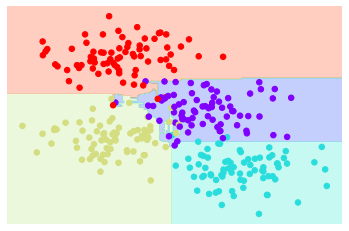

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)


Σε αυτό το παράδειγμα, τα δεδομένα έχουν τυχαιοποιηθεί προσαρμόζοντας κάθε εκτιμητή με ένα τυχαίο υποσύνολο του 80% των σημείων εκπαίδευσης. Στην πράξη, τα δέντρα αποφάσεων τυχαιοποιούνται πιο αποτελεσματικά με τη στοχαστικότητα στον τρόπο επιλογής των διαχωρισμών: με αυτόν τον τρόπο όλα τα δεδομένα συμβάλλουν στην προσαρμογή κάθε φορά, αλλά τα αποτελέσματα της προσαρμογής εξακολουθούν να έχουν την επιθυμητή τυχαιότητα. Για παράδειγμα, κατά τον προσδιορισμό του χαρακτηριστικού στο οποίο θα χωριστεί, το τυχαιοποιημένο δέντρο μπορεί να επιλέξει μεταξύ των κορυφαίων λειτουργιών.

Στο Scikit-Learn, ένα τέτοιο βελτιστοποιημένο σύνολο τυχαιοποιημένων δέντρων αποφάσεων εφαρμόζεται στον εκτιμητή RandomForestClassifier, ο οποίος φροντίζει αυτόματα όλη την τυχαιοποίηση. Το μόνο που χρειάζεται είναι να επιλεγεί ένας αριθμός εκτιμητών ο οποίος και θα ταιριάξει πολύ γρήγορα (παράλληλα, αν θέλετε) στο σύνολο των δέντρων:

C:\Users\User\AppData\Local\Temp\ipykernel_21132\748224724.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


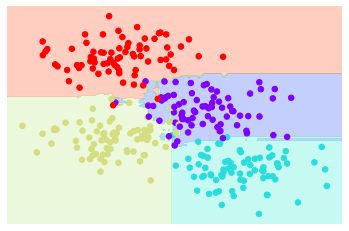

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

<ul>
<li><b>Ερώτηση 5:</b> Δοκιμάστε να μειώσετε και να αυξήσετε τον αριθμό των εκτιμητών στις παραπάνω περιπτώσεις. Τι παρατηρείτε ως προς την ακρίβεια και το χρόνο εκτέλεσης της μεθόδου Random Forests;</li>
<li><b>Ερώτηση 6:</b> Χρειάζεται η εφαρμογή του pruning στην περίπτωση των Random Forests, όπως στην περίπτωση των Δέντρων Αποφάσεων; Να δικαιολογήσετε την απάντησή σας.</li>
</ul>

C:\Users\User\AppData\Local\Temp\ipykernel_21132\748224724.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


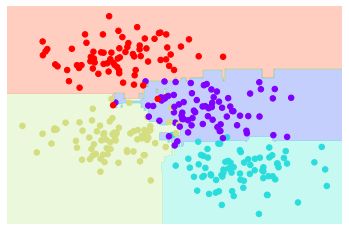

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=0)
visualize_classifier(model, X, y);

C:\Users\User\AppData\Local\Temp\ipykernel_21132\748224724.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


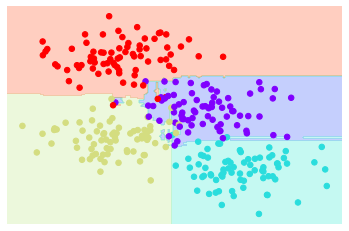

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, random_state=0)
visualize_classifier(model, X, y);

<b>Ερώτηση 5:</b> Δοκιμάστε να μειώσετε και να αυξήσετε τον αριθμό των εκτιμητών στις παραπάνω περιπτώσεις. Τι παρατηρείτε ως προς την ακρίβεια και το χρόνο εκτέλεσης της μεθόδου Random Forests;

Αυξάνοντας τον αριθμό εκτιμητών σε 1000 παρατηρήθηκε πως ο χρόνος εκτέλεσης αυξήθηκε αρκετά, ενώ αντίστοιχα όταν μειώσαμε τον αριθμό εκτιμητών, μειώθηκε ο χρόνος αυτός.

Ως προς την ακρίβεια, παρατηρούμε πως είτε με 10 είτε με 100 ή 1000 εκτιμητές, τα αποτελέσματα δείχνουν πολύ παρόμοια και επομένως η χρήση πολλών εκτιμητών δεν προσδίδει παραπάνω ακρίβεια πάνω από έναν αριθμό εκτιμητών για το συγκεκριμένο dataset.

<b>Ερώτηση 6:</b> Χρειάζεται η εφαρμογή του pruning στην περίπτωση των Random Forests, όπως στην περίπτωση των Δέντρων Αποφάσεων; Να δικαιολογήσετε την απάντησή σας.

Το pruning εφαρμόζεται στα Decision Trees για την αποφυγή overfitting καθώς σε full depth τείνουν να μαθαίνουν τον θόρυβο στα δεδομένα. Ωστόσο, δεν εφαρμόζεται σε Random Forests αφού γενικά λειτουργούν καλά σε full depth. Αυτό συμβαίνει γιατί:

Η εκπαίδευση των random forests γίνεται χρησιμοποιώντας sampling με επανατοποθέτηση μαζί με τυχαία επιλογή χαρακτηριστικών για ένα split, και ως αποτέλεσμα το correlation μεταξύ των trees που χρησιμοποιούνται από το random forest είναι χαμηλό. Έτσι, αν και τα διαφορετικά decision trees θα έχουν υψηλό variance, εντούτοις το output του ensemble (random forest) θα έχει χαμηλότερο variance και bias επειδή τα δέντρα του ensemble δεν είναι correlated.

# Παλινδρόμηση με Random Forest


Τα Random Forests δεν χρησιμοποιούνται μόνο στο πλαίσιο της ταξινόμησης στοιχείων, αλλά μπορούν επίσης να χρησιμοποιηθούν και σε περίπτωση παλινδρόμησης. Ο εκτιμητής που θα χρησιμοποιηθεί για αυτό είναι το RandomForestRegressor και η σύνταξη είναι παρόμοια με τη περίπτωση της ταξινόμησης.

Έστω ότι έχουμε τα ακόλουθα δεδομένα, που αντλούνται από το συνδυασμό γρήγορης και αργής ταλάντωσης:

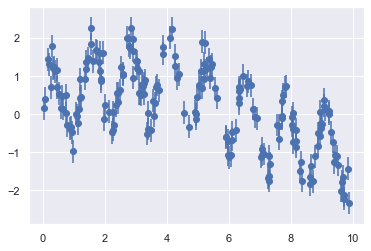

In [13]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');


Χρησιμοποιώντας παλινδρόμηση βασισμένη στα Random Forests, μπορούμε να βρούμε τη καμπύλη βελτιστοποίησης ως εξής:

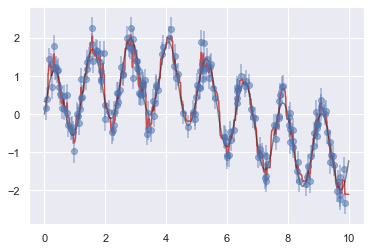

In [14]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

Εδώ το αληθινό μοντέλο εμφανίζεται στην γκρι καμπύλη, ενώ το μοντέλο που δημιουργήθηκε με Random Forests εμφανίζεται με την οδοντωτή κόκκινη καμπύλη. Όπως φαίνεται, το μη παραμετρικό μοντέλο βασισμένο σε Random Forests είναι αρκετά ευέλικτο ώστε να χωράει τα δεδομένα πολλαπλών περιόδων, χωρίς να χρειάζεται να προσδιορίσουμε ένα μοντέλο πολλαπλών περιόδων!

# Παράδειγμα: Random Forest για κατηγοριοποίηση ψηφίων

Εισάγουμε τις απαραίτητες βιβλιοθήκες και το σχετικό dataset με τα χειρόγραφα ψηφία

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Οπτικοποίηση μερικών ψηφίων

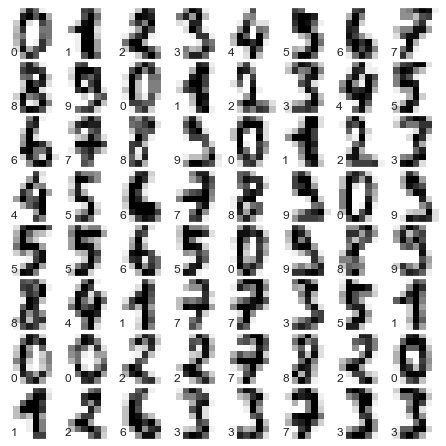

In [17]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Κατηγοριοποιούμε τα ψηφία με Random Forest

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [19]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      1.00      0.99        44
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.96      0.98      0.97        47
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Εμφάνιση των λαθών μέσω της [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

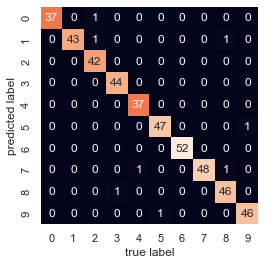

In [20]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

<b>Ερώτηση 7:</b> Να αναφέρετε για ποιους λόγους απαιτούνται οι μετρικές precision, recall και f1-score πέραν της ακρίβειας (accuracy)

Η μετρική του accuracy (ορθότητα) μπορεί να είναι παραπλανητική για datasets που είναι imbalanced, και επομένως σε πολλά πραγματικά προβλήματα που συμβαίνει αυτό, θεωρείται αναξιόπιστη μετρική. Accuracy είναι ο λόγος του αριθμού των σωστών προβλέψεων του μοντέλου με τον συνολικό αριθμό δειγμάτων εισόδου.
Συμπεριλαμβάνοντας το precision και το recall καθώς και το f1-score που είναι ο αρμονικός μέσος αυτών παίρνουμε μια πιο πλήρη εικόνα για την προβλεπτική ικανότητα ενός ταξινομητή.

Οι μετρικές precision και recall μπορούν να εκληφθούν ως εξής:
- Precision: το ποσοστό των δειγμάτων που ταξινομήθηκαν σωστά από όλα τα θετικά δείγματα. Η μετρική αυτή εστιάζει στα ψευδή θετικά, δηλαδή στα δείγματα που ταξινομεί λανθασμένα ως θετικά. $precision = \frac{TP}{TP+FP}$
- Recall: το ποσοστό των θετικών δειγμάτων που προέβλεψε σωστά ο ταξινομητής. $recall = \frac{TP}{TP+FN}$
- F1-score: συνδυάζει το precision με το recall ως μια και μόνο μετρική που εμπεριέχει το tradeoff αυτών των δύο επιμέρους μετρικών $F1 \ score = 2\cdot \frac{precision \cdot recall}{precision+recall}$

<b>Ερώτηση 8:</b> Ποιες άλλες μέθοδοι χρησιμοποιούνται, συνήθως, για την αξιολόγηση μοντέλων μηχανικής μάθησης; Να αναφέρετε μερικές και να αναφέρετε τα πλεονεκτήματά τους (hint: <a href="https://towardsdatascience.com/various-ways-to-evaluate-a-machine-learning-models-performance-230449055f15">Μέθοδοι)</a>

Όπως είδαμε προηγουμένως, μια μέθοδος είναι το ** confusion matrix ** που μπορεί να δείξει σε ποια/ες κλάση/εις γίνονται λάθη στην ταξινόμηση και με ποια άλλη/ες κλάση/εις μπερδεύεται ο ταξινομητής. Από τον πίνακα αυτόν προκύπτουν εύκολα οι μετρικές όπως το recall και το precision.

Το **specificity** ή True Negative Rate είναι μια άλλη μετρική αντίστοιχη του recall αλλά για την αρνητική κλάση που ορίζεται ως $specificity = \frac{TN}{TN+FP}$, δηλαδή δείχνει την ικανότητα πρόβλεψης αρνητικών δειγμάτων από τον ταξινομητή.

Το **precision-recall curve** έχει προταθεί στη βιβλιογραφία για περιπτώσεις imbalanced dataset καθώς οπτικοποιεί το tradeoff μεταξύ precision και recall για διάφορες τιμές threshold/κατωφλίου πιθανότητας. Το εμβαδό κάτω από την καμπύλη λέγεται PR AUC και συνοψίζει σε έναν πραγματικό αριθμό την προβλεπτική ικανότητα του μοντέλου.

Η **Receiver operating characteristing** ROC curve είναι μια καμπύλη με άξονες True Positive Rate (recall, κάθετος άξονας) και False Positive Rate (FPR), όπου $FPR = 1 - specificity = \frac{FP}{TN+FP}$. Ομοίως, η προβλεπτική ικανότητα του μοντέλου μπορεί να συνοψιστεί σε μια μετρική ROC AUC, δηλαδή την επιφάνεια κάτω από την καμπύλη.

Η PR curve δεν εξαρτάται από τα TN και ως εκ τούτου σε datasets όπου η αρνητική κλάση είναι η majority class η PR curve προτιμάται έναντι της ROC curve. Ωστόσο, όταν δεν έχουμε imbalance η ROC curve είναι μια καμπύλη που χρησιμοποιείται κατά κόρον για την αξιολόγηση μοντέλων.
